# Data Scientist Professional Practical Exam Submission


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

# Predicting Popular Recipes for the Website Homepage

# 1. Introduction
The Data Science team at my company has been tasked with assisting in the decision-making process for selecting which recipes should be displayed on the homepage in order to increase website traffic, thereby boosting subscriptions. At Tasty Bytes, the current approach relies on selecting recipes based on personal preference, which has resulted in inconsistent outcomes. To address this challenge, our team developed machine learning models using Logistic Regression and eXtreme Gradient Boosting (XGBoost) algorithms to predict whether a recipe will generate high or low traffic. The machine learning models have shown promising results in accurately forecasting traffic outcomes.

### Import all the required packages and libraries.

In [1]:
# Import the necessary libraries
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint 
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from typing import Tuple, List, Union, Tuple
from pathlib import Path


print("All the required libraries have been successfully imported!")

All the required libraries have been successfully imported!


In [2]:
import matplotlib
import sklearn
import scipy

# Print the versions of the imported libraries.
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Matplotlib Version:", matplotlib.__version__)
print("Seaborn Version:", sns.__version__)
print("Scikit-learn Version:", sklearn.__version__)
print("SciPy Version:", scipy.__version__)
print("Missingno Version:", msno.__version__)
print("Optuna Version:", optuna.__version__)
print("Joblib Version:", joblib.__version__)

NumPy Version: 1.23.2
Pandas Version: 1.5.1
Matplotlib Version: 3.6.3
Seaborn Version: 0.13.0
Scikit-learn Version: 1.2.2
SciPy Version: 1.9.0
Missingno Version: 0.5.1
Optuna Version: 3.6.1
Joblib Version: 1.3.2


### Read the csv data file and load as a DataFrame

In [3]:
# Get the current working directory.
curr_work_dir = os.getcwd()

# Get all the folders and files in the directory and return the csv data file name.
data_file = os.listdir(curr_work_dir)[0]

# Read the csv file into a DataFrame suitable for analysis.
recipe_df = pd.read_csv(data_file)

# Print few rows.
recipe_df.head(7)

recipe  calories  carbohydrate  ...        category  servings high_traffic
0       1       NaN           NaN  ...            Pork         6         High
1       2     35.48         38.56  ...          Potato         4         High
2       3    914.28         42.68  ...       Breakfast         1          NaN
3       4     97.03         30.56  ...       Beverages         4         High
4       5     27.05          1.85  ...       Beverages         4          NaN
5       6    691.15          3.46  ...   One Dish Meal         2         High
6       7    183.94         47.95  ...  Chicken Breast         4          NaN

[7 rows x 8 columns]

# 2. Data Preprocessing

## 2.1 Data Exploration - Explore the Data.

#### Get the shape of the data.


In [4]:
# Get the shape(nrows x ncols) of the data.
nrows, ncols = recipe_df.shape

# Get the size of the data.
size = recipe_df.size 

print(f"The shape of this data is {nrows} rows and {ncols} columns. The dataset comprises of {size} data entries.")

The shape of this data is 947 rows and 8 columns. The dataset comprises of 7576 data entries.


The shape of this data is 947 rows and 8 columns. The dataset comprises of 7576 data entries.

#### Inspect the data.
Check the data types of each column, the number of missing values in each column, and the column names.

In [6]:
# Inspect the data.
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


The dataset contains 947 rows ranging from 0 to 946 and includes 8 columns. Below are the characteristics of each column:

1. **recipe**:

    - Data type: int64
    - Non-missing entries: 947
    - Represents unique identifiers for recipes.

2. **calories**:

    - Data type: float64
    - Non-missing entries: 895 (52 missing values).
    - Represents the calorie count for each recipe.

3. **carbohydrate**:

    - Data type: float64
    - Non-missing entries: 895 (52 missing values).
    - Represents the carbohydrate content in each recipe.

4. **sugar**:

    - Data type: float64
    - Non-missing entries: 895 (52 missing values).
    - Represents the sugar content in each recipe.

5. **protein**:

    - Data type: float64
    - Non-missing entries: 895 (52 missing values).
    - Represents the protein content in each recipe.

6. **category**:

    - Data type: object
    - Non-missing entries: 947
    - Represents the recipe category.

7. **servings**:

    - Data type: object
    - Non-missing entries: 947
    - Represents the number of servings per recipe.

8. **high_traffic**:

    - Data type: object
    - Non-missing entries: 574 (373 missing values).
    - Indicates whether the recipe has high traffic.


**Summary**:

- The dataset includes a mix of numeric and categorical data types: 4 float columns, 1 integer column, and 3 object columns.
- There are missing values in several columns, with "high_traffic" having the highest number of missing entries (373).
- All rows are accounted for in the dataset, and no rows are completely missing.

## 2.2 Data Validation

In [7]:
# Replace 'Chicken Breast' with 'Chicken' in the 'category' column
recipe_df['category'] = recipe_df['category'].replace("Chicken Breast", "Chicken")

# Convert the category and high_traffic column from object to category.
recipe_df['category'] = recipe_df['category'].astype('category')
recipe_df['high_traffic'] = recipe_df['high_traffic'].astype('category')

# Check for non-numeric values in the 'servings' column.
non_numeric_values = recipe_df['servings'][~recipe_df['servings'].str.isnumeric()]
print("Non-numeric values in 'servings' column:\n", non_numeric_values, "\n")

# Replace or Handle the non-numeric values if exists (e.g., replace '4 as a snack' with '4')
recipe_df['servings'] = recipe_df['servings'].str.replace("as a snack", "")

# Convert the non-numeric values in the servings column to numeric.
recipe_df['servings'] = pd.to_numeric(recipe_df['servings'])

# Convert the servings column to int.
recipe_df['servings'] = recipe_df['servings'].astype(int)

# Confirm the conversion.
print(recipe_df.dtypes)

Non-numeric values in 'servings' column:
 451    4 as a snack
548    6 as a snack
735    4 as a snack
Name: servings, dtype: object 

recipe             int64
calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings           int64
high_traffic    category
dtype: object


From the dataset, I examined the `servings` column and found that not all the values were numeric. I addressed this issue by replacing and handling the non-numeric values to ensure consistency. Additionally, I noticed that the `servings` column was not in the correct data type format; it was in the `object format`, so I converted it to `int`. I noticed that the `category` and `high_traffic` column were not in the correct data type format; the columns were in the `object format`, so I converted it to `category`. I also noticed that the `category` column consist of an invalid data, which is **Chicken Breast**. I replaced every **Chicken Breast** entries with **Chicken**.

### Verify if the recipes are unique

In [8]:
# Print the number of unique values in the recipes column.
print("The number of unique values in the recipes column is: {}".format(recipe_df["recipe"].nunique()))

The number of unique values in the recipes column is: 947


The `recipes` column satisfies the condition that all the recipes are unique.

### 2.2.1 Data Cleaning

#### Check for number of Missing Values in the Columns


In [9]:
# Get the number of missing values in each column in descending order.
print(recipe_df.isna().sum().sort_values(ascending=False))

high_traffic    373
calories         52
carbohydrate     52
sugar            52
protein          52
recipe            0
category          0
servings          0
dtype: int64


From the output above, it shows that 3 out of 8 columns (`recipe`, `category`, and `servings`) are complete with no missing values, while the remaining columns (`high_traffic`, `calories`, `carbohydrate`, `sugar`, and `protein`) contain missing values. The high_traffic column has the most missing values, with 373 missing entries, followed by the other four columns, each having 52 missing values.

#### Identify Columns with More Than 5% Missing Values

In [10]:
# Set the threshold for missing values (5%).
threshold = 0.05

# Calculate the percentage of missing values in each column.
missing_percentage = recipe_df.isna().mean()
print(missing_percentage.sort_values(ascending=False), "\n")

# Select columns with missing values above the threshold
columns_above_threshold = missing_percentage[missing_percentage > threshold].index

# Print the columns that have more than 5% missing values
print(f"Columns with more than 5% missing values: {columns_above_threshold}")

high_traffic    0.393875
calories        0.054910
carbohydrate    0.054910
sugar           0.054910
protein         0.054910
recipe          0.000000
category        0.000000
servings        0.000000
dtype: float64 

Columns with more than 5% missing values: Index(['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic'], dtype='object')


The goal of this analysis is to predict which recipes will lead to **high traffic**. However, some values in the `high_traffic` column are missing. Since the `high_traffic` labels cannot be missing for this analysis, and null values represent unknown or missing data, I have filled the missing values with a label such as **low**, representing `low traffic`.

### Replace the rows where the values in the `high_traffic` column are missing with **`low`**

For the `high_traffic` column, the data administrator only recorded instances where traffic was **high** and assigned null values for other cases. To address this, we will treat the null values, representing non-high traffic cases, as **low** traffic.

In [11]:
# Fill missing values in the 'high_traffic' column with 'low' to indicate low traffic where data is missing.
# Add 'low' to the categories if it's not already there
recipe_df['high_traffic'] = recipe_df['high_traffic'].cat.add_categories('Low')

# Now fill the missing values with 'low'
recipe_df['high_traffic'] = recipe_df['high_traffic'].fillna('Low')
                                                             
# Change the "high_traffic" column name to "traffic" 
recipe_df.rename(columns={'high_traffic': 'traffic_level'}, inplace=True)

recipe_df.head()

recipe  calories  carbohydrate  ...   category  servings traffic_level
0       1       NaN           NaN  ...       Pork         6          High
1       2     35.48         38.56  ...     Potato         4          High
2       3    914.28         42.68  ...  Breakfast         1           Low
3       4     97.03         30.56  ...  Beverages         4          High
4       5     27.05          1.85  ...  Beverages         4           Low

[5 rows x 8 columns]

After adjusting the data type and addressing the category columns, all the columns now align with their respective descriptions in the data information:

    - recipes: Numeric, unique identifier
    - calories: Numeric values
    - carbohydrate: Numeric values
    - sugar: Numeric values
    - protein: Numeric values
    - category: 11 distinct categories
    - servings: 4 possible values
    - high_traffic: 2 categories, renamed to 'traffic_level`

#### Check for duplicated rows.

In [11]:
# Check for duplicated rows.
no_duplicated_rows = recipe_df.duplicated(subset=["calories", "carbohydrate", "sugar", "protein", "category", "traffic_level", "servings"]).sum()
print("There are {} duplicated rows in the dataset.".format(no_duplicated_rows))

# Get duplicated rows
duplicated_rows = recipe_df[recipe_df.duplicated(subset=["calories", "carbohydrate", "sugar", "protein", "category", "traffic_level", "servings"])]

# Drop duplicates
recipe_df.drop_duplicates(subset=["calories", "carbohydrate", "sugar", "protein", "category", "traffic_level", "servings"], inplace=True)

# Get the shape(nrows x ncols) of the data.
nrows, ncols = recipe_df.shape

# Get the size of the data.
size = recipe_df.size 

print(f"\nThe shape of this data now is {nrows} rows and {ncols} columns. The dataset comprises of {size} data entries.")

There are 25 duplicated rows in the dataset.

The shape of this data now is 922 rows and 8 columns. The dataset comprises of 7376 data entries.


There are 23 duplicated rows in the dataset. Dropping them will reduce the shape of the data to 924 rows and 8 columns.

#### Check for number of Missing Values in the Columns

In [12]:
# Get the number of missing values in each column in descending order.
print(recipe_df.isna().sum().sort_values(ascending=False))

calories         27
carbohydrate     27
sugar            27
protein          27
recipe            0
category          0
servings          0
traffic_level     0
dtype: int64


From the the output, it shows that 4 out of 8 columns (`recipe`, `category`, `servings` and `high_traffic`) are complete with no missing values, while the remaining columns (`calories`, `carbohydrate`, `sugar`, and `protein`) contain missing values. These four columns have a total of 27 missing values.

#### Identify Columns with More Than 5% Missing Values

In [13]:
# Set the threshold for missing values (5%).
threshold = 0.05

# Calculate the percentage of missing values in each column.
missing_percentage = recipe_df.isna().mean()
print(missing_percentage.sort_values(ascending=False), "\n")

# Select columns with missing values above the threshold
columns_above_threshold = missing_percentage[missing_percentage > threshold].index

# Print the columns that have more than 5% missing values
print(f"Columns with more than 5% missing values: {list(columns_above_threshold)}")

calories         0.029284
carbohydrate     0.029284
sugar            0.029284
protein          0.029284
recipe           0.000000
category         0.000000
servings         0.000000
traffic_level    0.000000
dtype: float64 

Columns with more than 5% missing values: []


The four columns with missing values exhibit missingness characteristics that didn't exceed the 5% threshold. 

Columns with less than 5% missing values: [`'calories'`, `'carbohydrate'`, `'sugar'`, `'protein'`]

Since the missing values in each of the four column are less thna 5% of the dataset, we can drop the rows with missing values. 

In [14]:
# Set the plot style to "darkgrid" for a visually appealing background.
sns.set(style="darkgrid")

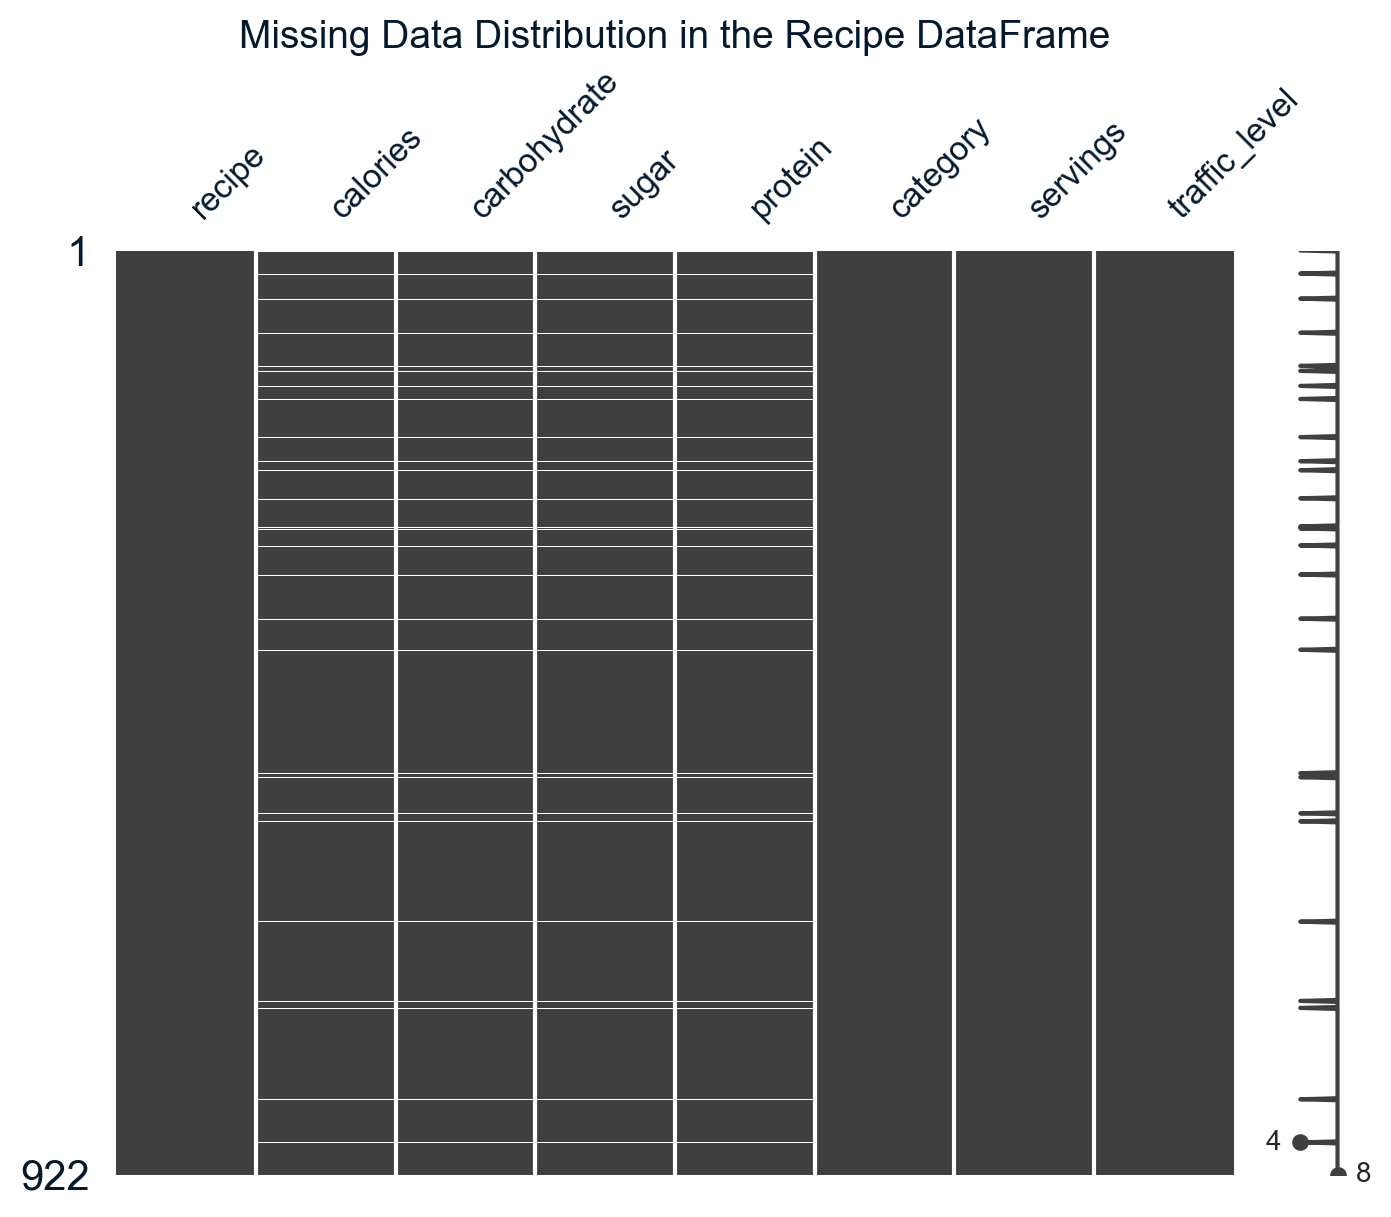

In [15]:
# Visualizing the recipe DataFrame using missingno to reveal the missingness distribution.
msno.matrix(recipe_df, figsize=(8, 6), fontsize=12)

# Add a title for better context
plt.title("Missing Data Distribution in the Recipe DataFrame", fontsize=14)

plt.show()

The 27 missing values in each column are found across the same rows. These rows will be dropped because the missing predictor features are crucial for accurately predicting which recipes should be displayed on the website homepage. This decision aligns with the earlier justification for dropping rows, as the missing values constitute less than 5% of the entire dataset and thus do not significantly affect the overall distribution.

#### Drop the rows with missing values.

In [16]:
# Drop rows with missing values
recipe_df.dropna(inplace=True)

# Check for validity
# Get the number of missing values in each column, sorted in descending order
missing_values = recipe_df.isna().sum().sort_values(ascending=False)
print(missing_values)

# Get the shape (number of rows and columns) of the dataset
nrows, ncols = recipe_df.shape

# Get the total size (number of entries) of the dataset
size = recipe_df.size

print(f"The dataset now has {nrows} rows and {ncols} columns, comprising a total of {size} data entries.")


recipe           0
calories         0
carbohydrate     0
sugar            0
protein          0
category         0
servings         0
traffic_level    0
dtype: int64
The dataset now has 895 rows and 8 columns, comprising a total of 7160 data entries.


The dataset now has 895 rows and 8 columns, comprising a total of 7160 data entries.

#### After Handling Missing Values

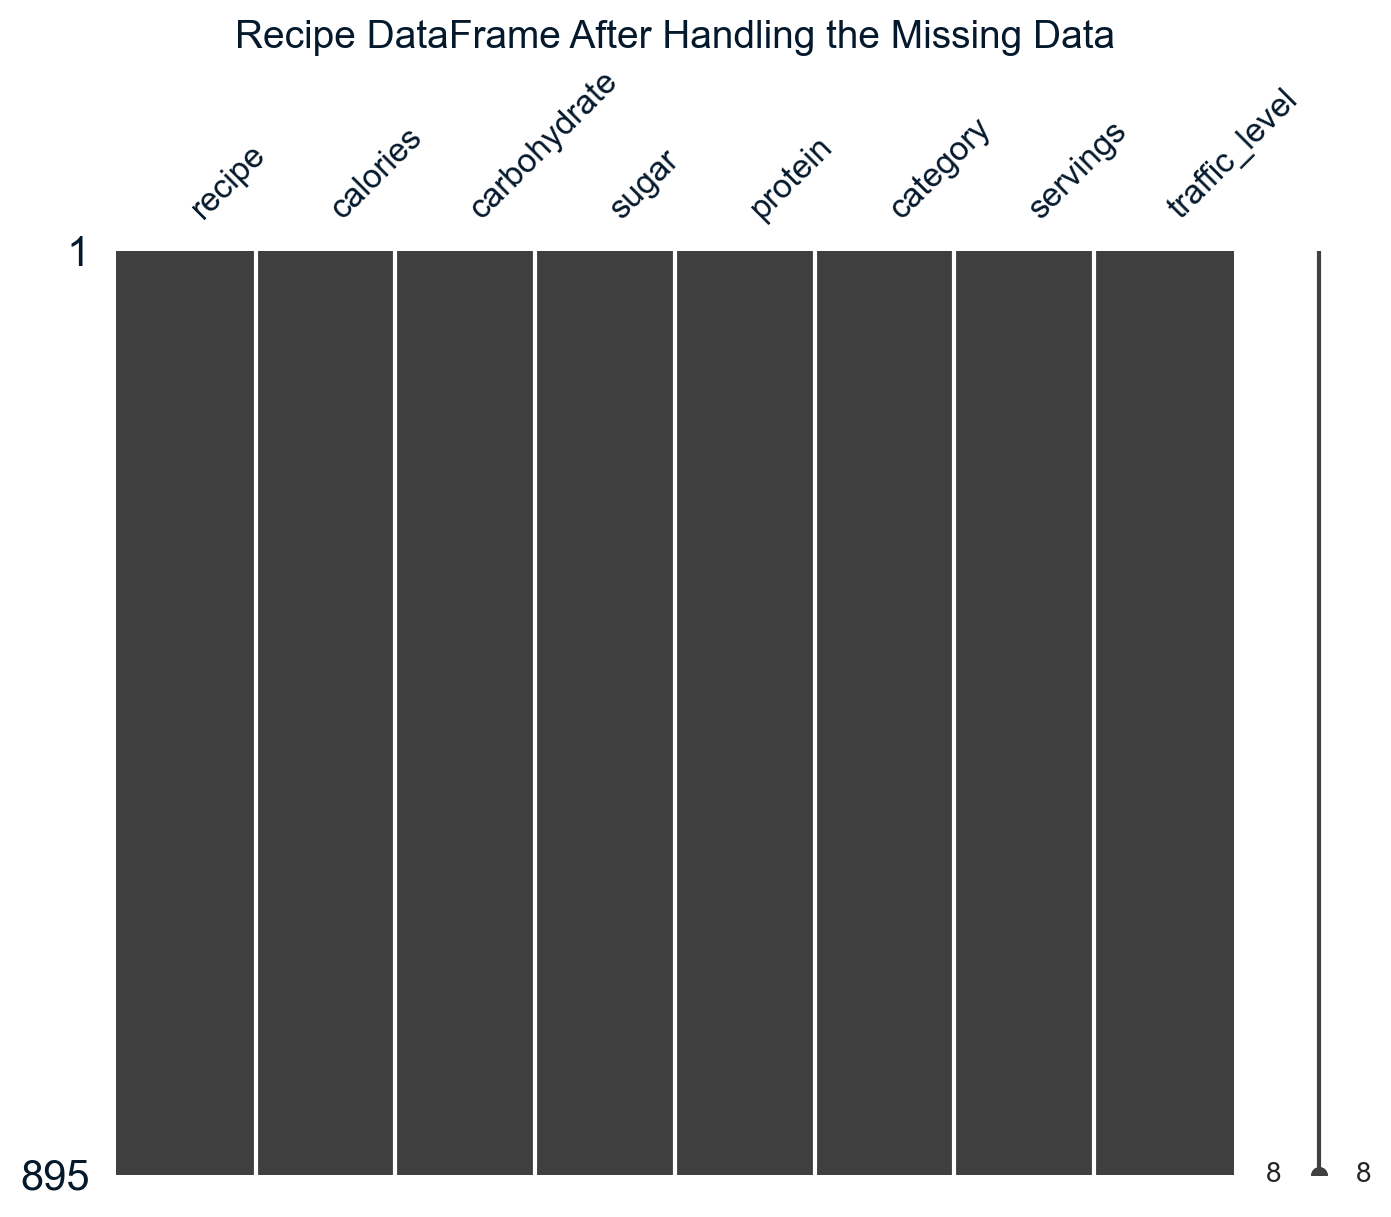

In [17]:
# Visualizing the recipe DataFrame using missingno to reveal the missingness distribution.
msno.matrix(recipe_df, figsize=(8, 6), fontsize=12)

# Add a title for better context
plt.title("Recipe DataFrame After Handling the Missing Data", fontsize=14)

plt.show()

#### Outlier Detection

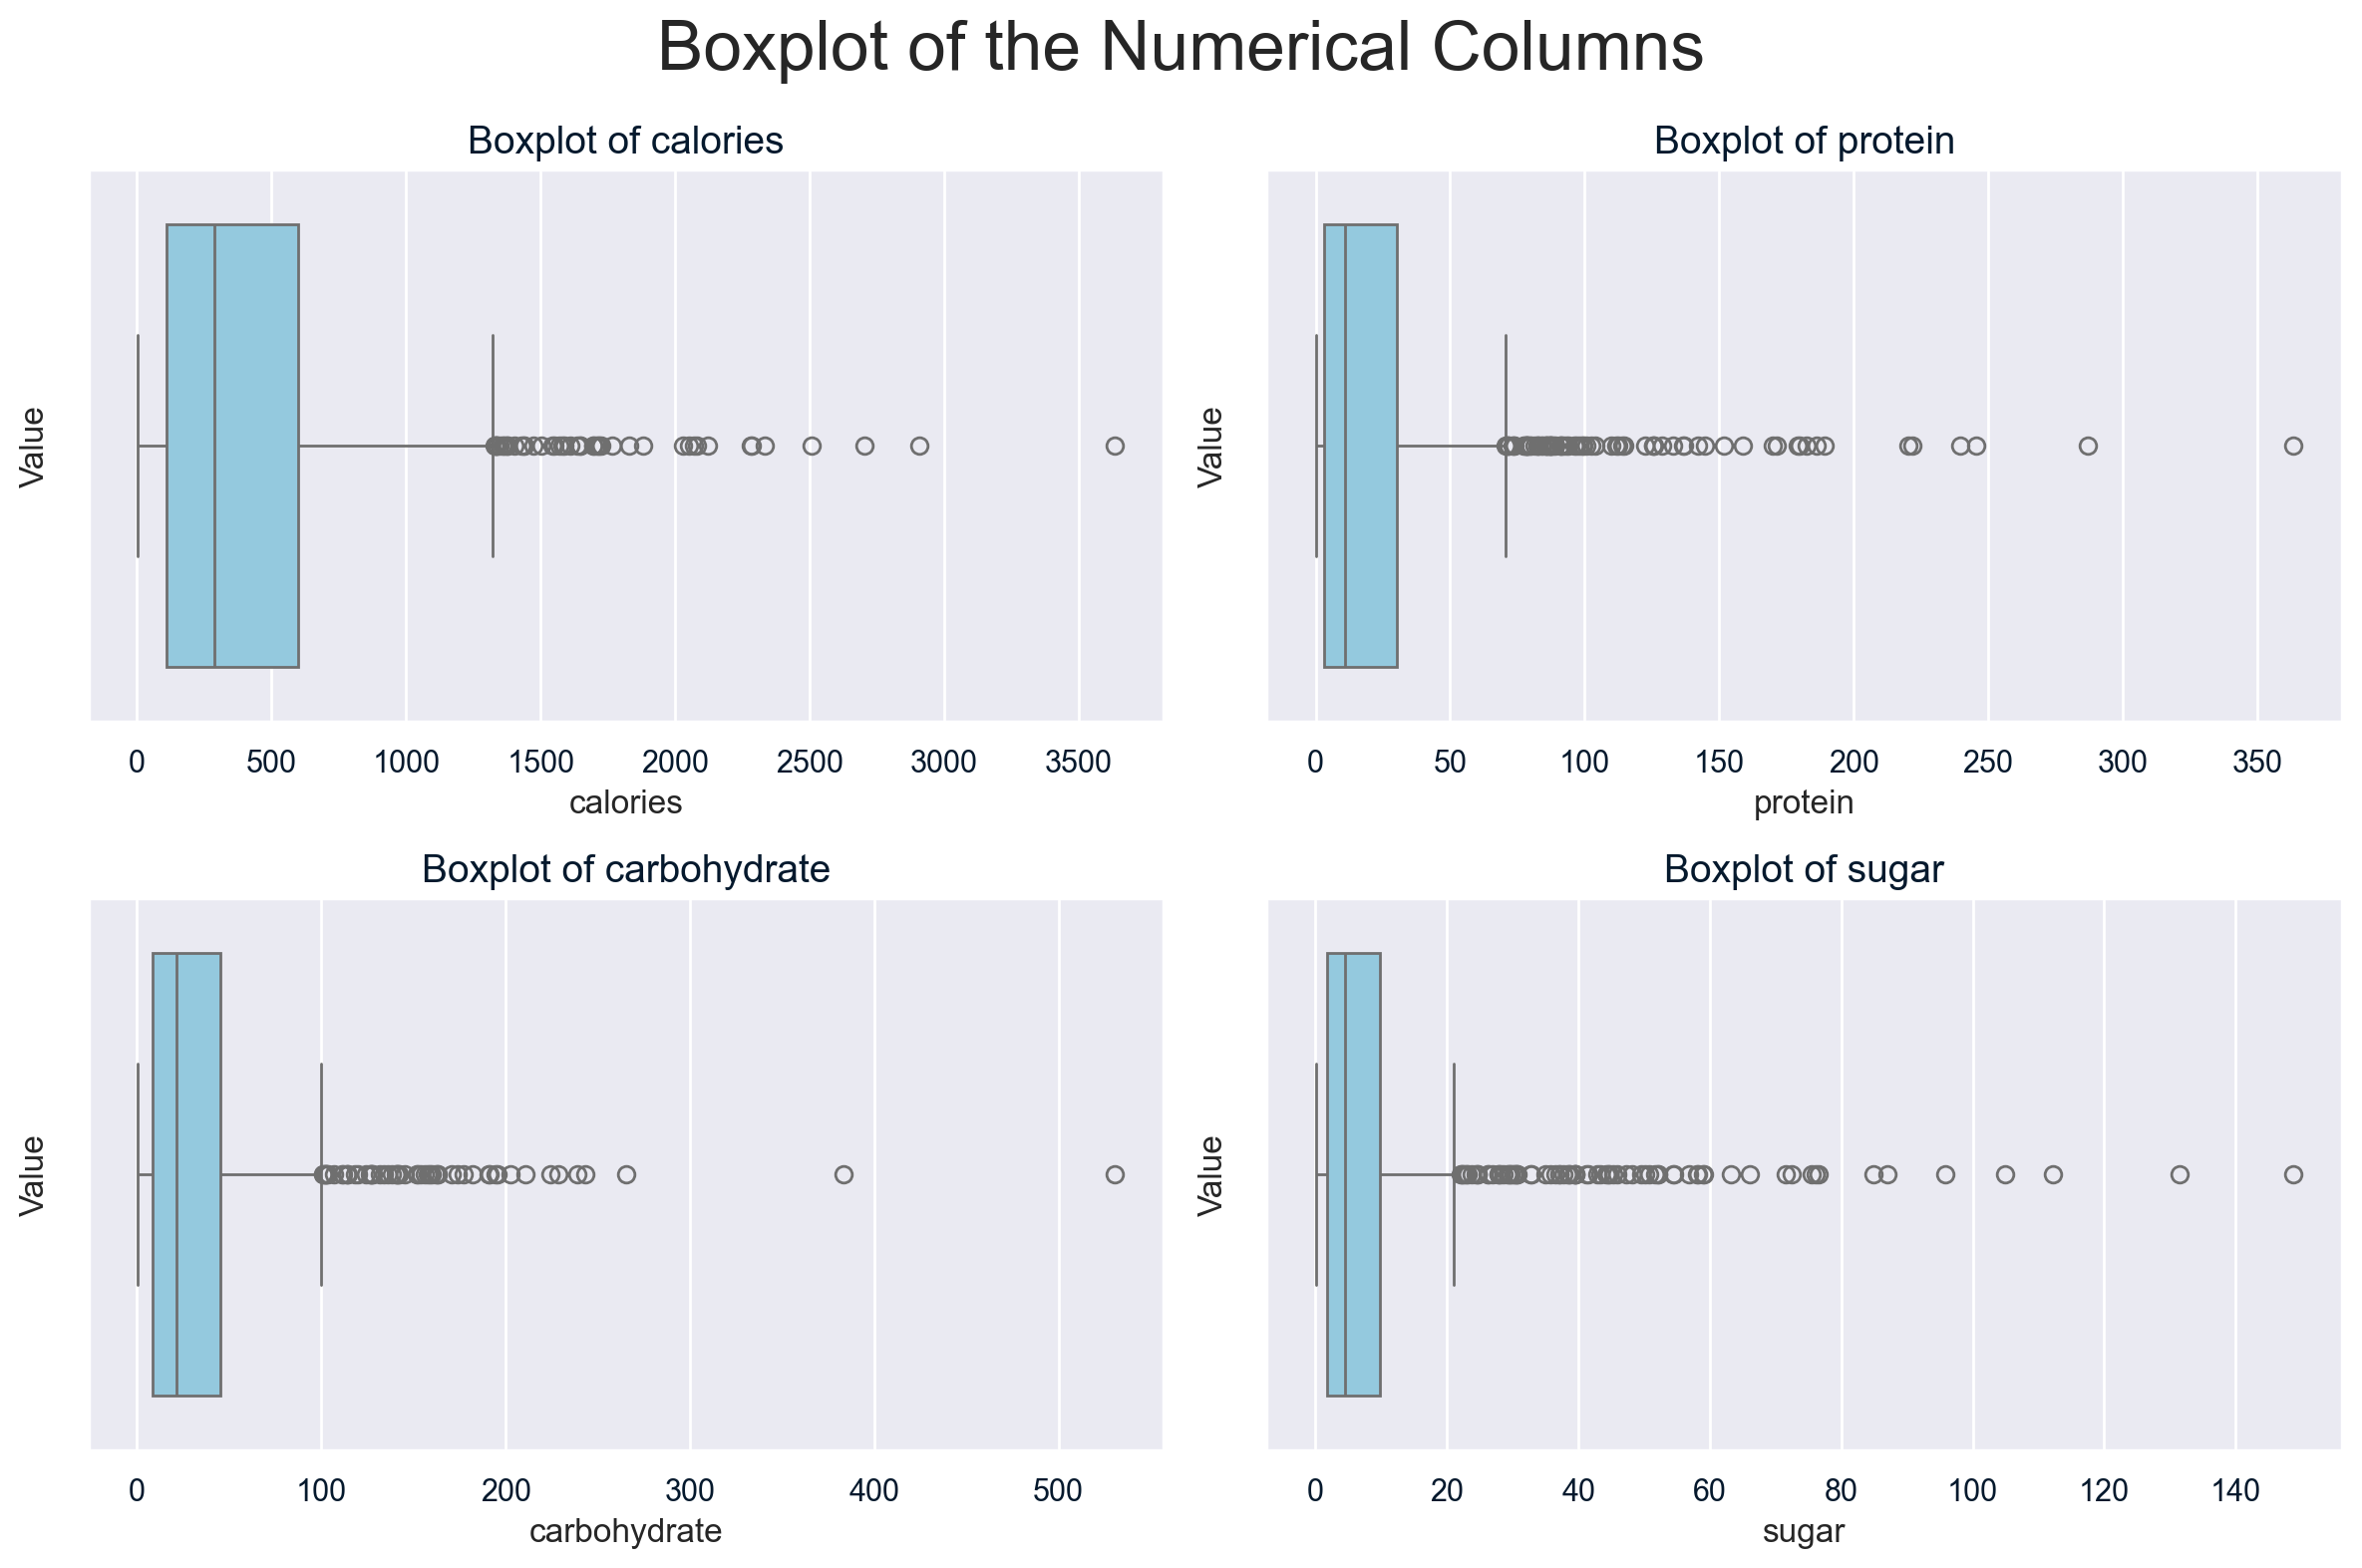

In [18]:
# List of numerical columns to check for outliers
numerical_columns = ['calories', 'protein', 'carbohydrate', 'sugar']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
plt.suptitle("Boxplot of the Numerical Columns", fontsize=25)
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i) 
    sns.boxplot(x=recipe_df[column], color='skyblue')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Value', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

From the boxplots shown above, it is evident that all the numerical columns are right-skewed due to the presence of high values that deviate significantly from the norm, i.e., rarely occurring values (outliers). To mitigate the impact of these outliers, we will apply transformations to reduce their influence, as they can adversely affect the model's generalizability.

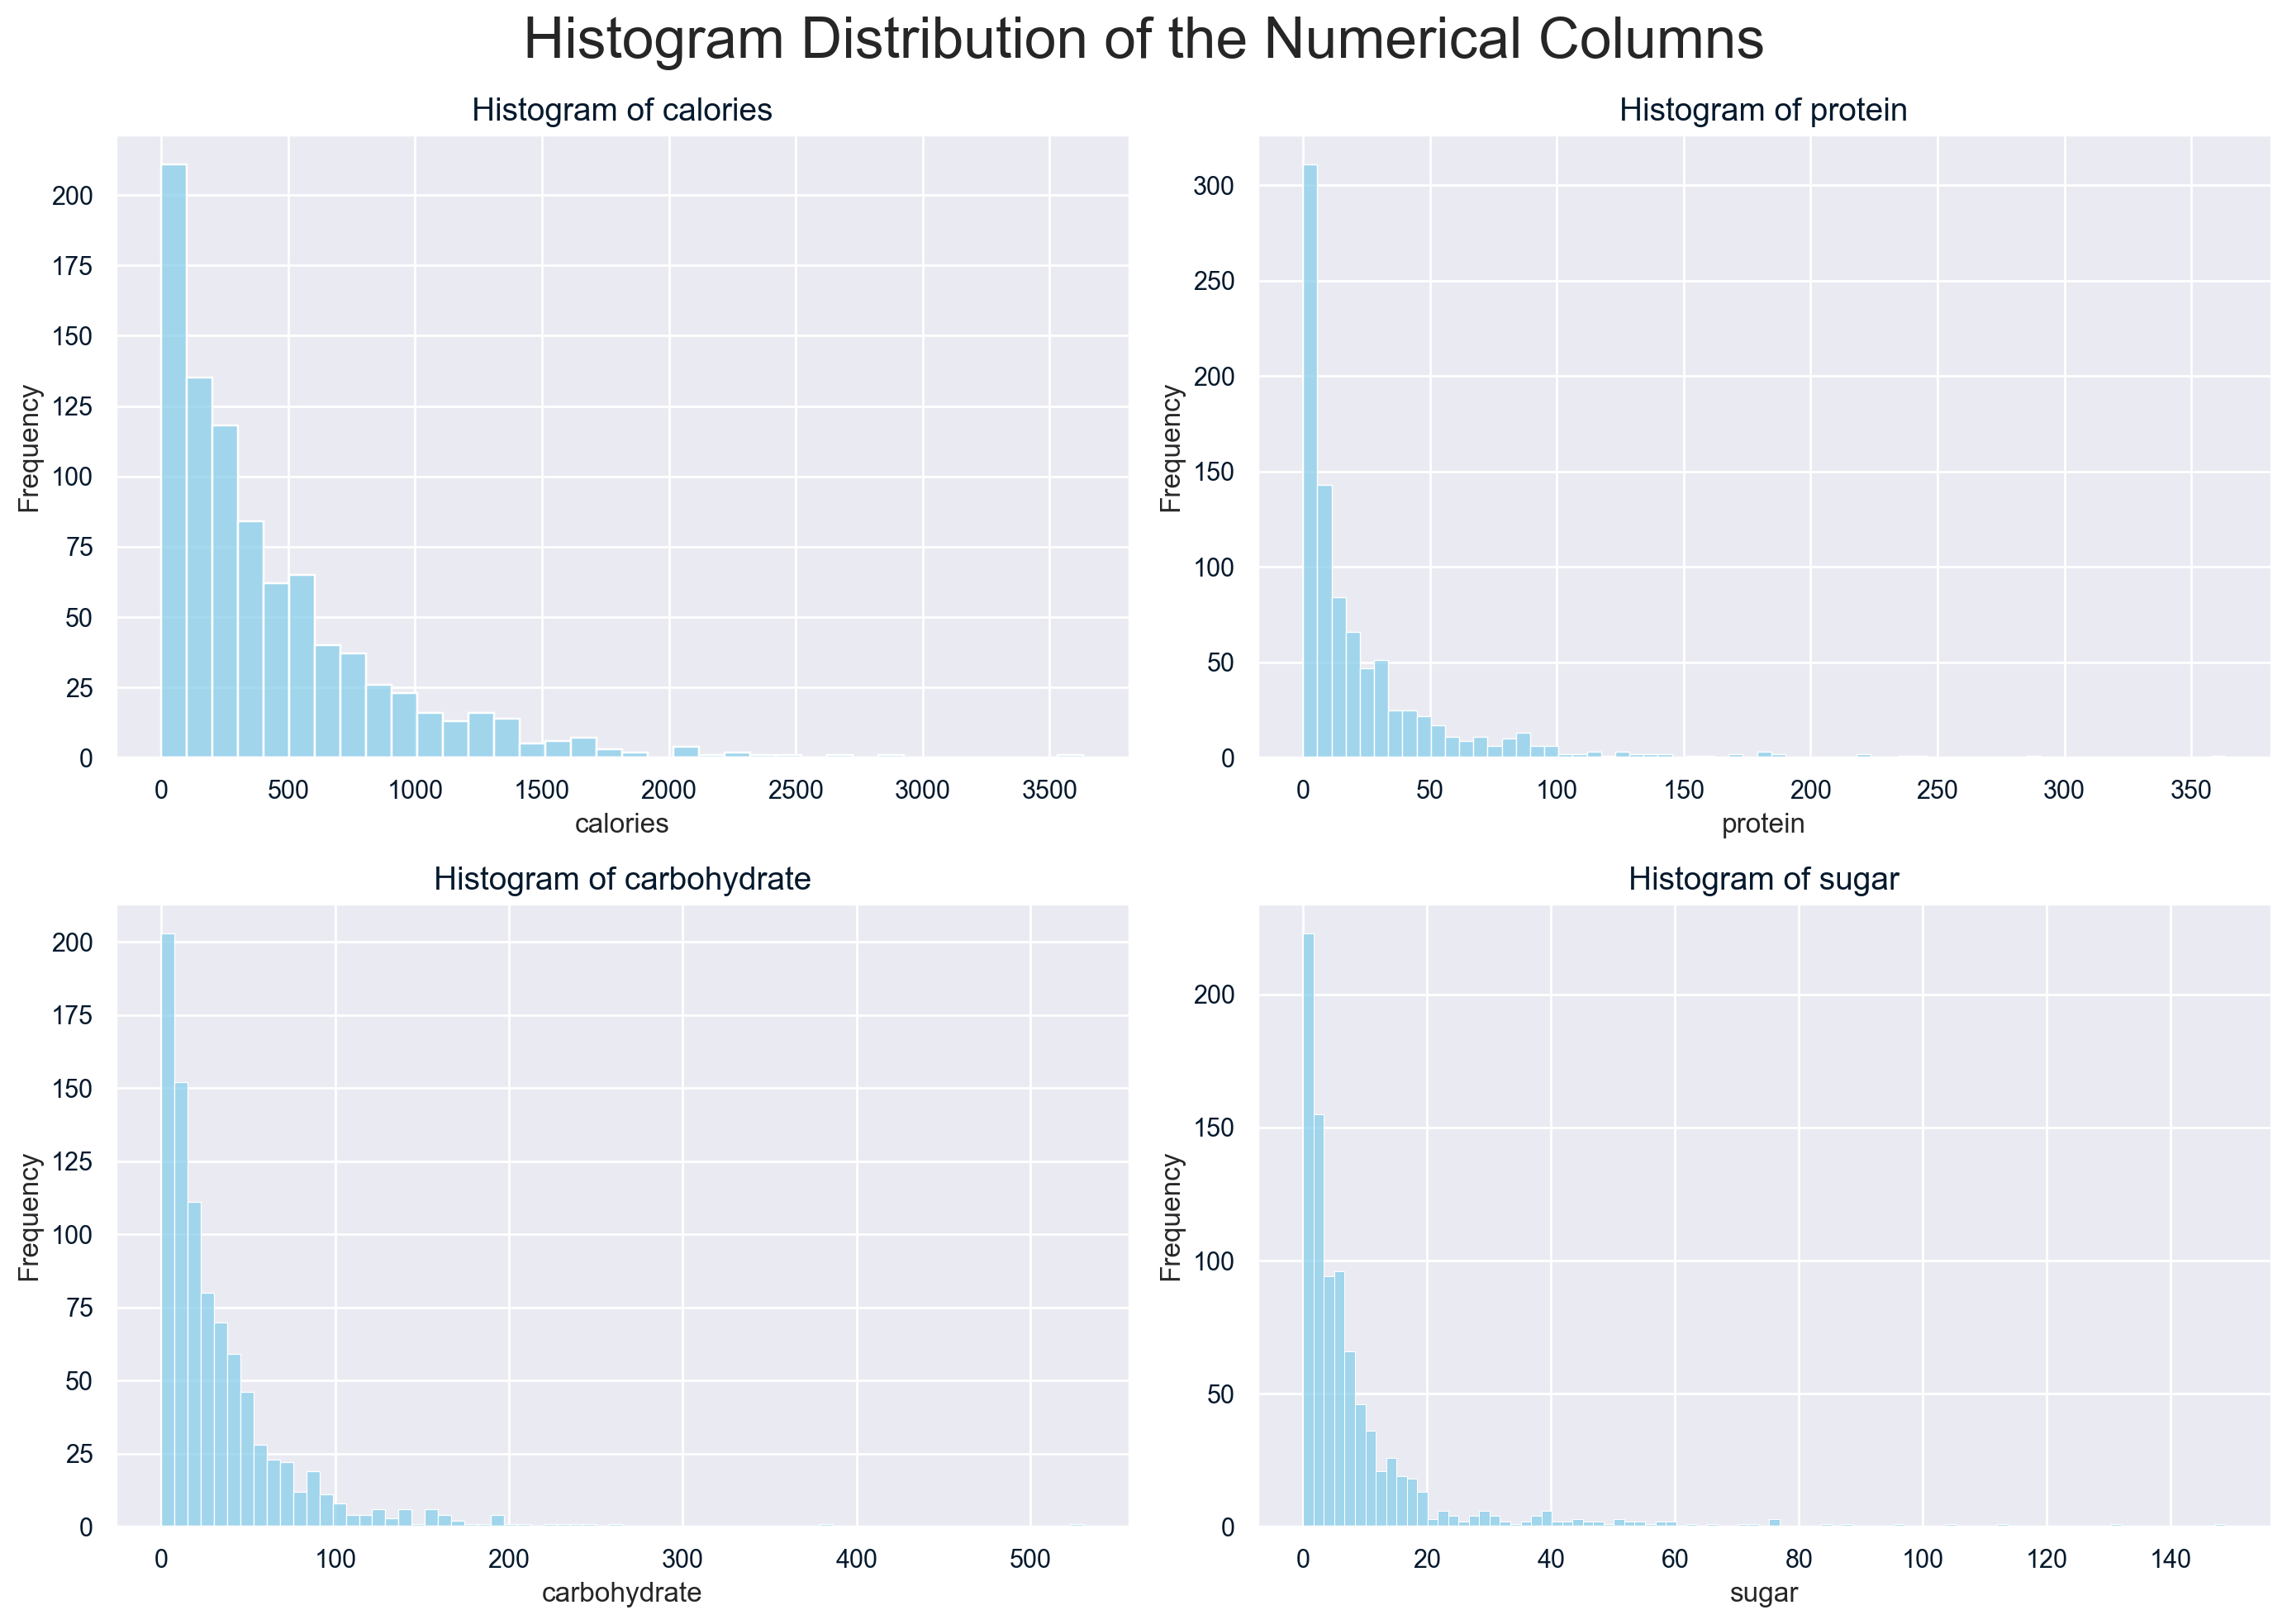

In [19]:
# Create histogram for each numerical column.
plt.figure(figsize=(14, 10))
plt.suptitle("Histogram Distribution of the Numerical Columns", fontsize=25)
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i) 
    sns.histplot(x=recipe_df[column], color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()

plt.show()

The histogram also confirms that the numerical columns are right-skewed.

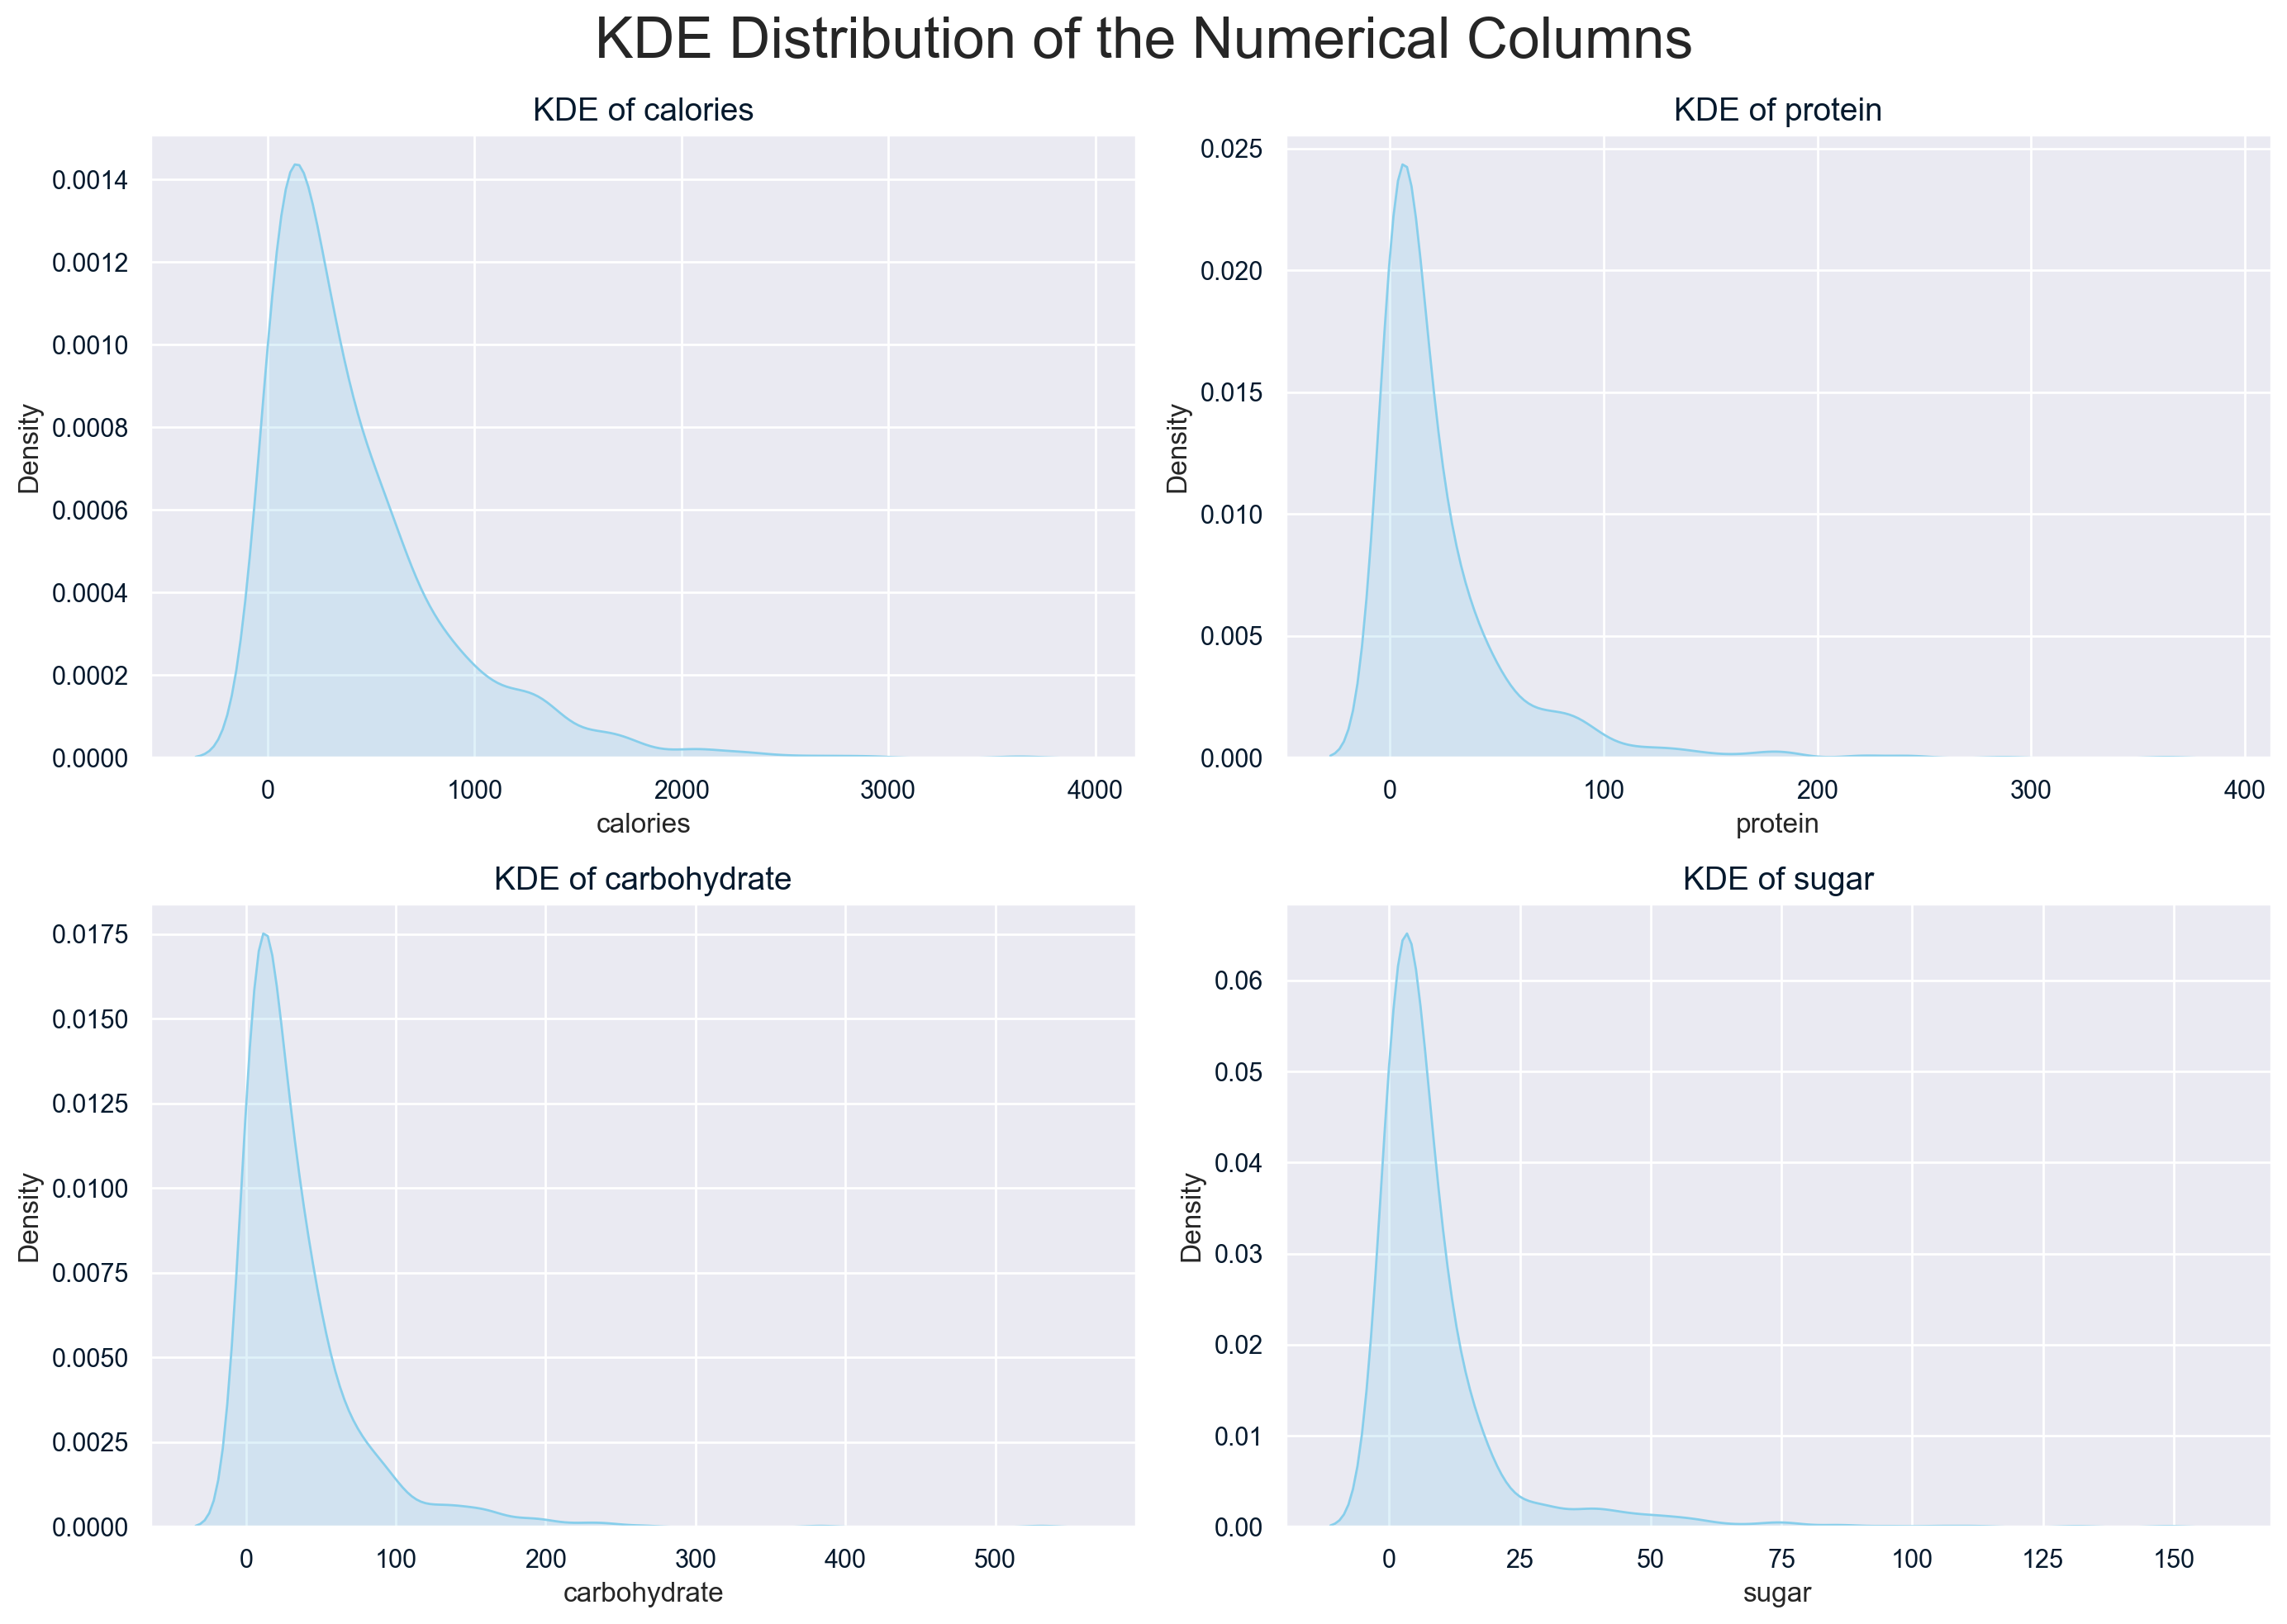

In [20]:
# Create KDE plot for each numerical column.
plt.figure(figsize=(14, 10))
plt.suptitle("KDE Distribution of the Numerical Columns", fontsize=25)
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i) 
    sns.kdeplot(data=recipe_df[column], color='skyblue', shade=True)
    plt.title(f'KDE of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

# Adjust layout and display the plots.

plt.tight_layout()
plt.show()

#### Handle outliers

In [21]:
def iqr_outlier_handling(df, col):
    """
    Handles outliers in a specified column of a DataFrame using the Interquartile Range (IQR) method.
    
    The function computes the lower and upper bounds using the IQR (Interquartile Range) and replaces 
    values outside these bounds with the respective bound (lower or upper) to cap extreme values.
    
    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data.
    
    col : str
        The name of the column (as a string) in the DataFrame for which outlier handling is to be applied.
    
    Returns:
    -------
    None
        The function modifies the DataFrame in place, capping the outlier values in the specified column.
    
    Notes:
    ------
    The function uses the standard IQR method where outliers are defined as values outside the range:
    [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], where Q1 is the 25th percentile, Q3 is the 75th percentile, and 
    IQR is the interquartile range (Q3 - Q1).
    """
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    # Replace values below the lower bound with the lower bound
    df[col] = np.where(df[col] < lower, lower, df[col])
    
    # Replace values above the upper bound with the upper bound
    df[col] = np.where(df[col] > upper, upper, df[col])
    
# Handle outliers in the calories, protein, carbohydrate, sugar.
for numerical_column in numerical_columns:
    iqr_outlier_handling(df=recipe_df, col=numerical_column)

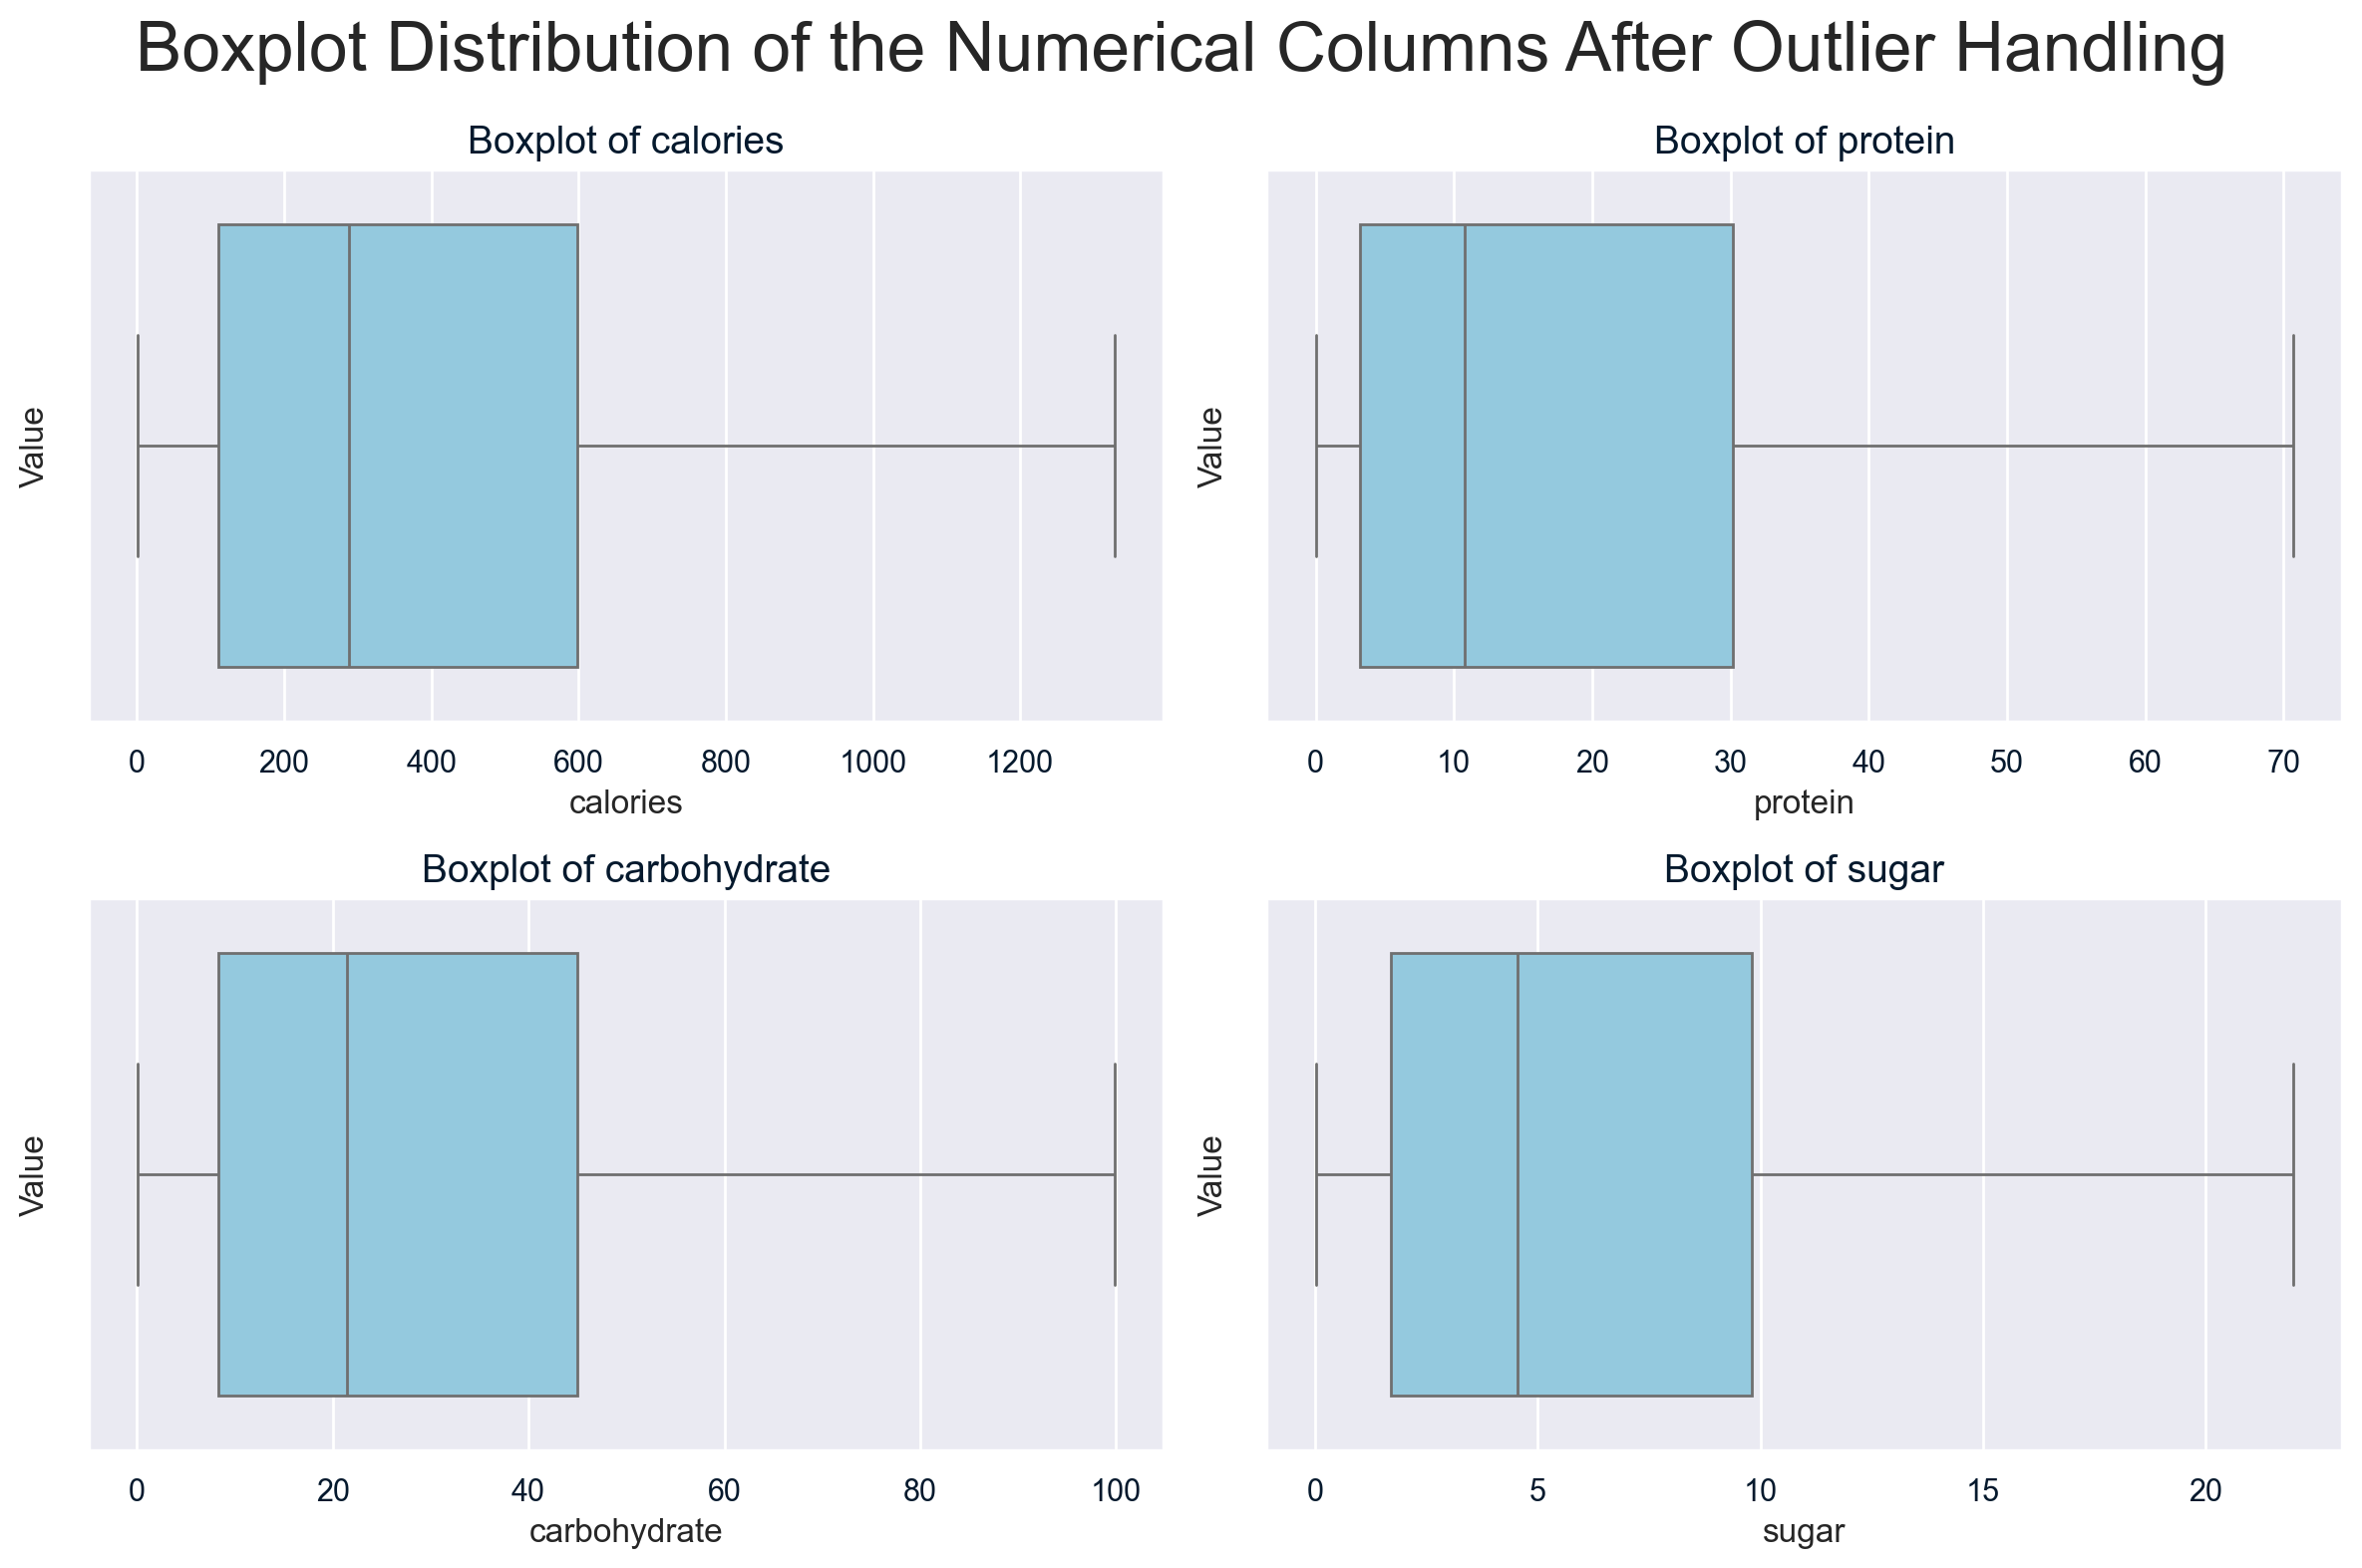

In [22]:
# Create boxplots for each numerical column.
plt.figure(figsize=(12, 8))
plt.suptitle("Boxplot Distribution of the Numerical Columns After Outlier Handling", fontsize=25)
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i) 
    sns.boxplot(x=recipe_df[column], color='skyblue')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Value', fontsize=12)

# Adjust layout and display the plots.
plt.tight_layout()
plt.show()

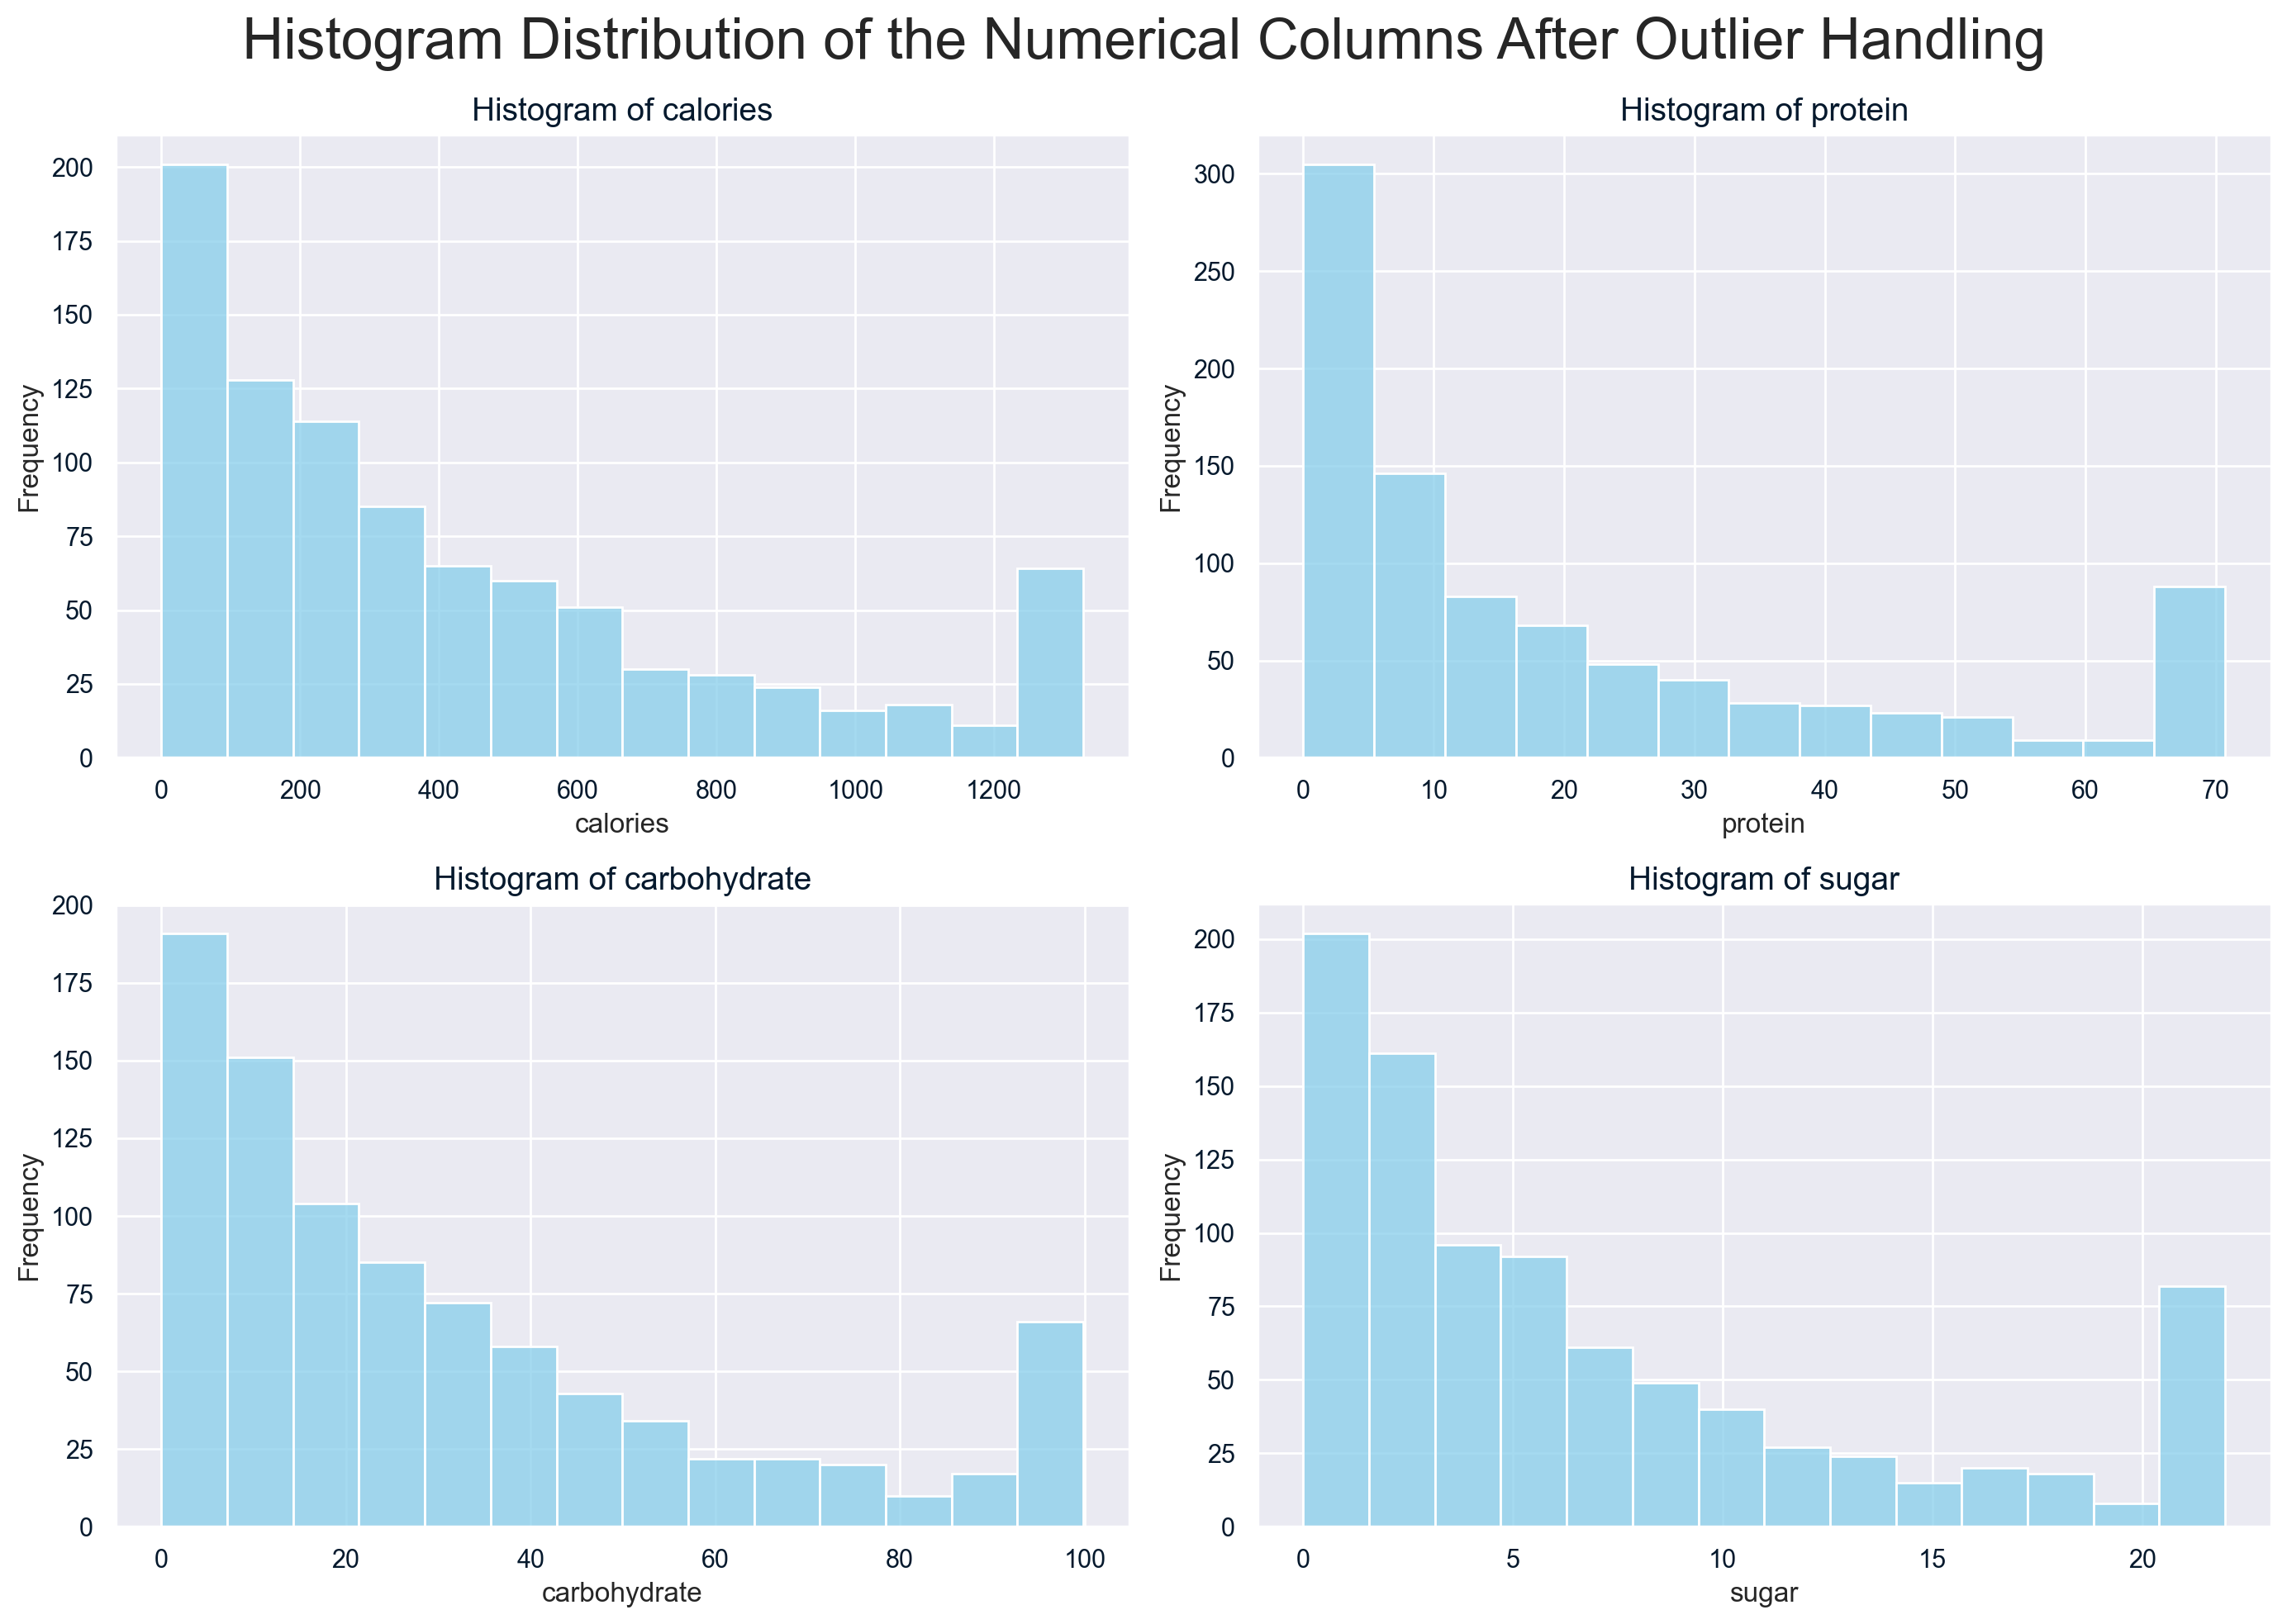

In [23]:
# Create histogram for each numerical column.
plt.figure(figsize=(14, 10))
plt.suptitle("Histogram Distribution of the Numerical Columns After Outlier Handling", fontsize=25)
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i) 
    sns.histplot(x=recipe_df[column], color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout and display the plots.
plt.tight_layout()
plt.show()

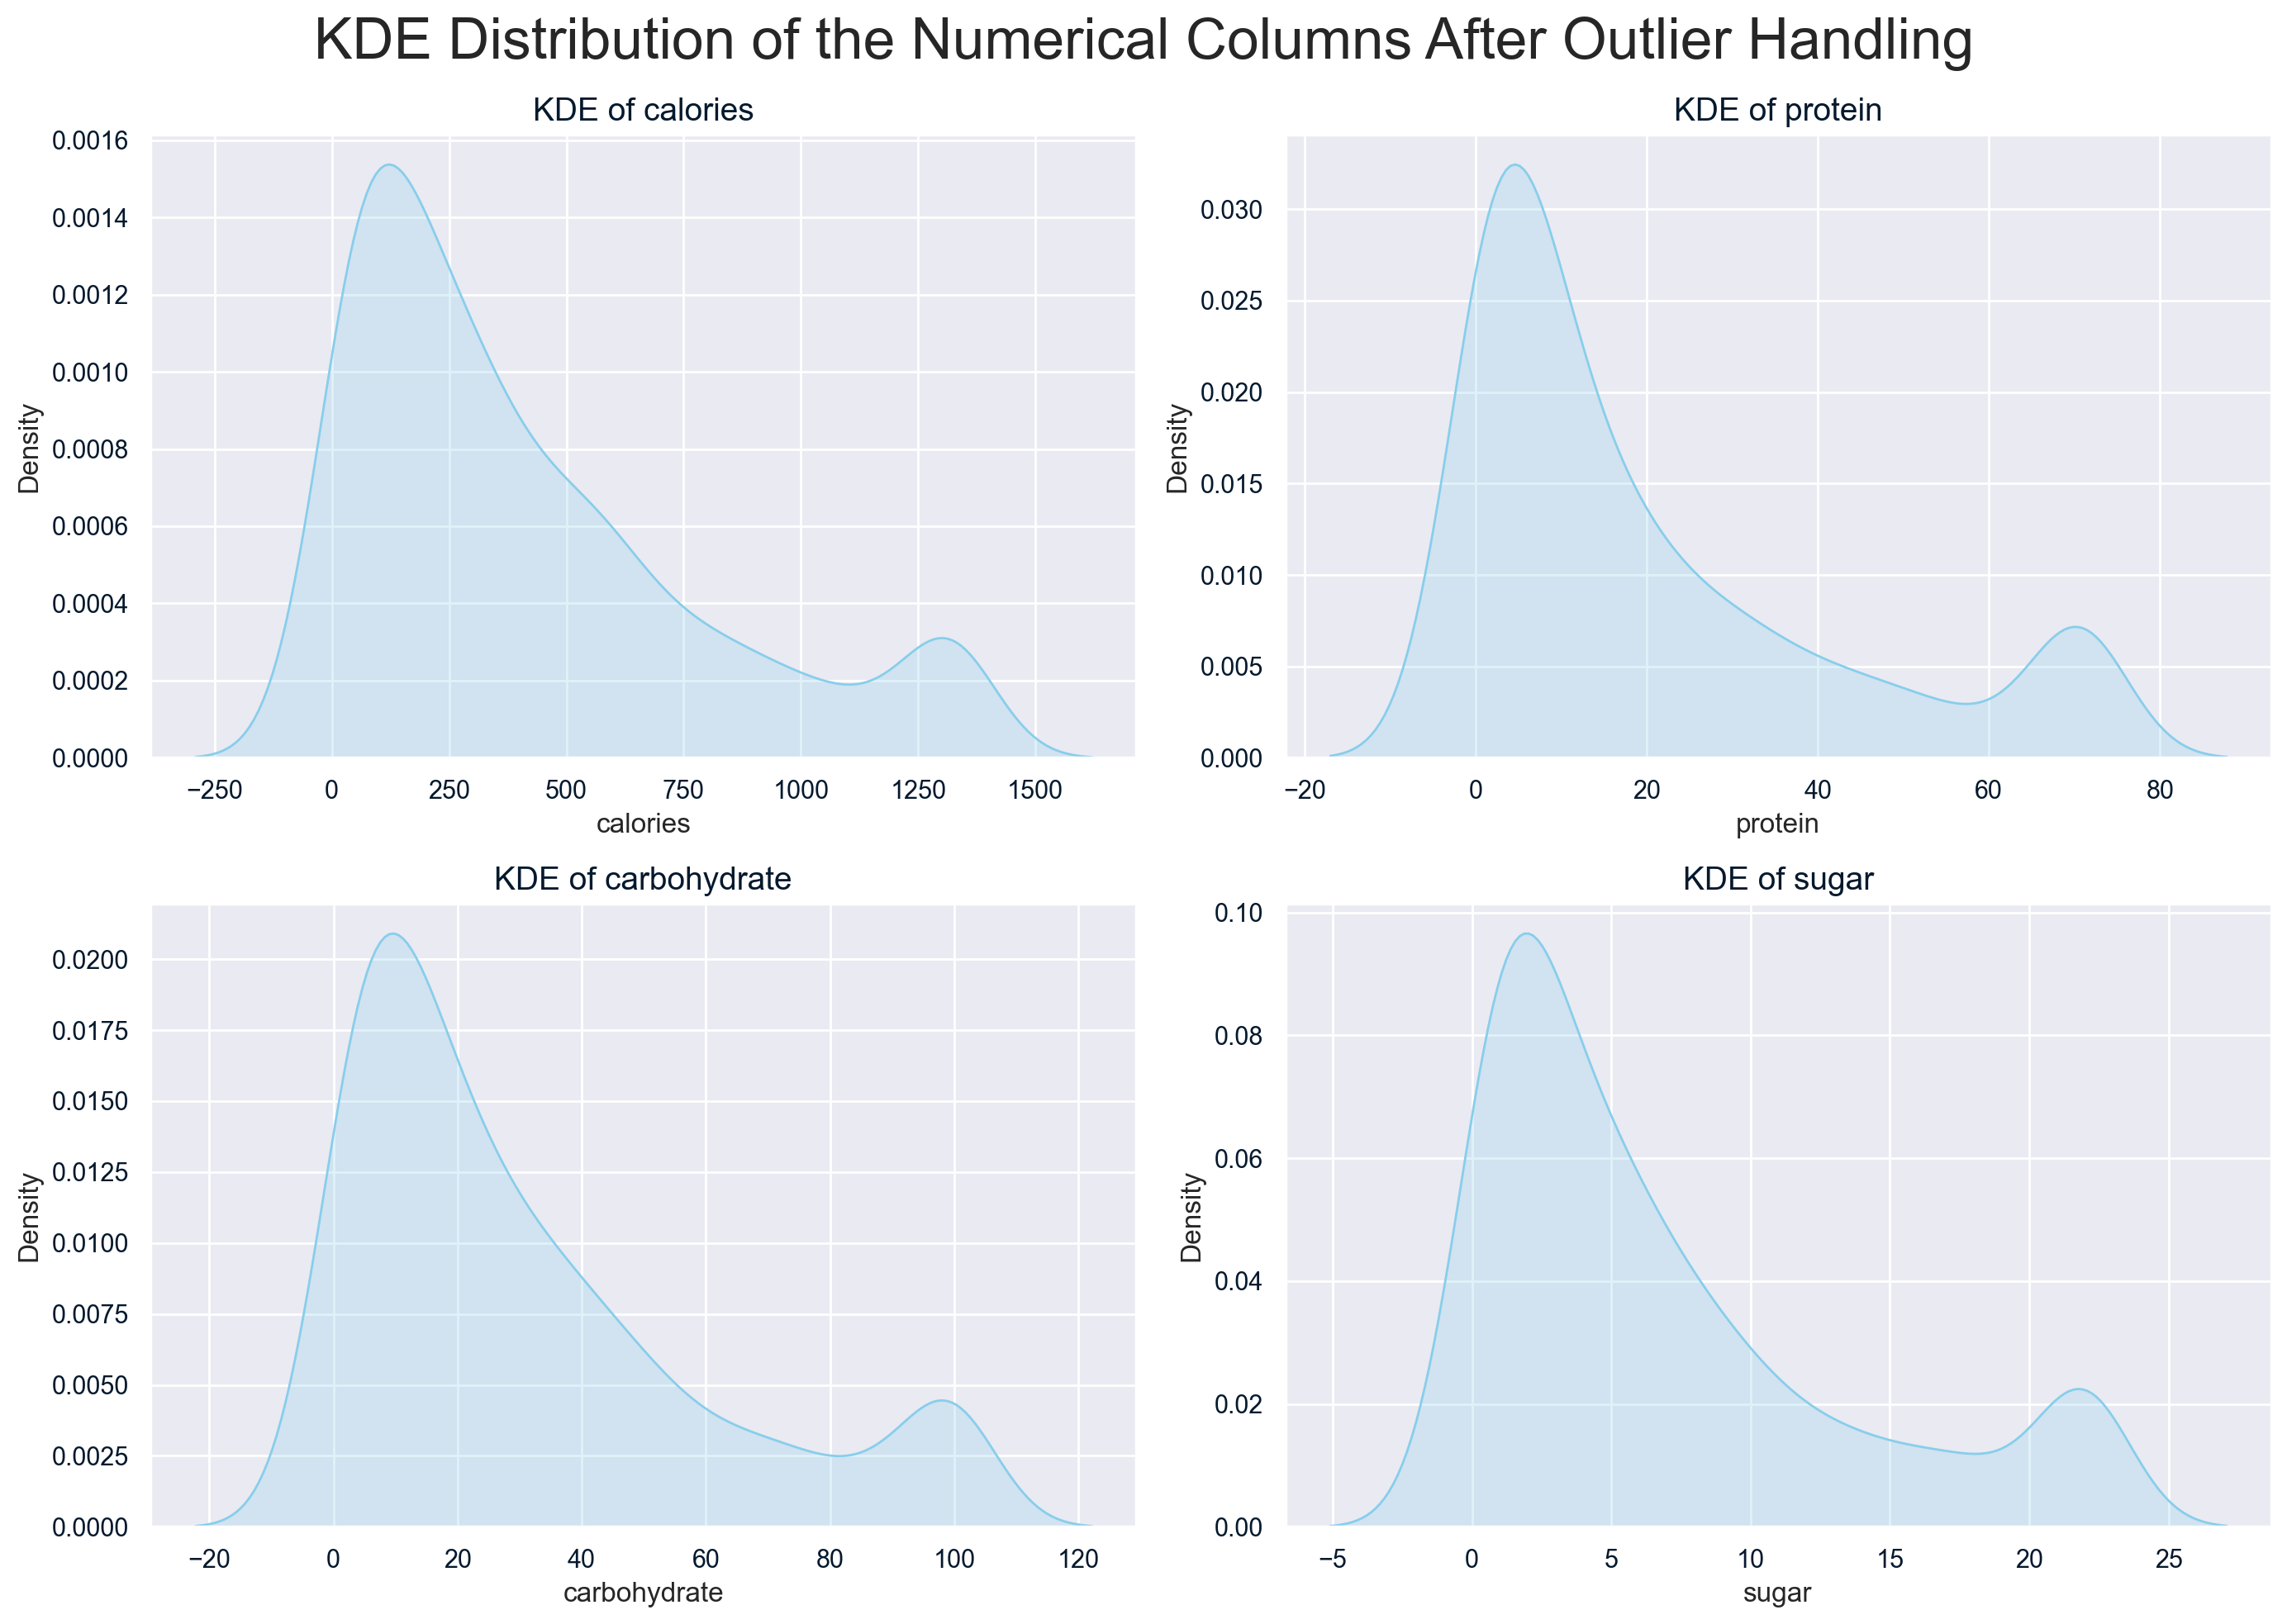

In [24]:
# Create KDE plot for each numerical column after outlier handling
plt.figure(figsize=(14, 10))
plt.suptitle("KDE Distribution of the Numerical Columns After Outlier Handling", fontsize=25)
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i) 
    sns.kdeplot(data=recipe_df[column], color='skyblue', shade=True)
    plt.title(f'KDE of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()

plt.show()

The data has been preprocessed by addressing inconsistencies, dropping duplicates, removing missing values, and handling outliers. It is now time to conduct exploratory data analysis.

# 3. Exploratory Data Analysis

In [25]:
# Print the first few rows.
recipe_df.head(7)

recipe  calories  carbohydrate  ...       category  servings traffic_level
1       2     35.48         38.56  ...         Potato         4          High
2       3    914.28         42.68  ...      Breakfast         1           Low
3       4     97.03         30.56  ...      Beverages         4          High
4       5     27.05          1.85  ...      Beverages         4           Low
5       6    691.15          3.46  ...  One Dish Meal         2          High
6       7    183.94         47.95  ...        Chicken         4           Low
7       8    299.14          3.17  ...   Lunch/Snacks         4           Low

[7 rows x 8 columns]

In [26]:
# Get the shape (number of rows and columns) of the dataset
nrows, ncols = recipe_df.shape

# Get the total size (number of entries) of the dataset
size = recipe_df.size

print(f"The dataset now has {nrows} rows and {ncols} columns, comprising a total of {size} data entries.")

The dataset now has 895 rows and 8 columns, comprising a total of 7160 data entries.


The dataset now has 895 rows and 8 columns, comprising a total of 7160 data entries.

In [27]:
# Inspect the data.
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   recipe         895 non-null    int64   
 1   calories       895 non-null    float64 
 2   carbohydrate   895 non-null    float64 
 3   sugar          895 non-null    float64 
 4   protein        895 non-null    float64 
 5   category       895 non-null    category
 6   servings       895 non-null    int64   
 7   traffic_level  895 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 51.2 KB


### Explore the `high_traffic` column. 

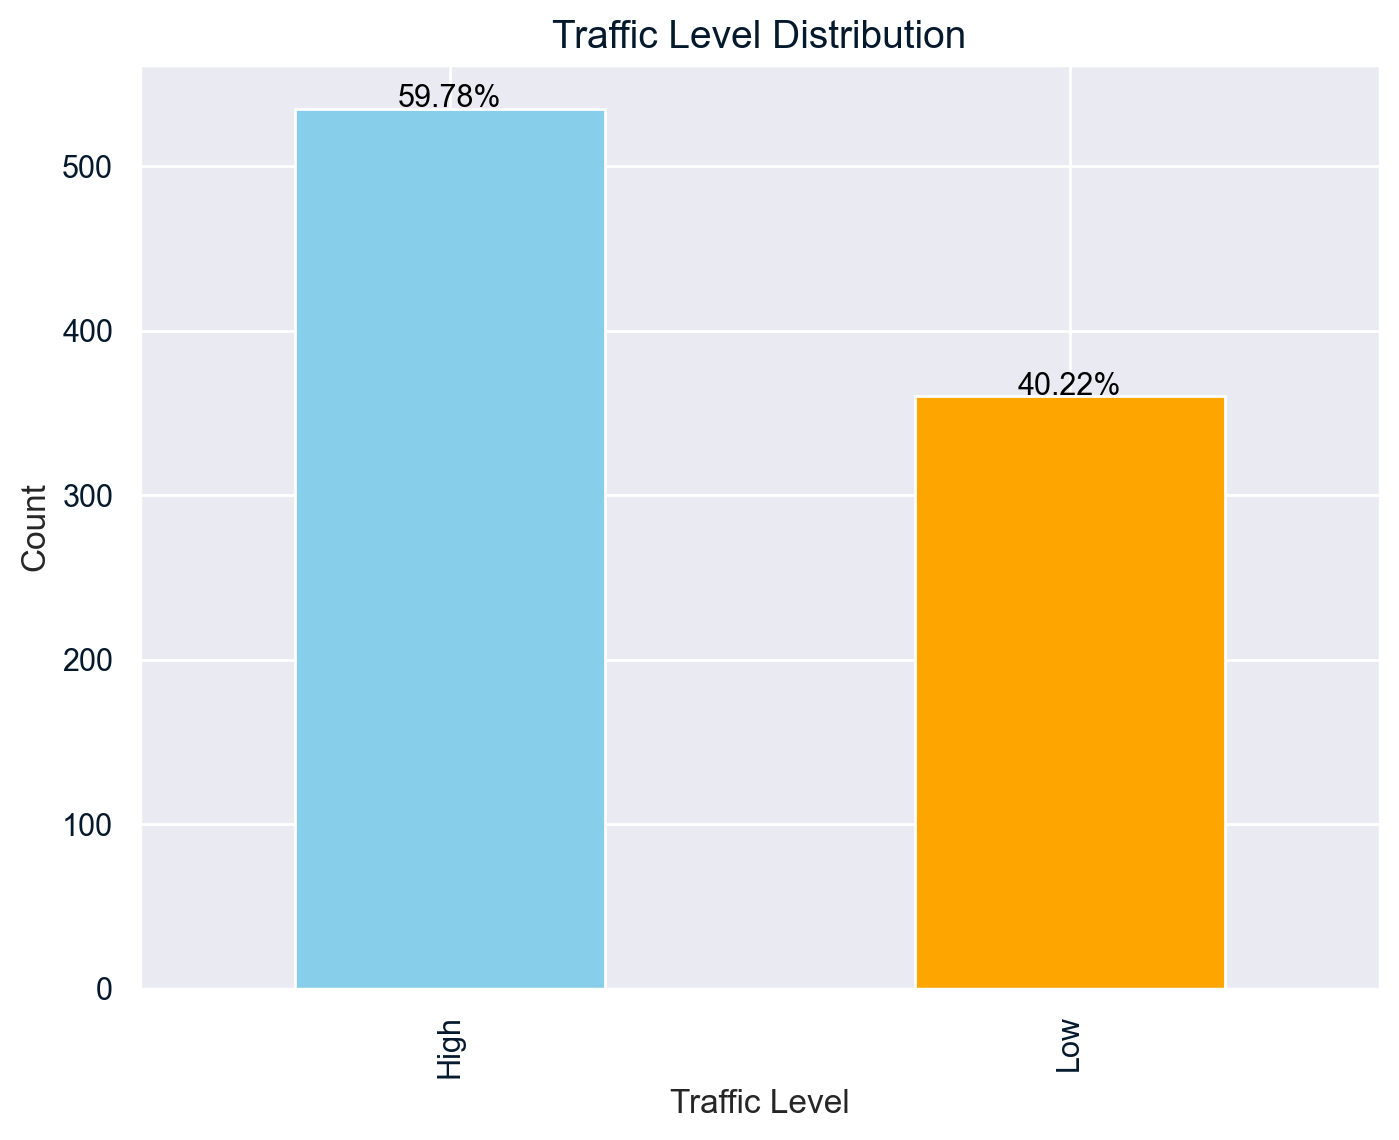

In [28]:
# Plot the bar graph.
ax = recipe_df["traffic_level"].value_counts().plot(kind="bar", color=["skyblue", "orange"], figsize=(8, 6))
plt.title("Traffic Level Distribution", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Traffic Level", fontsize=12)

# Calculate the percentages for annotation.
traffic_level = recipe_df["traffic_level"].value_counts(normalize=True) * 100
high_level_percentage = traffic_level["High"]
low_level_percentage = traffic_level["Low"]

# Annotate the percentages on the graph.
for i, value in enumerate(traffic_level):
    plt.text(i, recipe_df["traffic_level"].value_counts()[i] + 1, 
             f"{value:.2f}%", 
             ha='center', fontsize=11, color='black')

plt.show()

From the count plot of the `traffic_level` distribution, it is evident that `high` outcomes are more prevalent in this dataset, accounting for 59.78%, while `low` outcomes make up 40.22%, indicating that the dataset is imbalanced.

### Get the summary statistics of the numerical variables

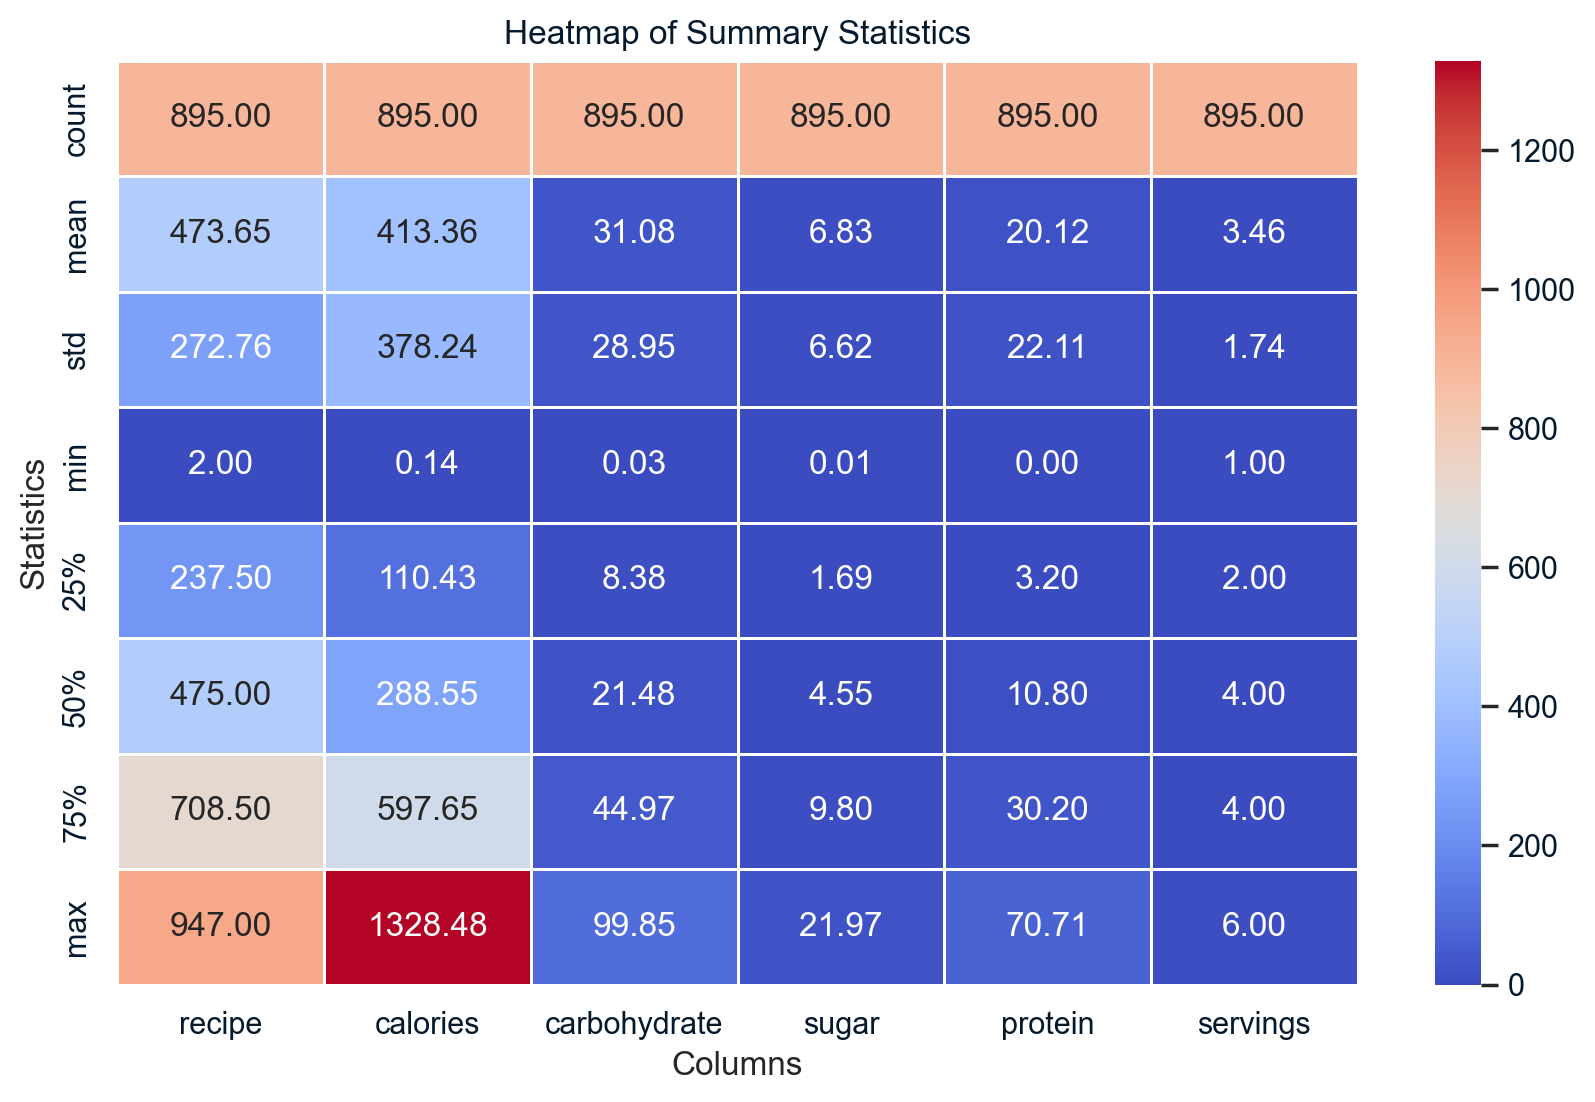

In [29]:
# Generate summary statistics
summary_stats = recipe_df.describe()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(summary_stats, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title and labels
plt.title("Heatmap of Summary Statistics")
plt.xlabel("Columns")
plt.ylabel("Statistics")
plt.show()

The heatmap above shows that the mean values for `calories`, `carbohydrate`, `sugar`, and `protein` are relatively higher than their respective medians, indicating a right-skewed distribution likely due to the presence of outliers (data points significantly larger than the norm). Conversely, the `servings` column exhibits a slight left skew, with the mean being slightly lower than the median.








### Explore the Numerical Columns

#### Perform Correlation Analysis.

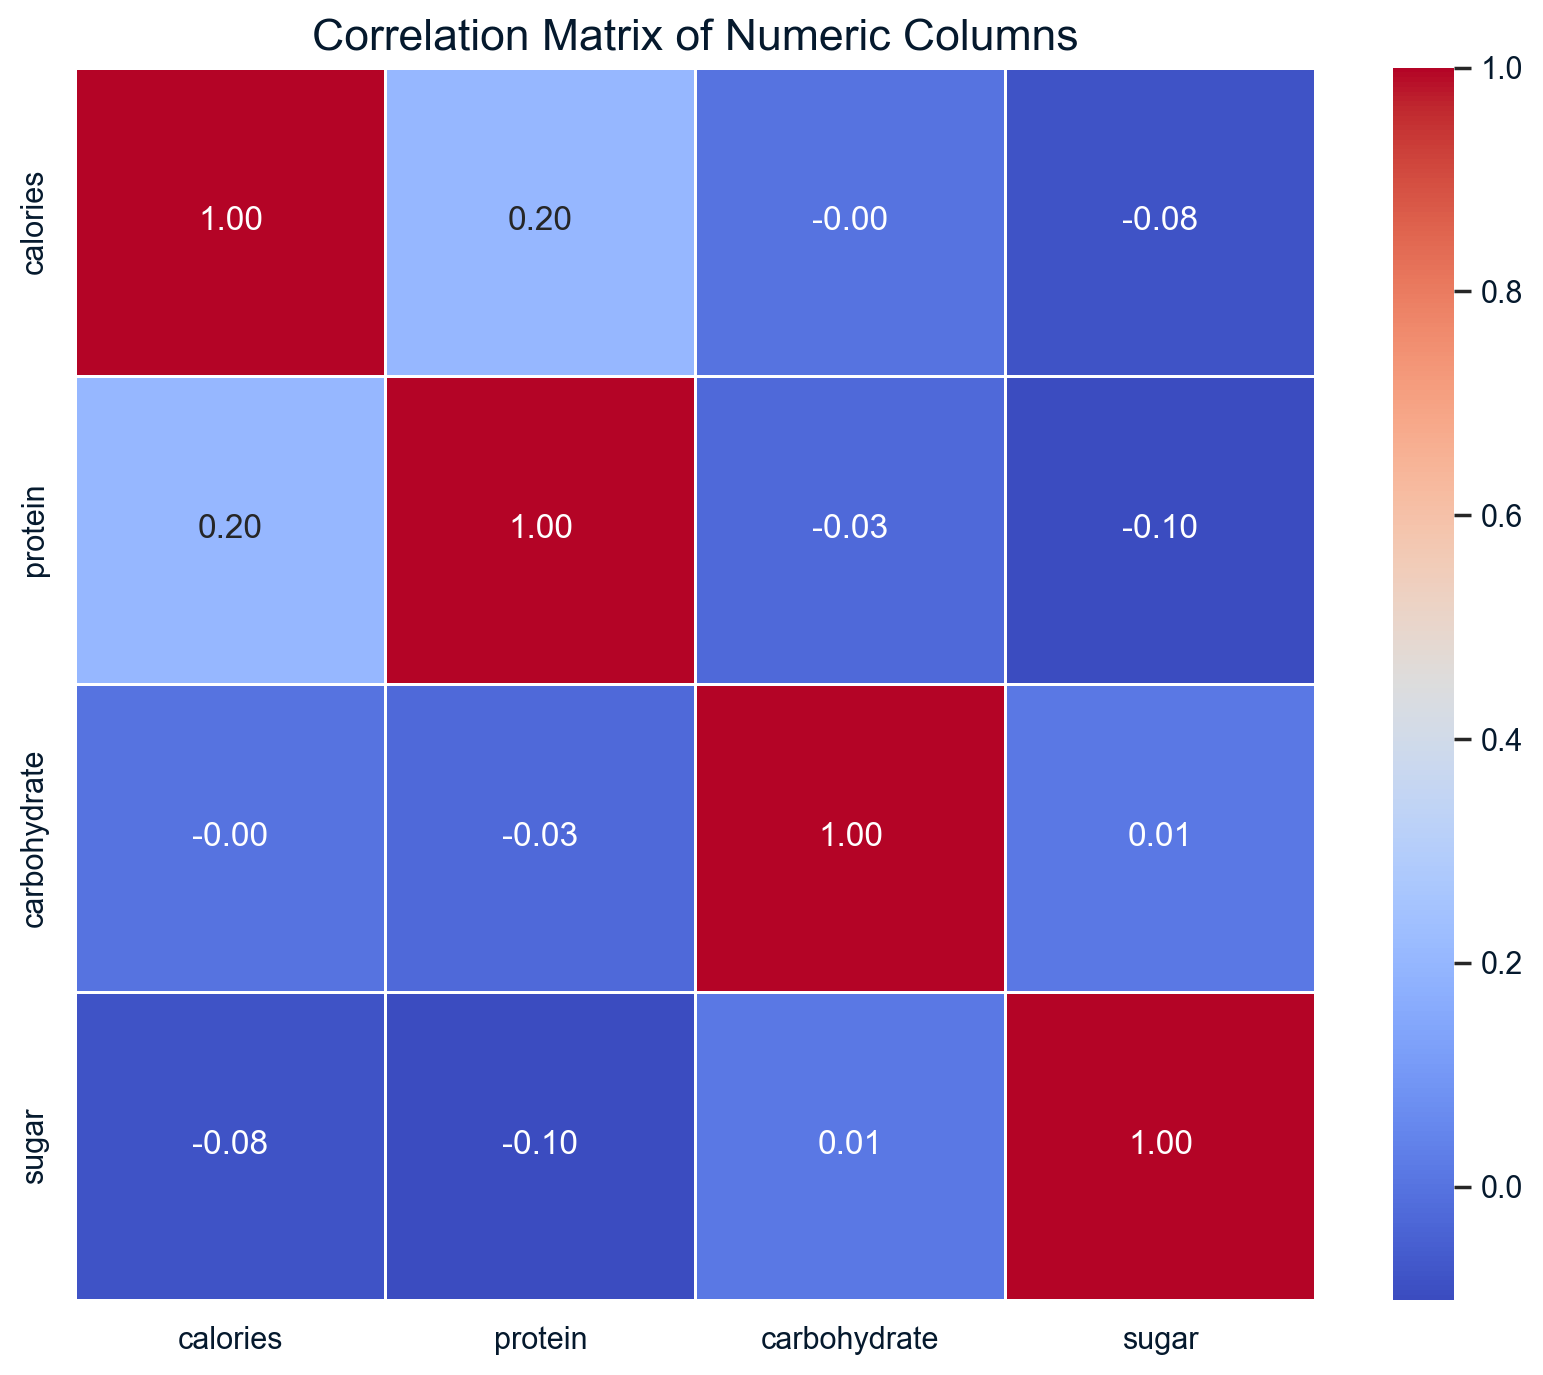

In [30]:
# Perform Correlation Analysis.
plt.figure(figsize=(10, 8))
correlation_matrix = recipe_df[numerical_columns].corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Columns", fontsize=16)
plt.show()

The heatmap above shows the correlation values between the variables. There is a low positive correlation between calories and protein, indicating a weak association or relationship between these two variables. Similarly, there is a low negative correlation between protein and sugar, reflecting a weak inverse relationship. No significant correlation is observed between the remaining variables.

#### Scatter Plot of Each Numeric Column Against Each Other.

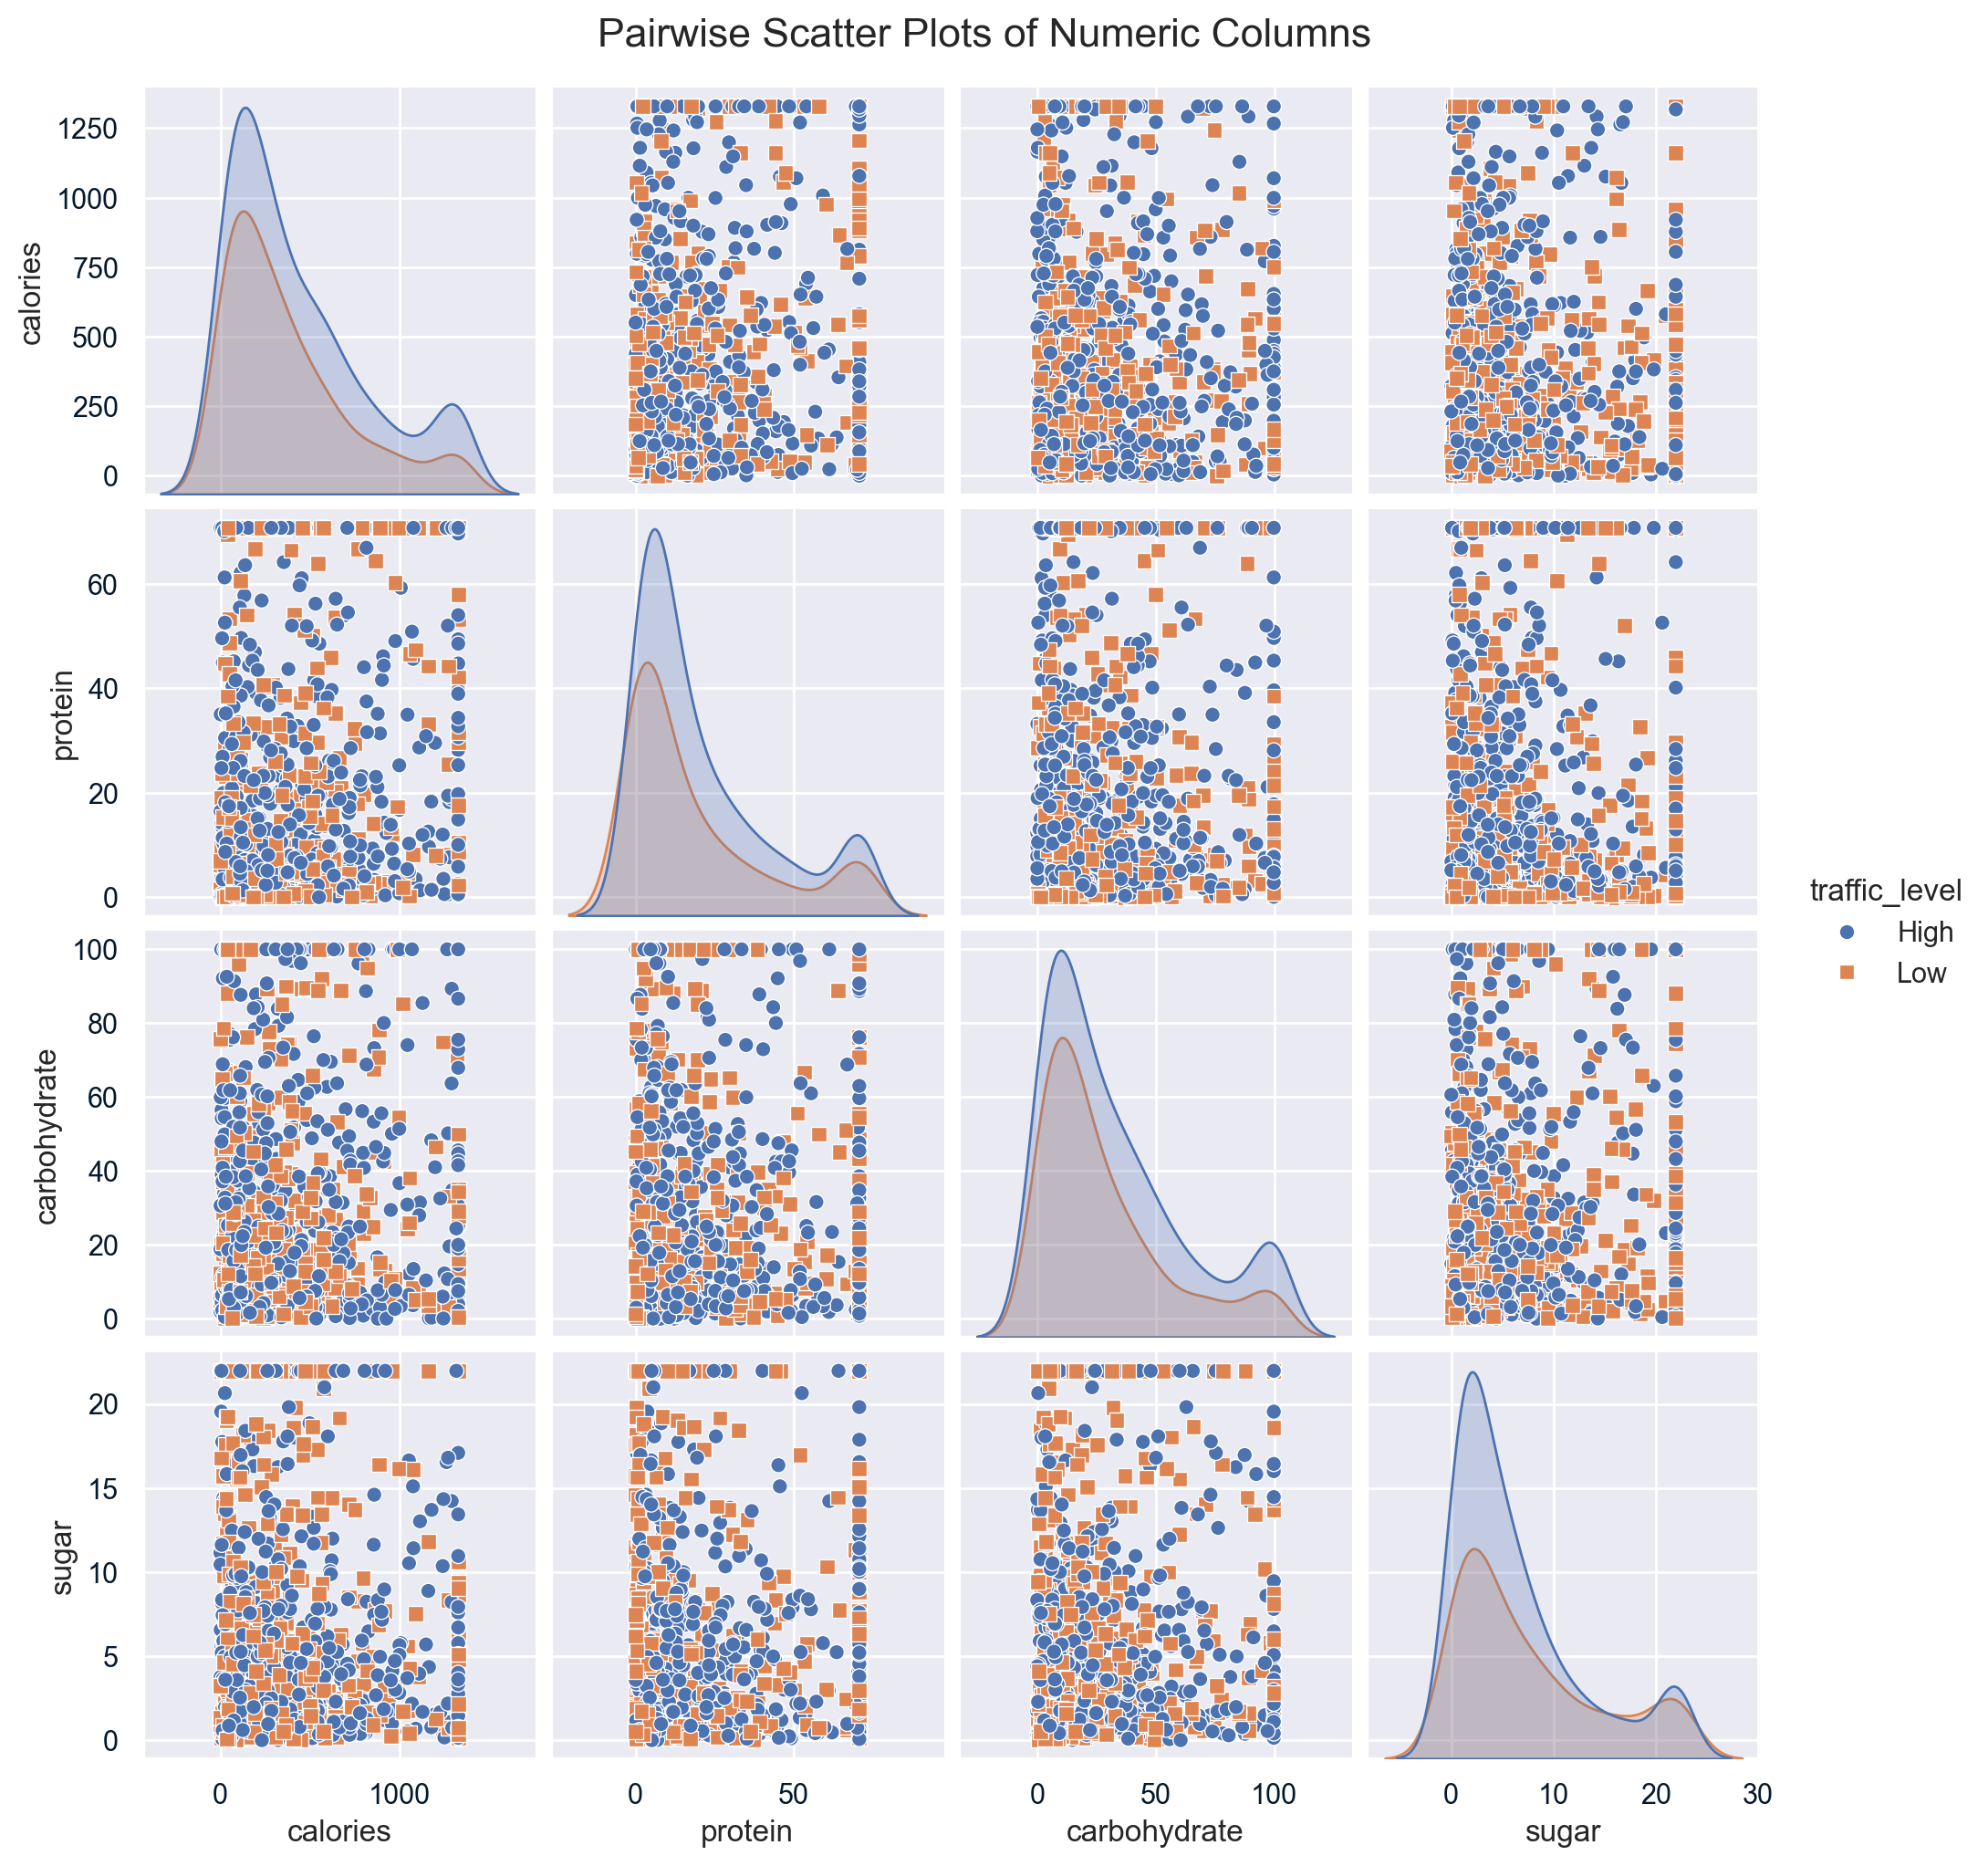

In [31]:
# Scatter Plot of Each Numeric Column Against Each Other.
# Create a pairplot (scatter plot matrix) of all numeric.
sns.pairplot(data=recipe_df, vars=numerical_columns, hue="traffic_level", diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pairwise Scatter Plots of Numeric Columns", y=1.02, fontsize=16)
plt.show()

#### Box Plot of Each Numeric Column Against traffic_level

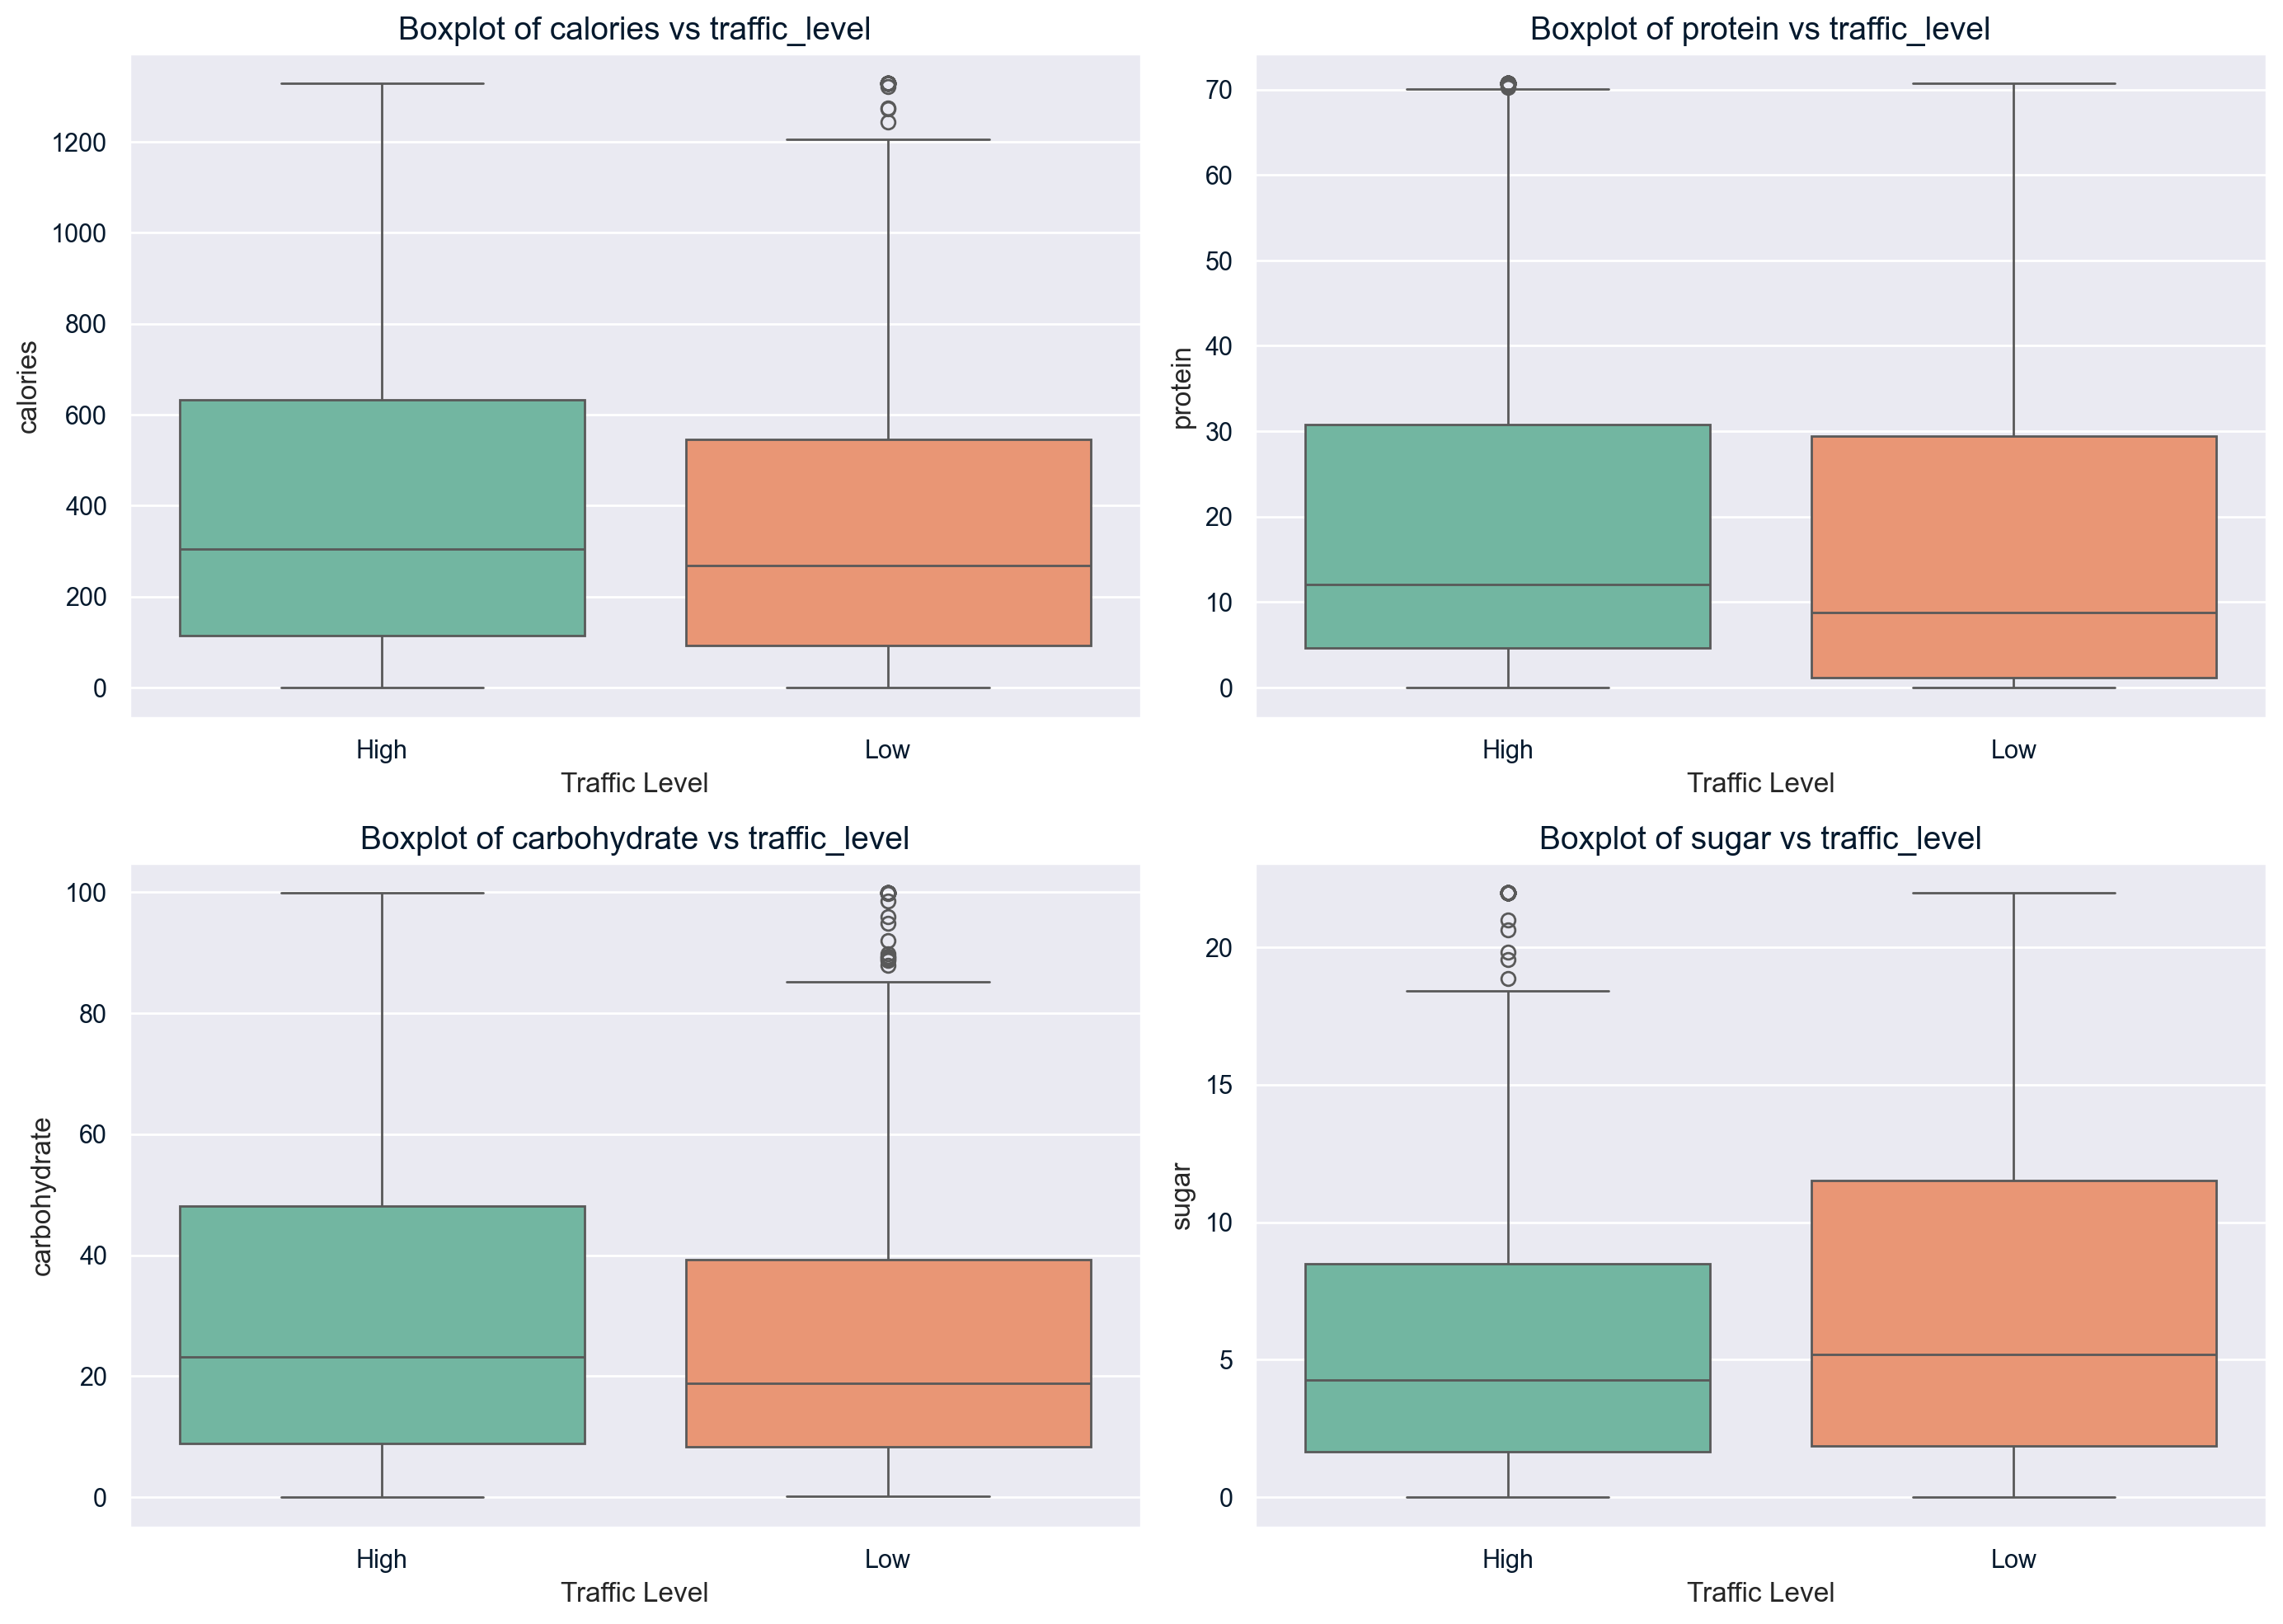

In [32]:
# Box Plot of Each Numeric Column Against traffic_level
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='traffic_level', y=column, data=recipe_df, palette="Set2")
    plt.title(f'Boxplot of {column} vs traffic_level', fontsize=14)
    plt.xlabel('Traffic Level', fontsize=12)
    plt.ylabel(column, fontsize=12)

plt.tight_layout()

plt.show()

To explore the relationship between the numerical columns and the target variable, I plotted a boxplot for each independent variable against the dependent variable. From the plot above, we can observe that the median values of carbohydrates, calories, and protein are higher for the high traffic level category. This suggests that foods with high calorie, carbohydrate, or protein content could lead to relatively higher traffic on the website. In contrast, the median value of sugar for the high traffic category is low, indicating that people prefer foods with low sugar content, which tends to drive higher traffic to the website.

The plot below also agrees with this thought.

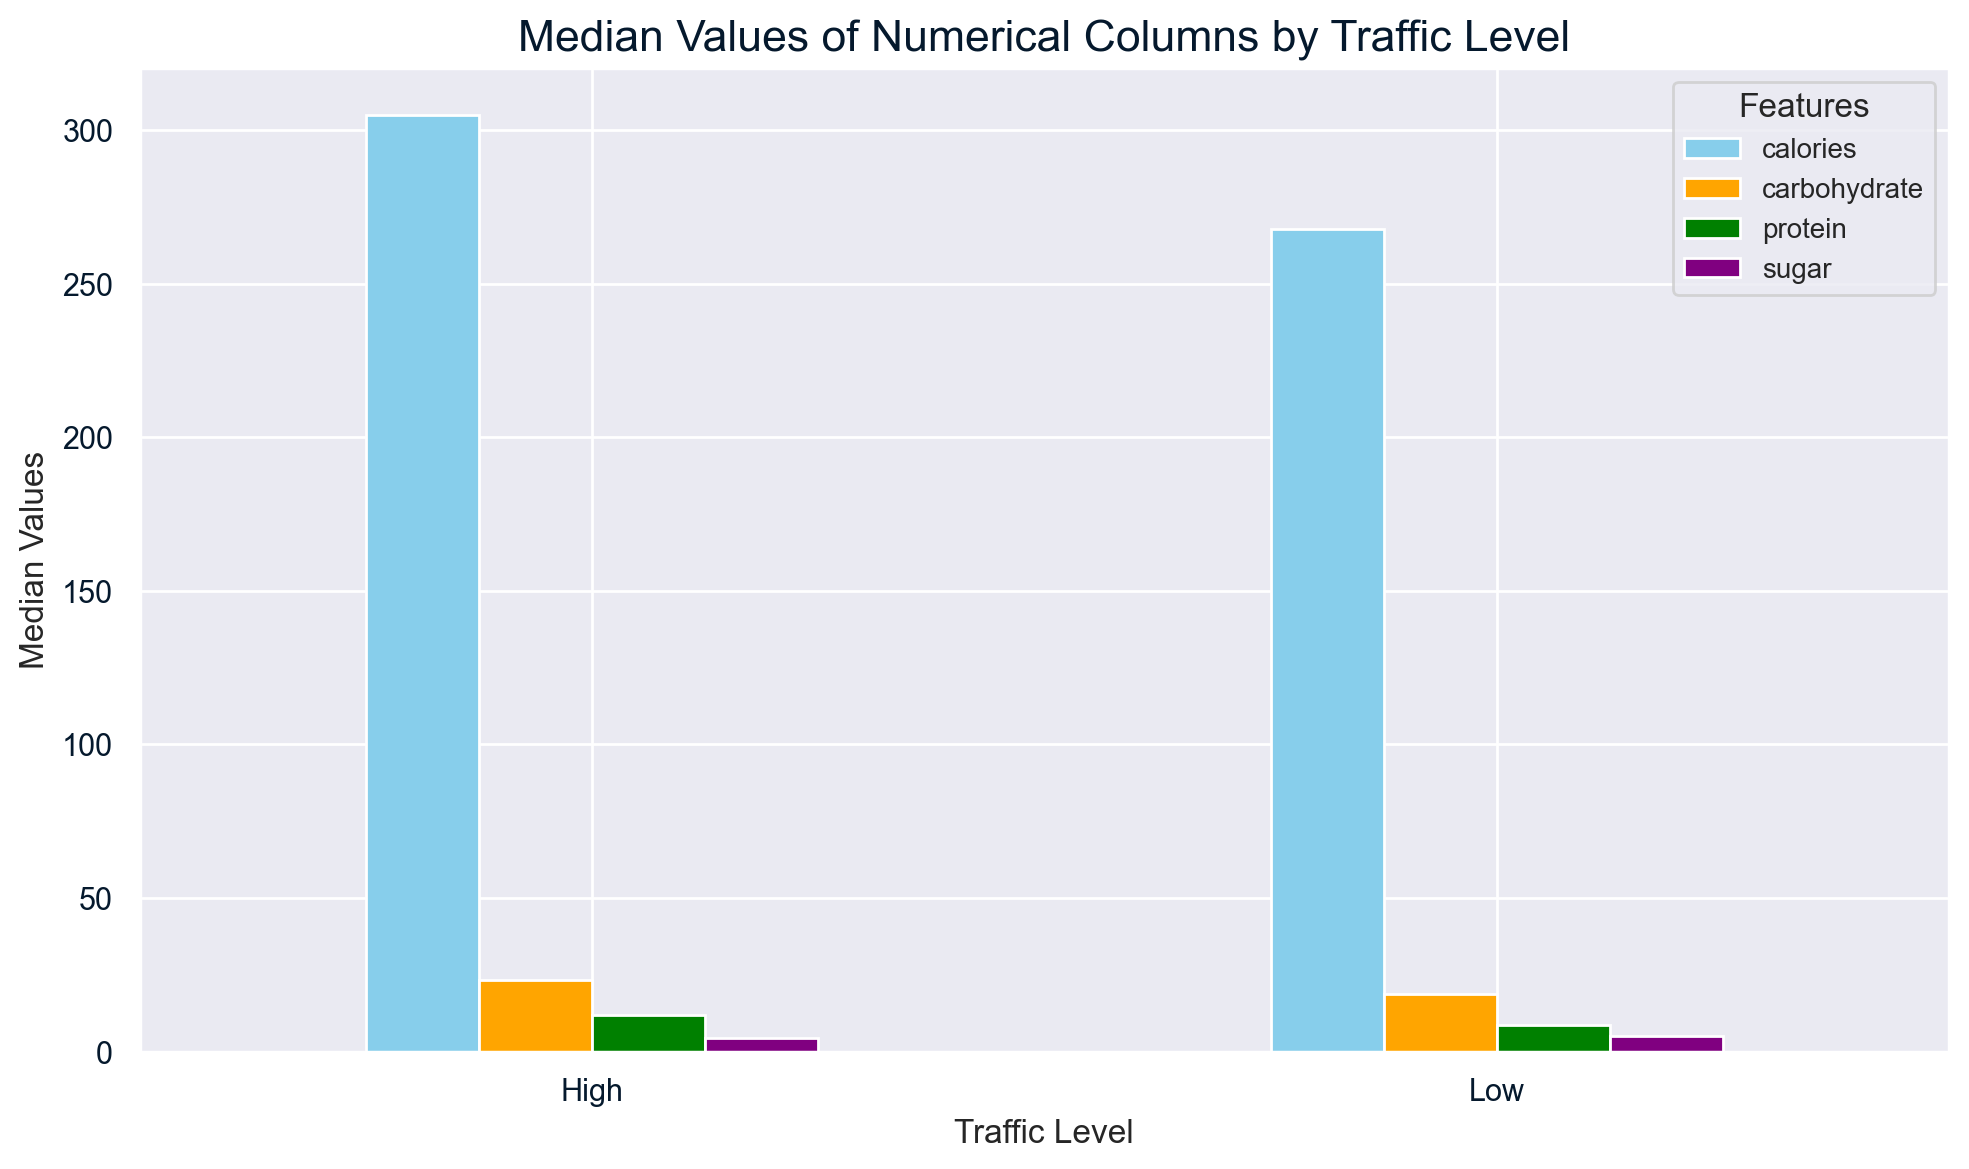

In [33]:
# Group by 'traffic_level' and calculate the median for numerical columns.
median_values = recipe_df.groupby("traffic_level")[["calories", "carbohydrate", "protein", "sugar"]].median()

# Plot the median values as a bar chart.
median_values.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange", "green", "purple"])

# Add labels and title.
plt.title("Median Values of Numerical Columns by Traffic Level", fontsize=16)
plt.xlabel("Traffic Level", fontsize=12)
plt.ylabel("Median Values", fontsize=12)
plt.xticks(rotation=0)  
plt.legend(title="Features", fontsize=10)
plt.tight_layout()

# Display the plot.
plt.show()

#### Explore the categorical columns

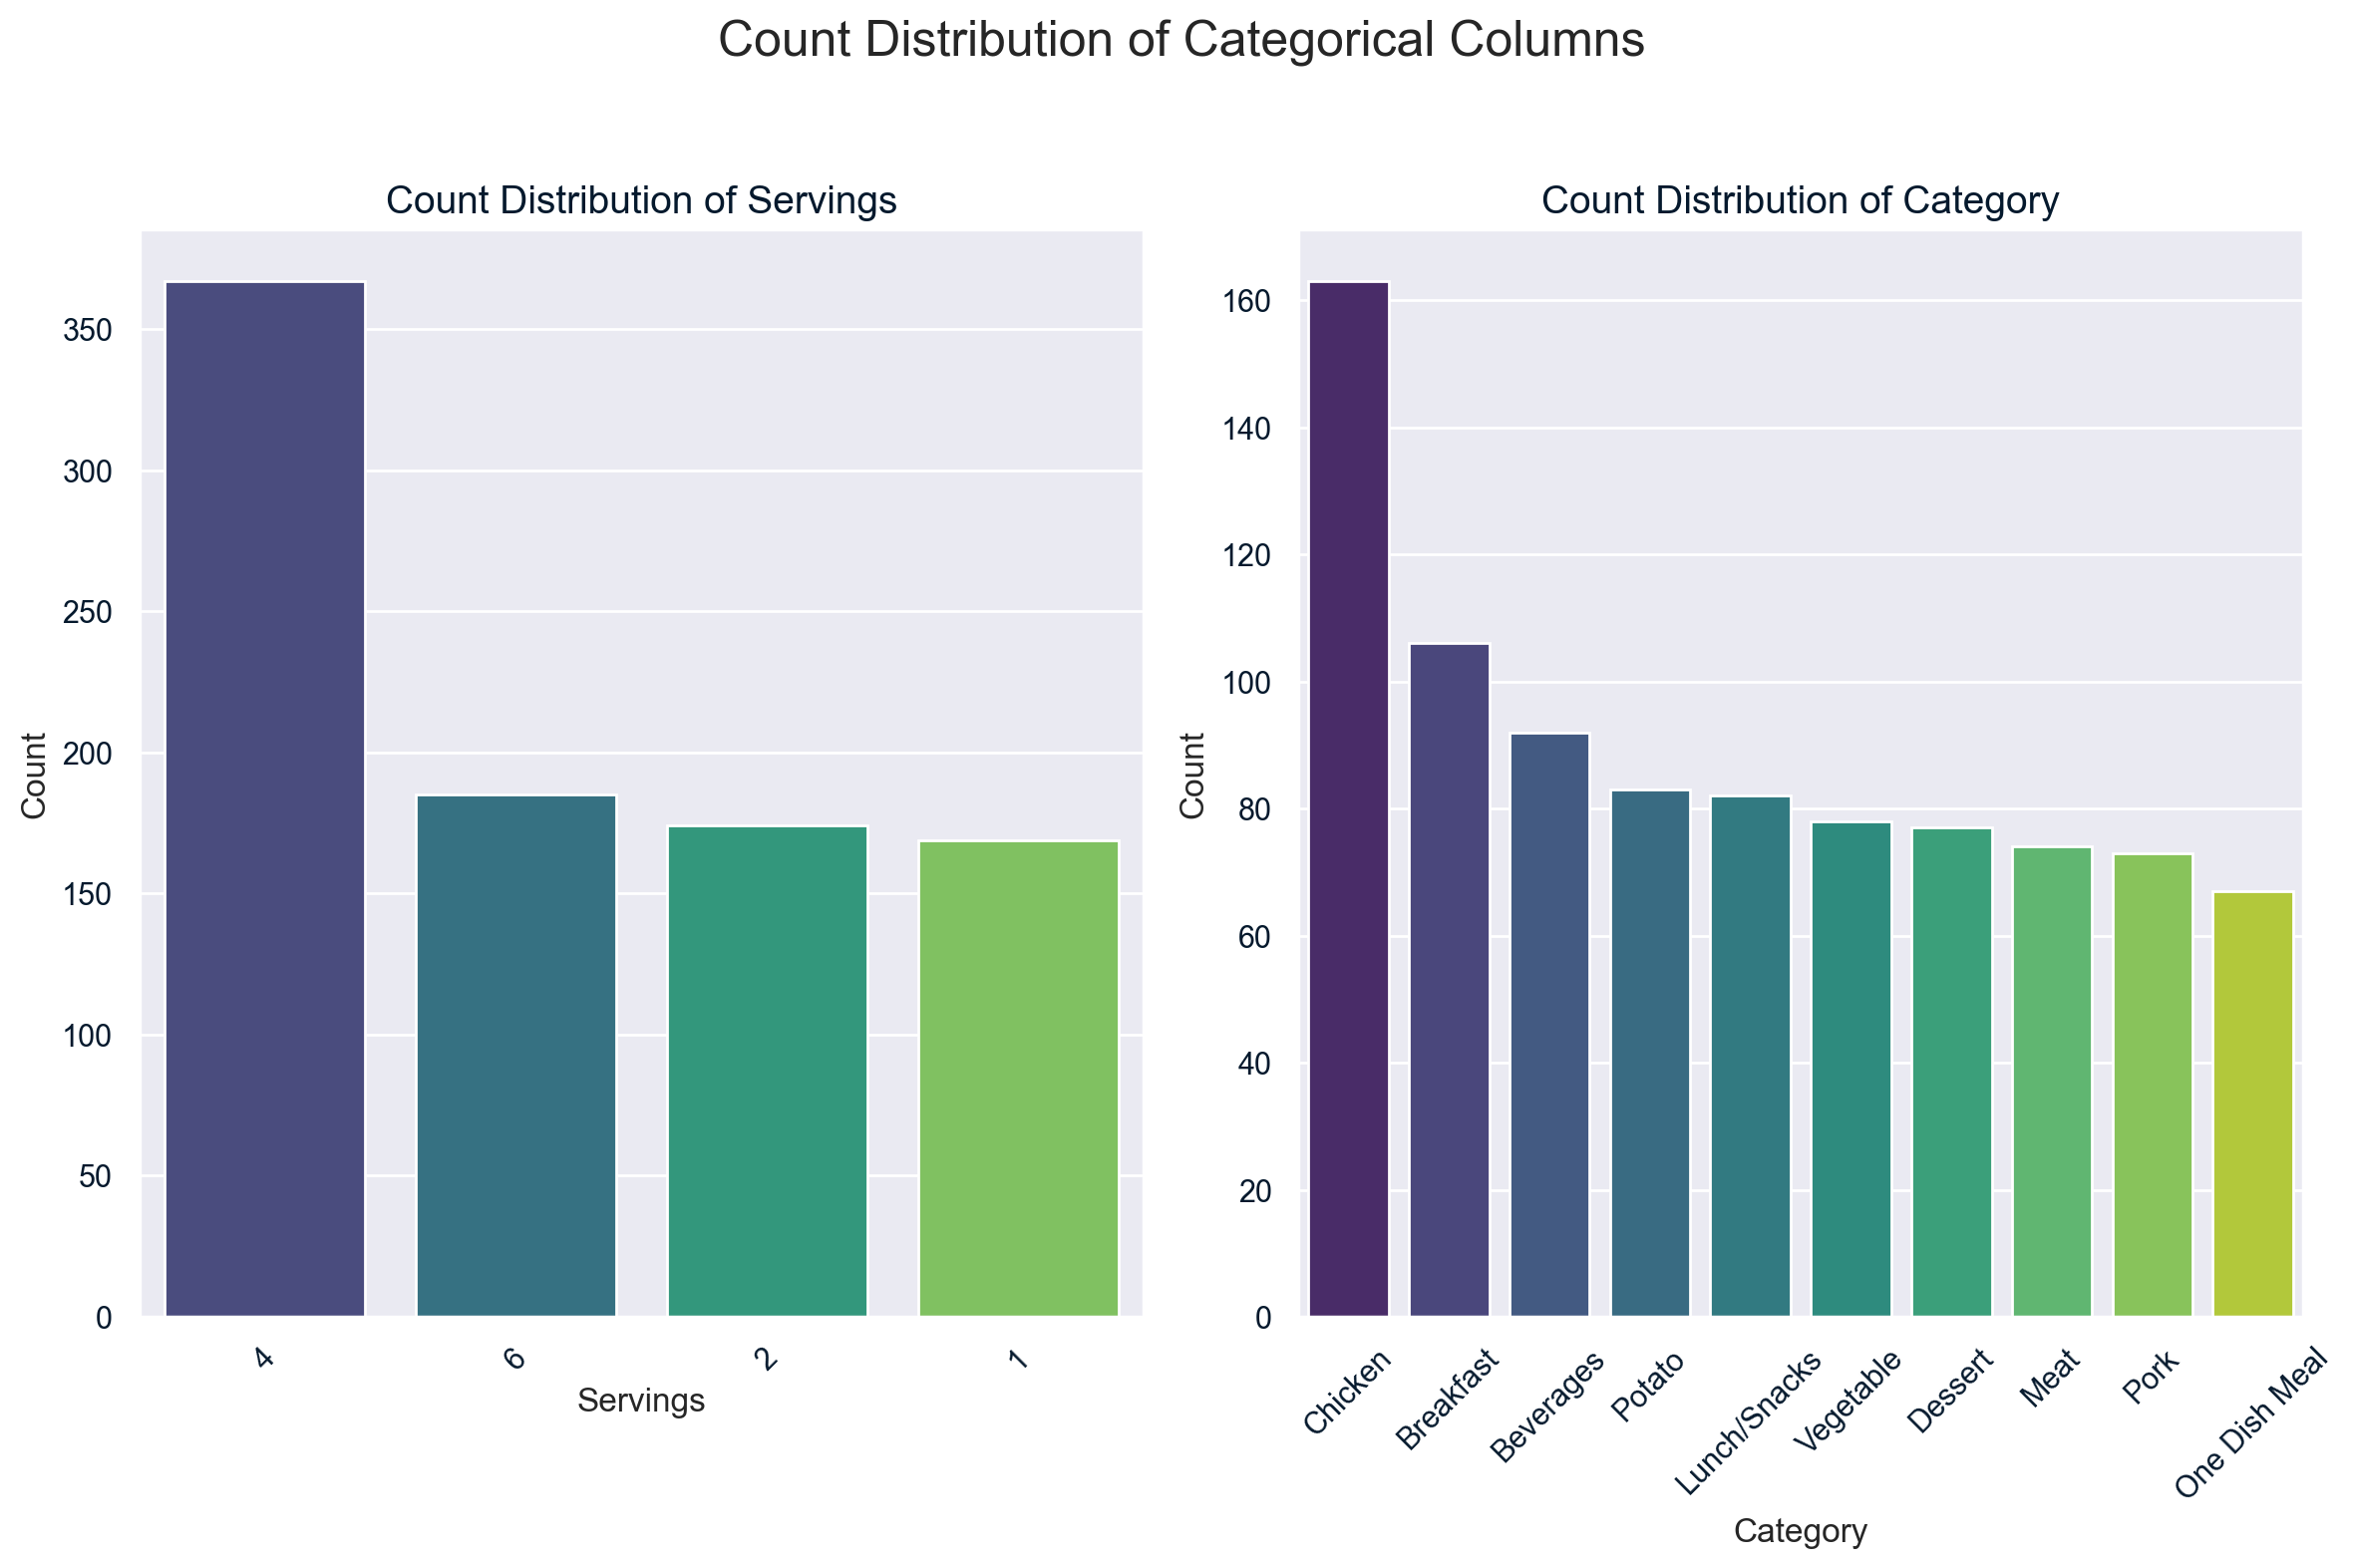

In [34]:
# List of categorical columns to plot.
categorical_columns = ["servings", "category"]

# Create a figure.
plt.figure(figsize=(12, 8))
plt.suptitle("Count Distribution of Categorical Columns", fontsize=18)

# Loop through the categorical columns.
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=recipe_df, x=column, palette="viridis", order=recipe_df[column].value_counts().index)
    plt.title(f"Count Distribution of {column.capitalize()}", fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)

# Adjust layout and display the plot.
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

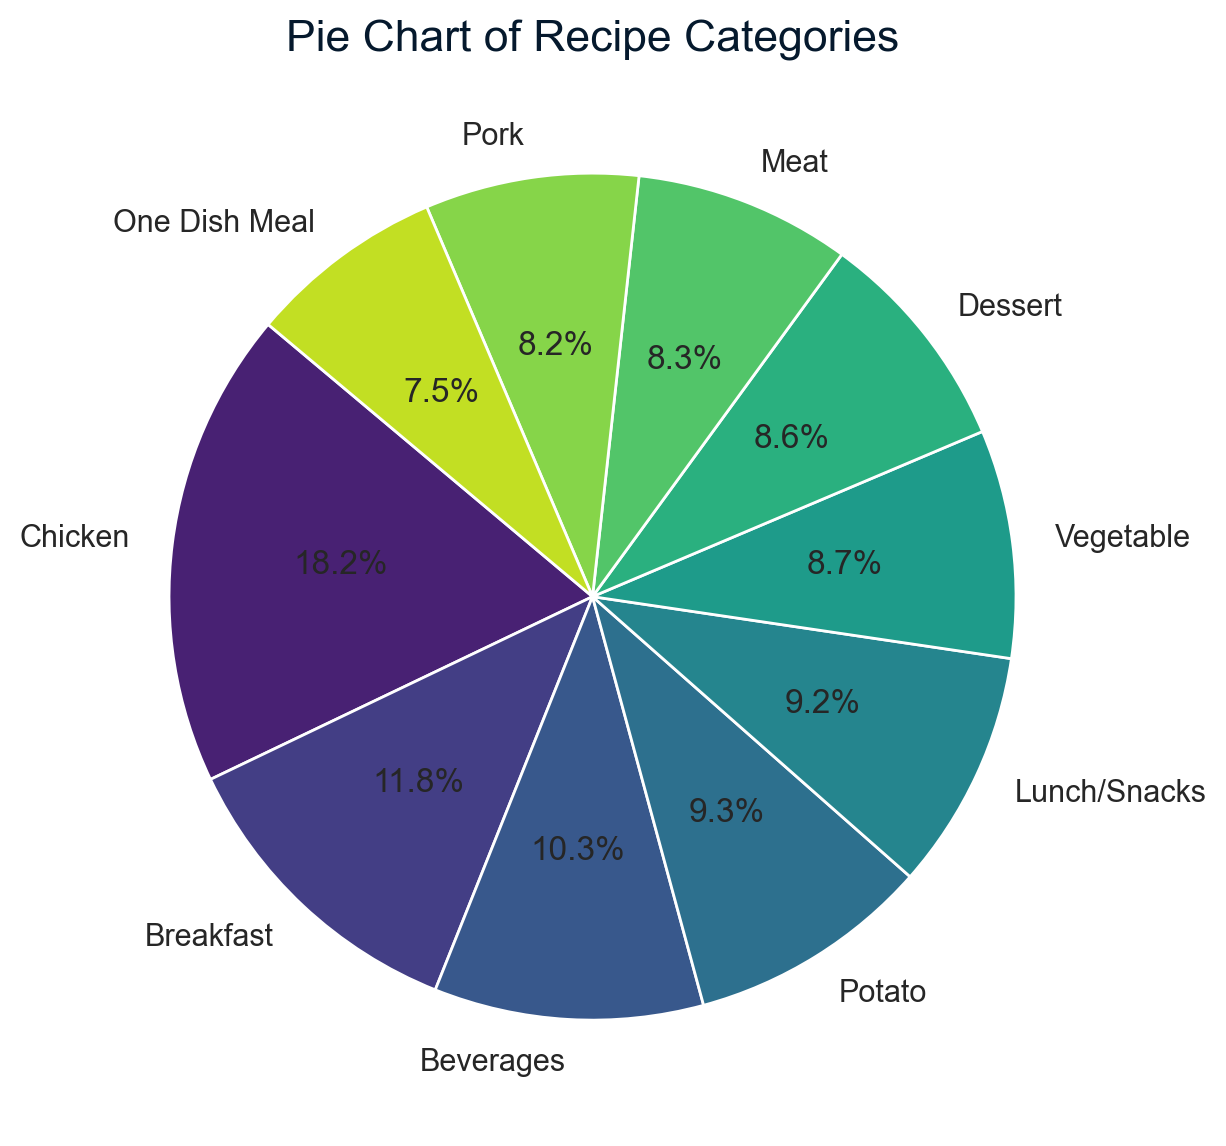

In [35]:
# Set the figure size.
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 2)
category_counts = recipe_df['category'].value_counts()
plt.pie(category_counts, 
        labels=category_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('viridis', len(category_counts)))
plt.title("Pie Chart of Recipe Categories", fontsize=16)

# Add some space between the plots.
plt.subplots_adjust(wspace=0.4) 

# Display the plots.
plt.tight_layout()
plt.show()

From the plot above, the most common serving size for recipes is 4, and the most prevalent type of recipe is Chicken. The breakfast is about 18.2% in this data.

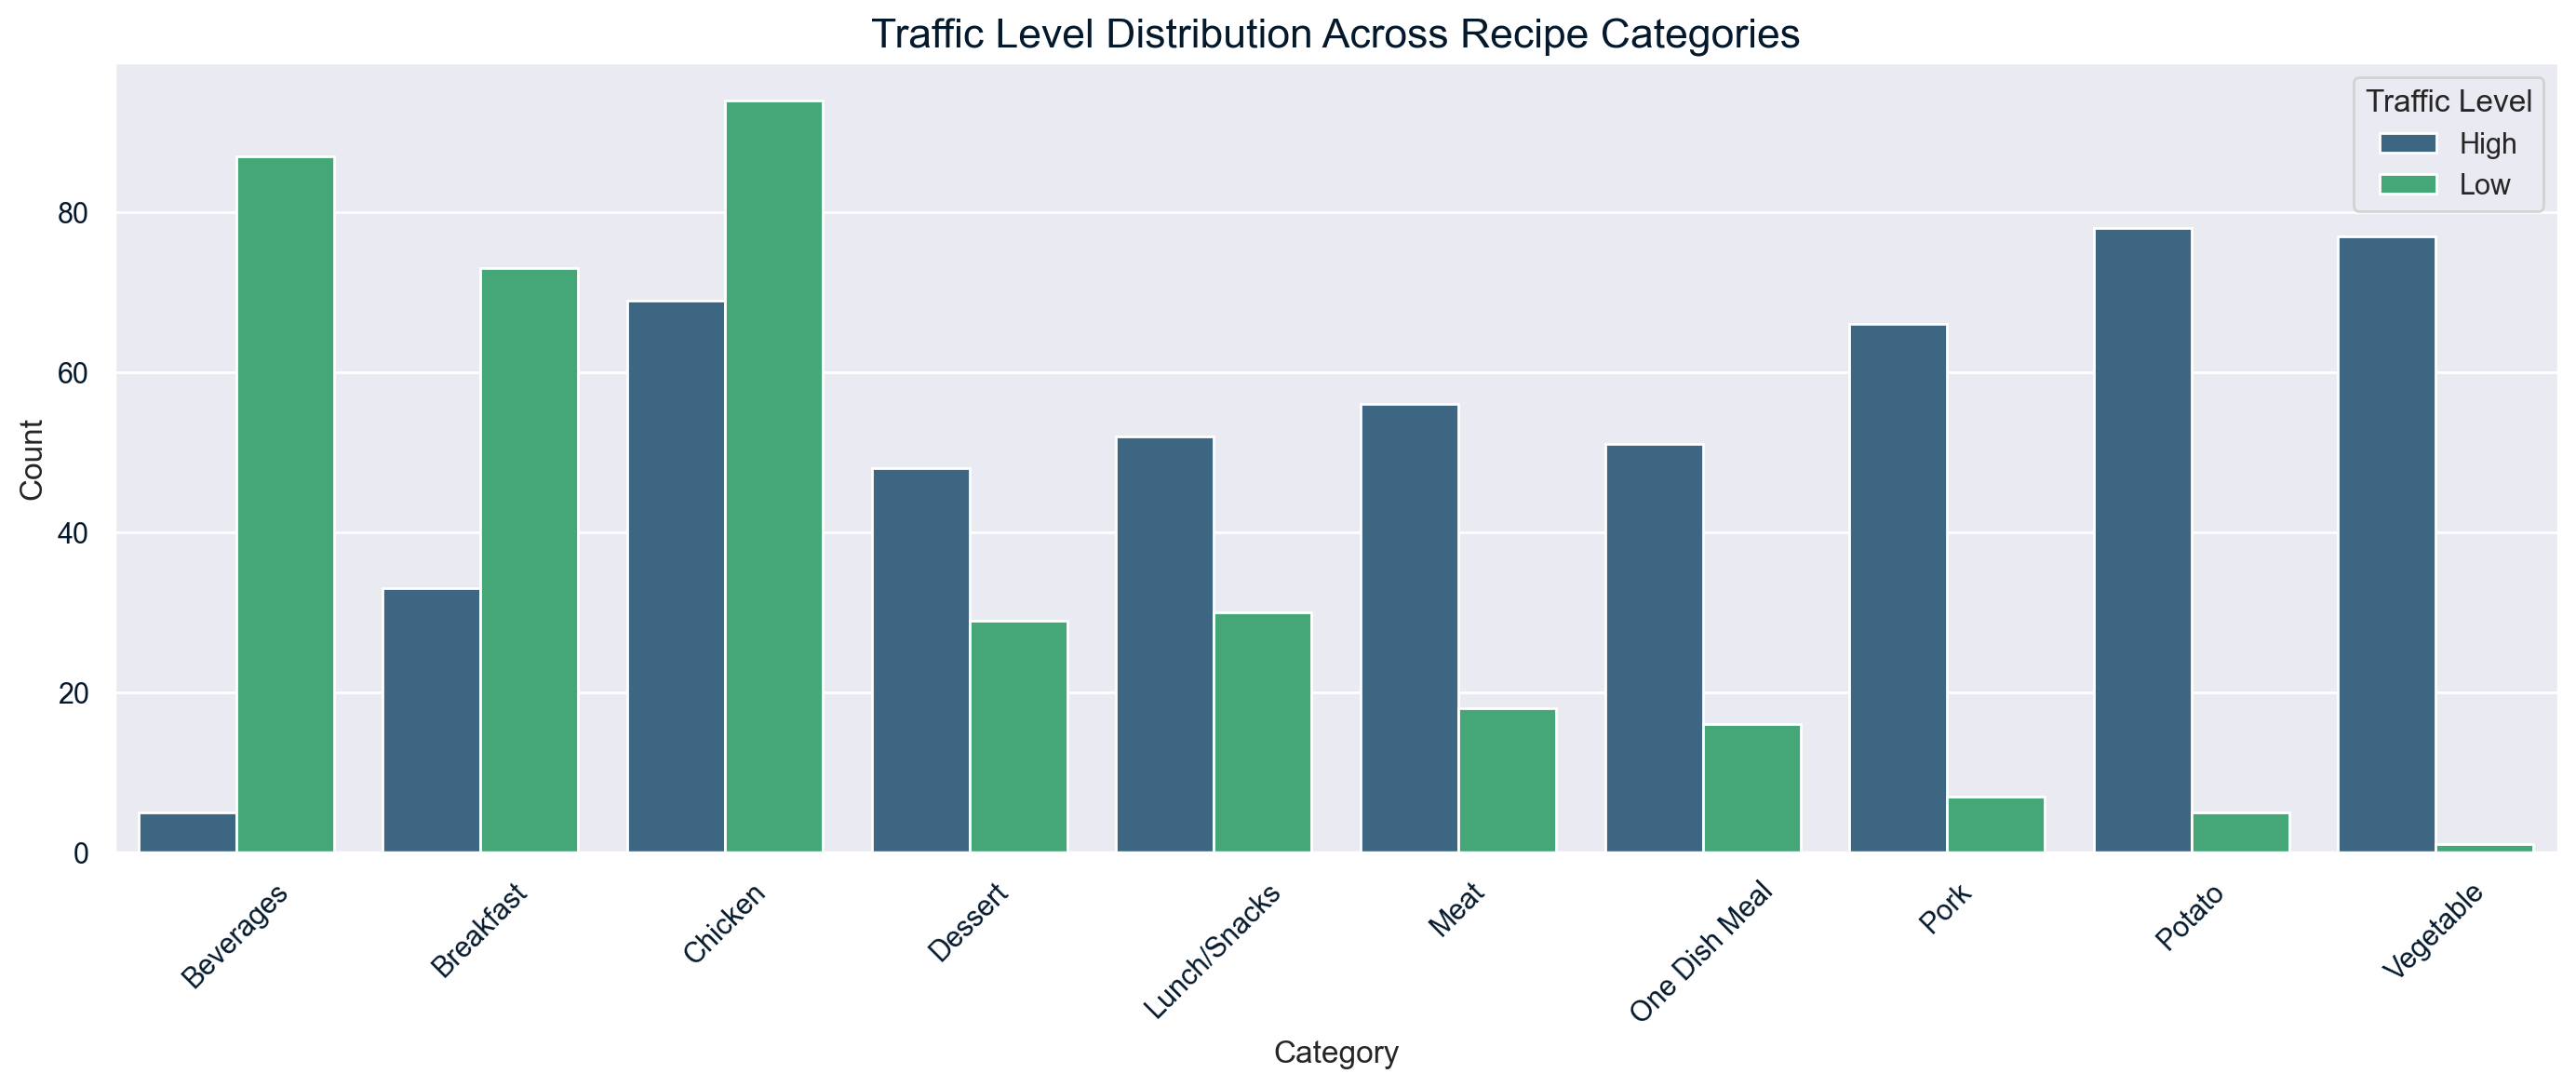

In [36]:
# Set the figure size.
plt.figure(figsize=(14, 6))

# Plot Category vs. Traffic Level.
sns.countplot(x='category', hue='traffic_level', data=recipe_df, palette='viridis')
plt.title("Traffic Level Distribution Across Recipe Categories", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Traffic Level', loc='upper right')

# Display the plot.
plt.tight_layout()
plt.show()

From the plot, it is evident that recipe types such as Vegetable, Potato, Pork, One Dish Meal, and Meat tend to drive more traffic to the website homepage, potentially increasing subscriptions. Conversely, selecting recipe types like Breakfast tends to result in lower traffic on the website.

<Figure size 1200x600 with 0 Axes>

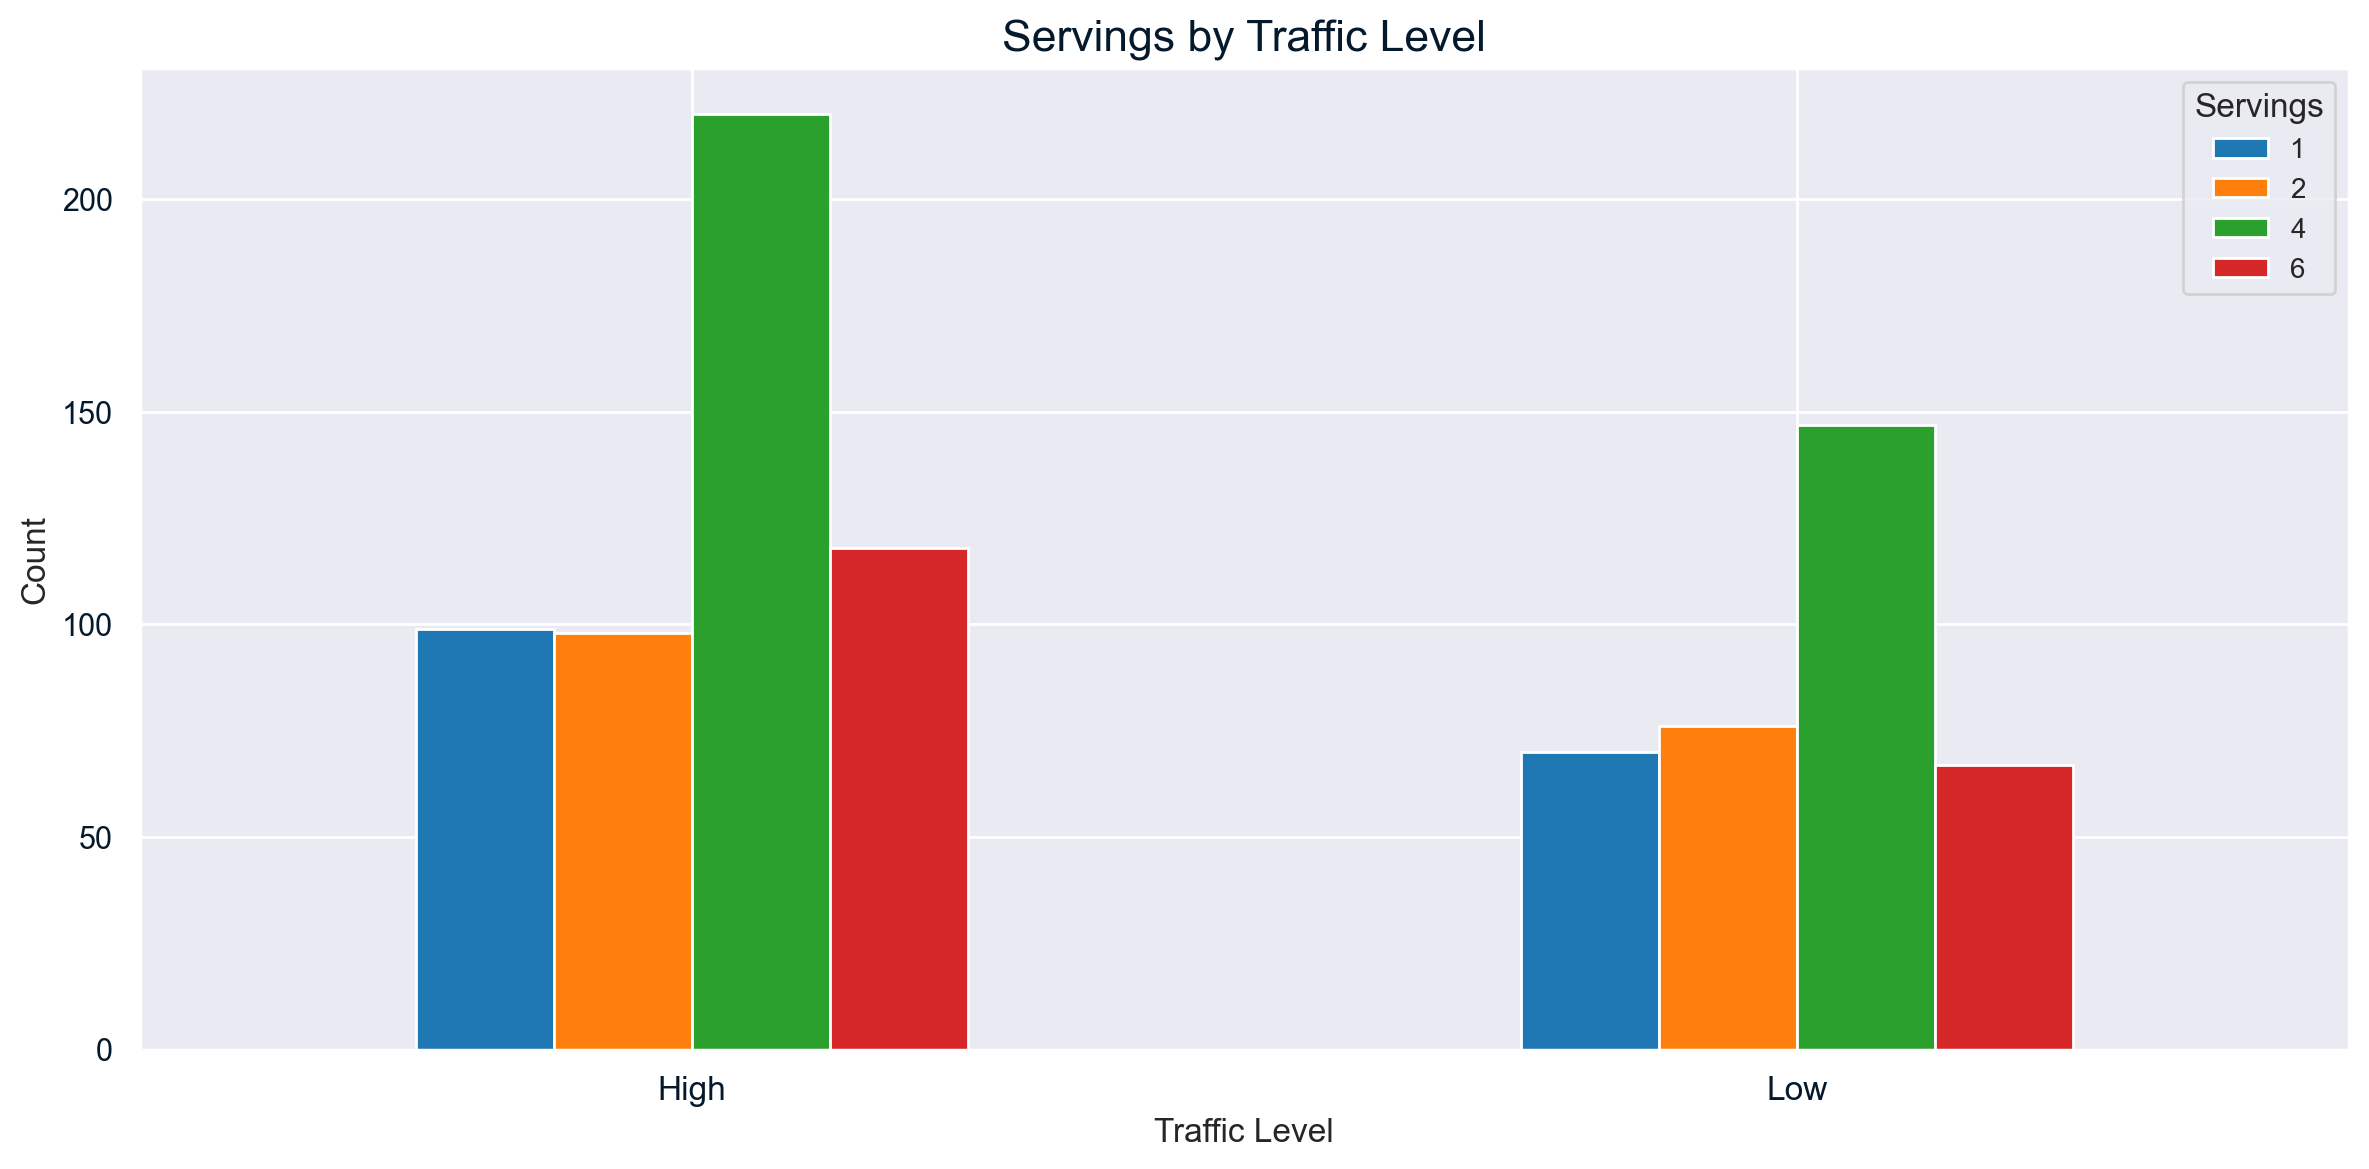

In [37]:
# Define four distinct colors for the servings.
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 

# Group servings by traffic level and plot a bar chart.
plt.figure(figsize=(12, 6))

# Group data by traffic_level and servings, then plot a bar chart.
servings_traffic = recipe_df.groupby(['traffic_level', 'servings']).size().unstack()

# Plot the bar chart with 4 colors corresponding to the servings.
servings_traffic.plot(kind='bar', stacked=False, figsize=(12, 6), color=colors)

plt.title("Servings by Traffic Level", fontsize=16)
plt.xlabel("Traffic Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Servings", fontsize=10)
plt.tight_layout()
plt.show()

The observations from the plot above show that the number of servings is consistently high across all servings, unlike the type of recipe, where the values vary.

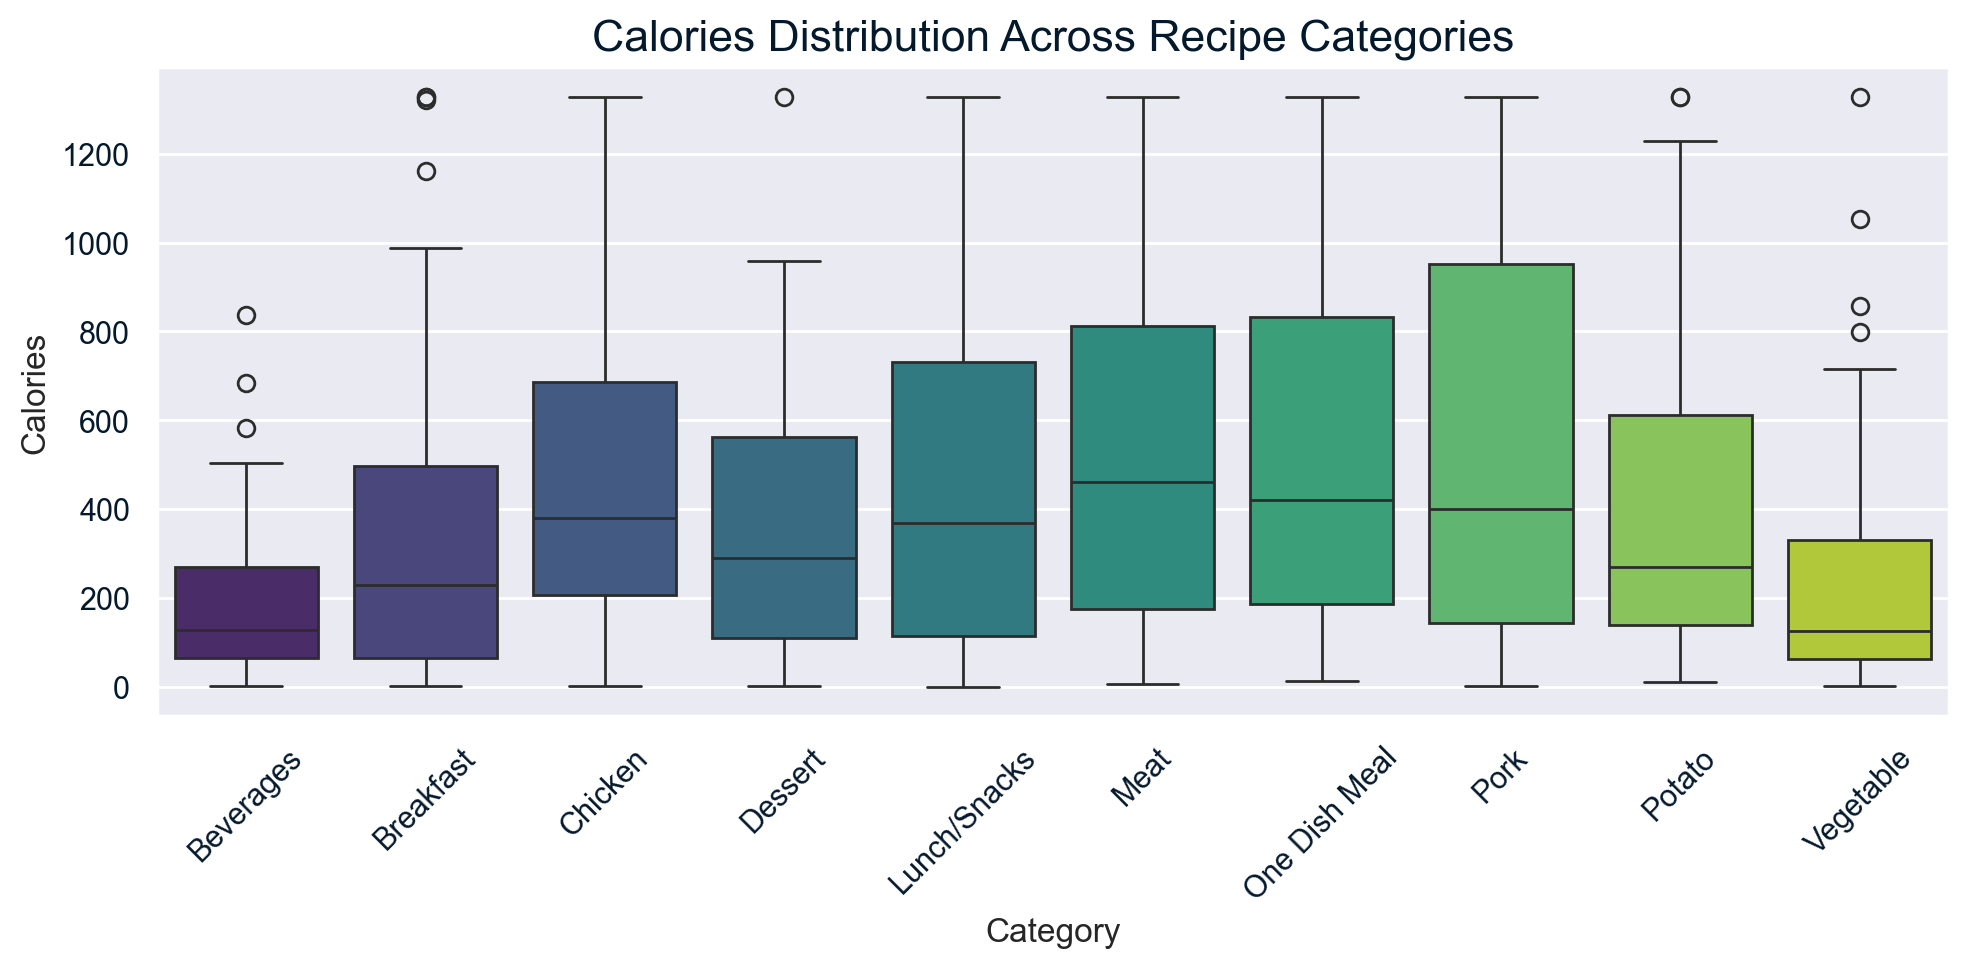

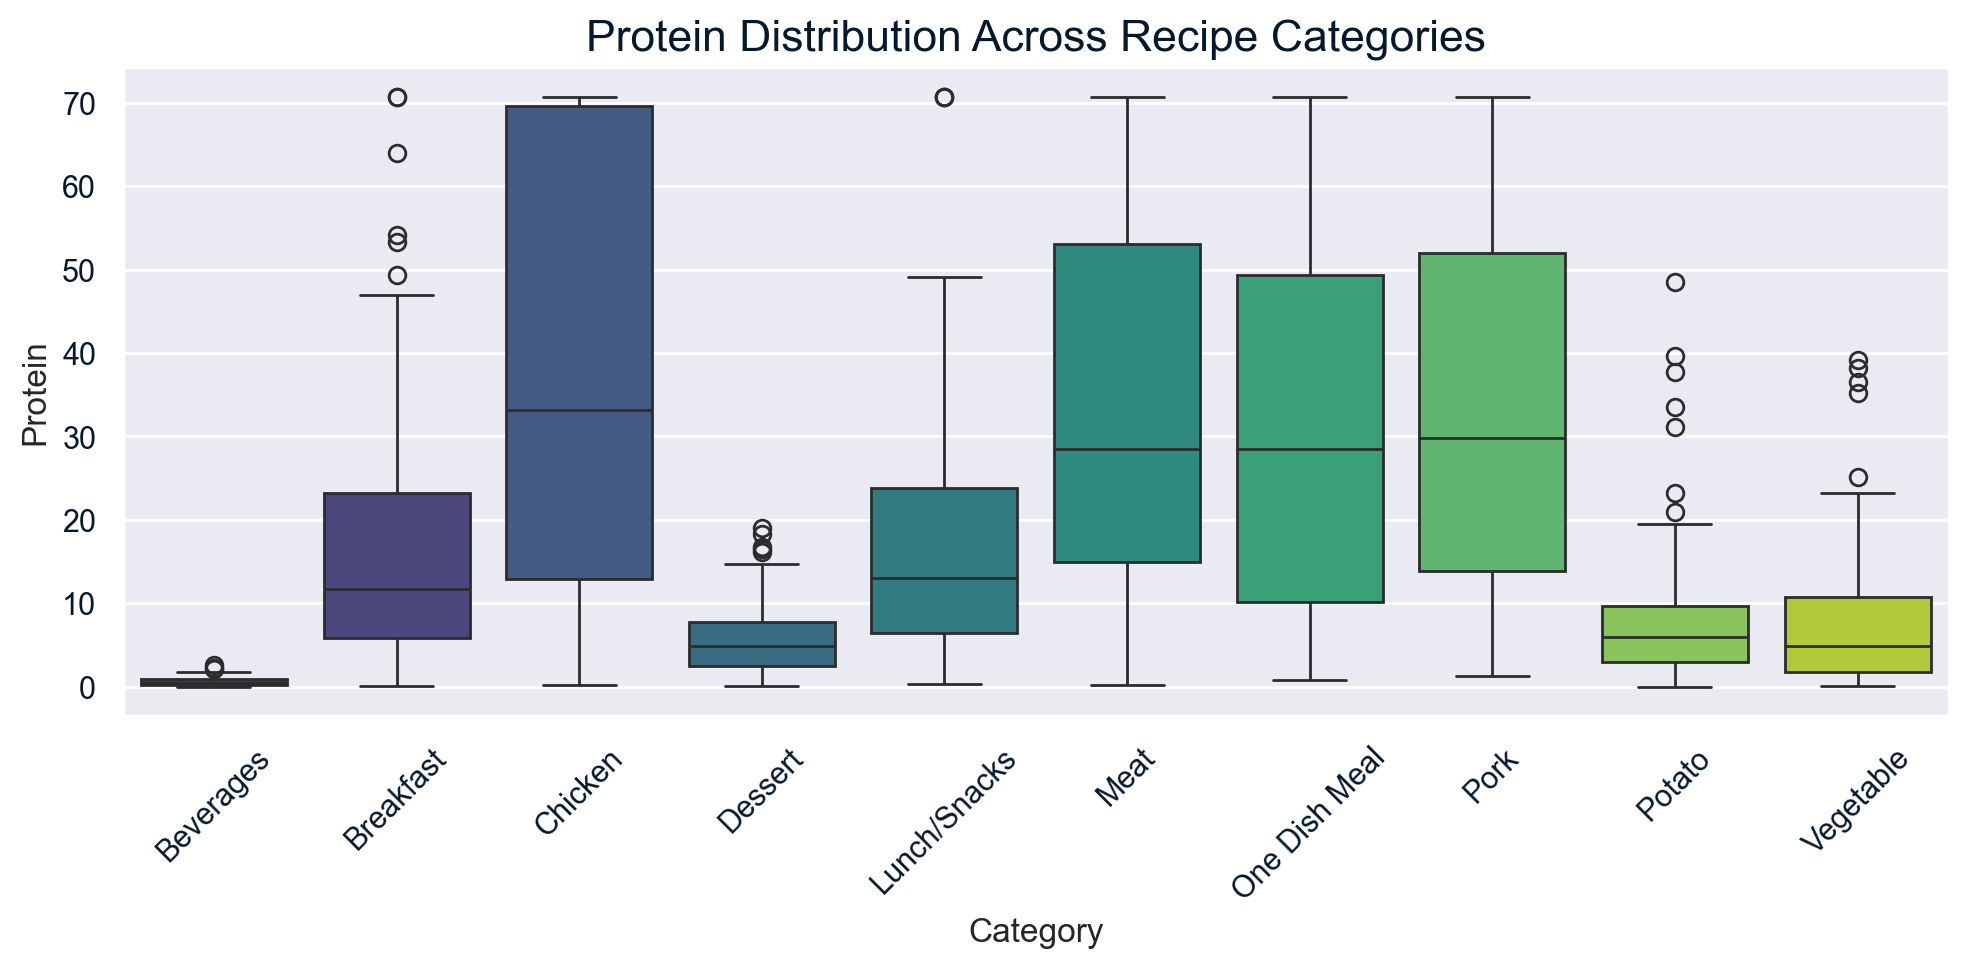

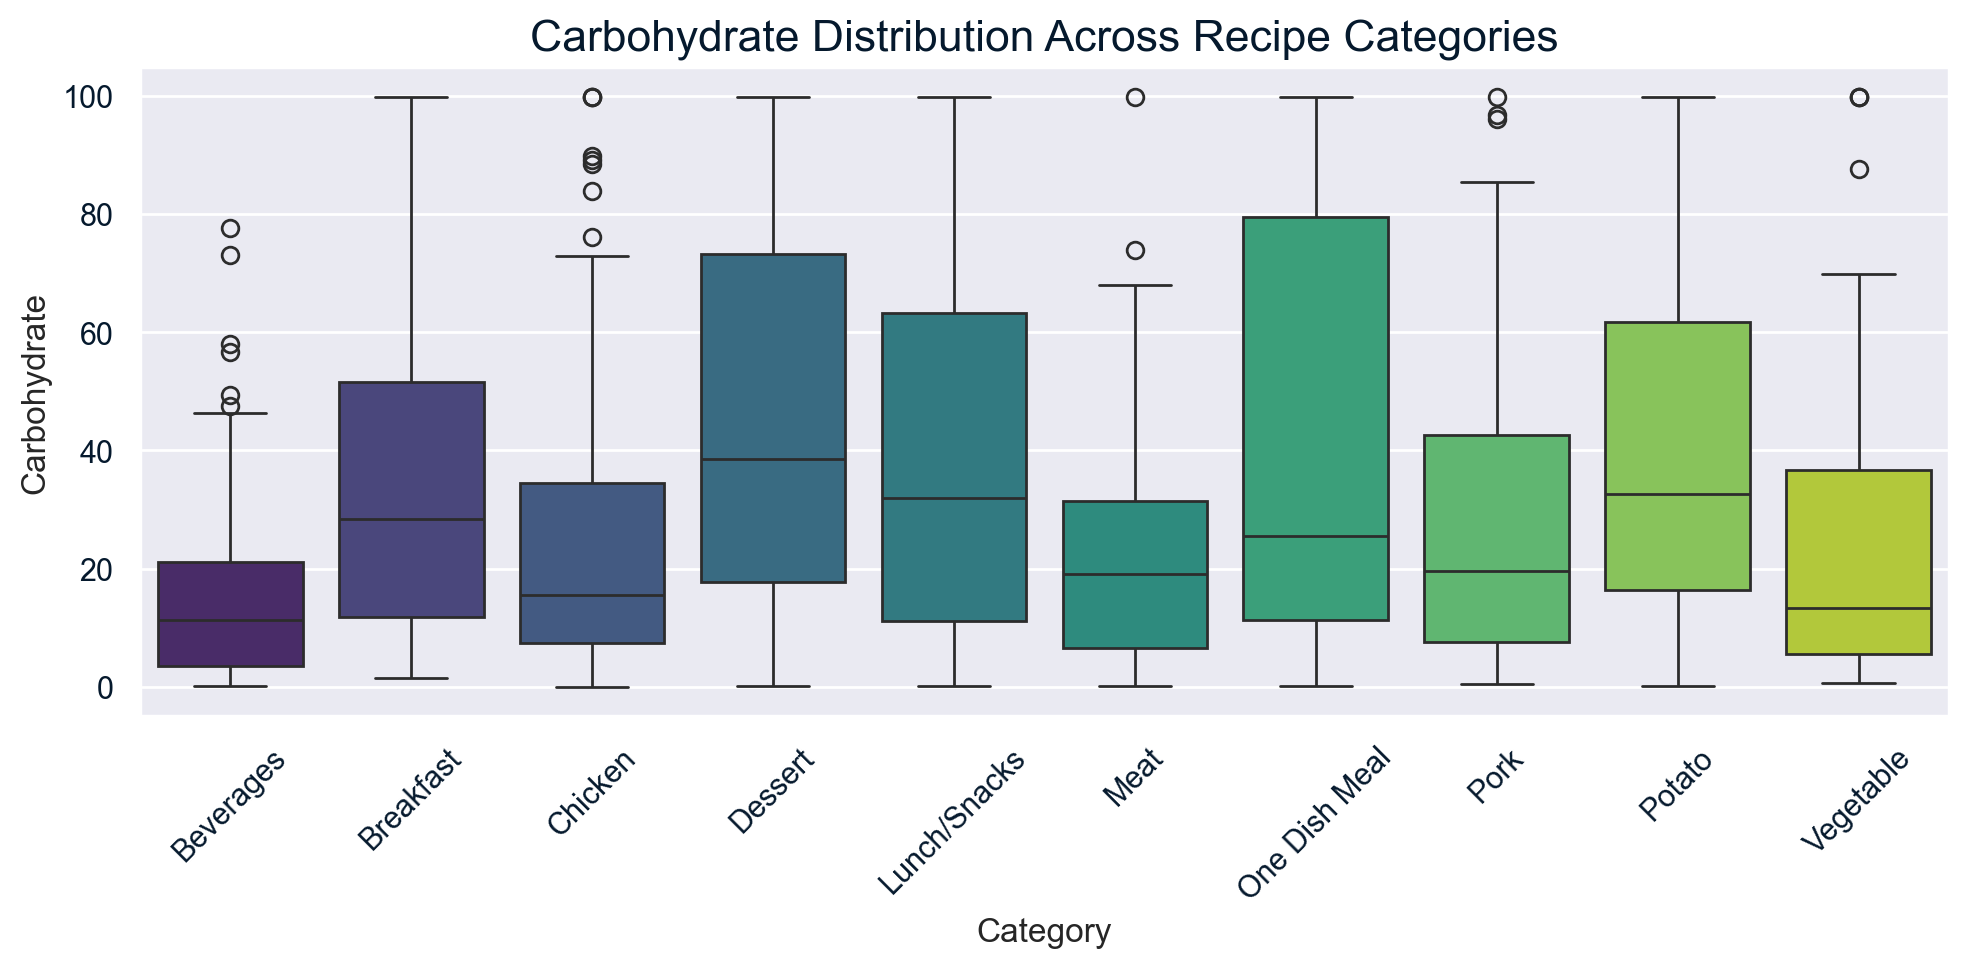

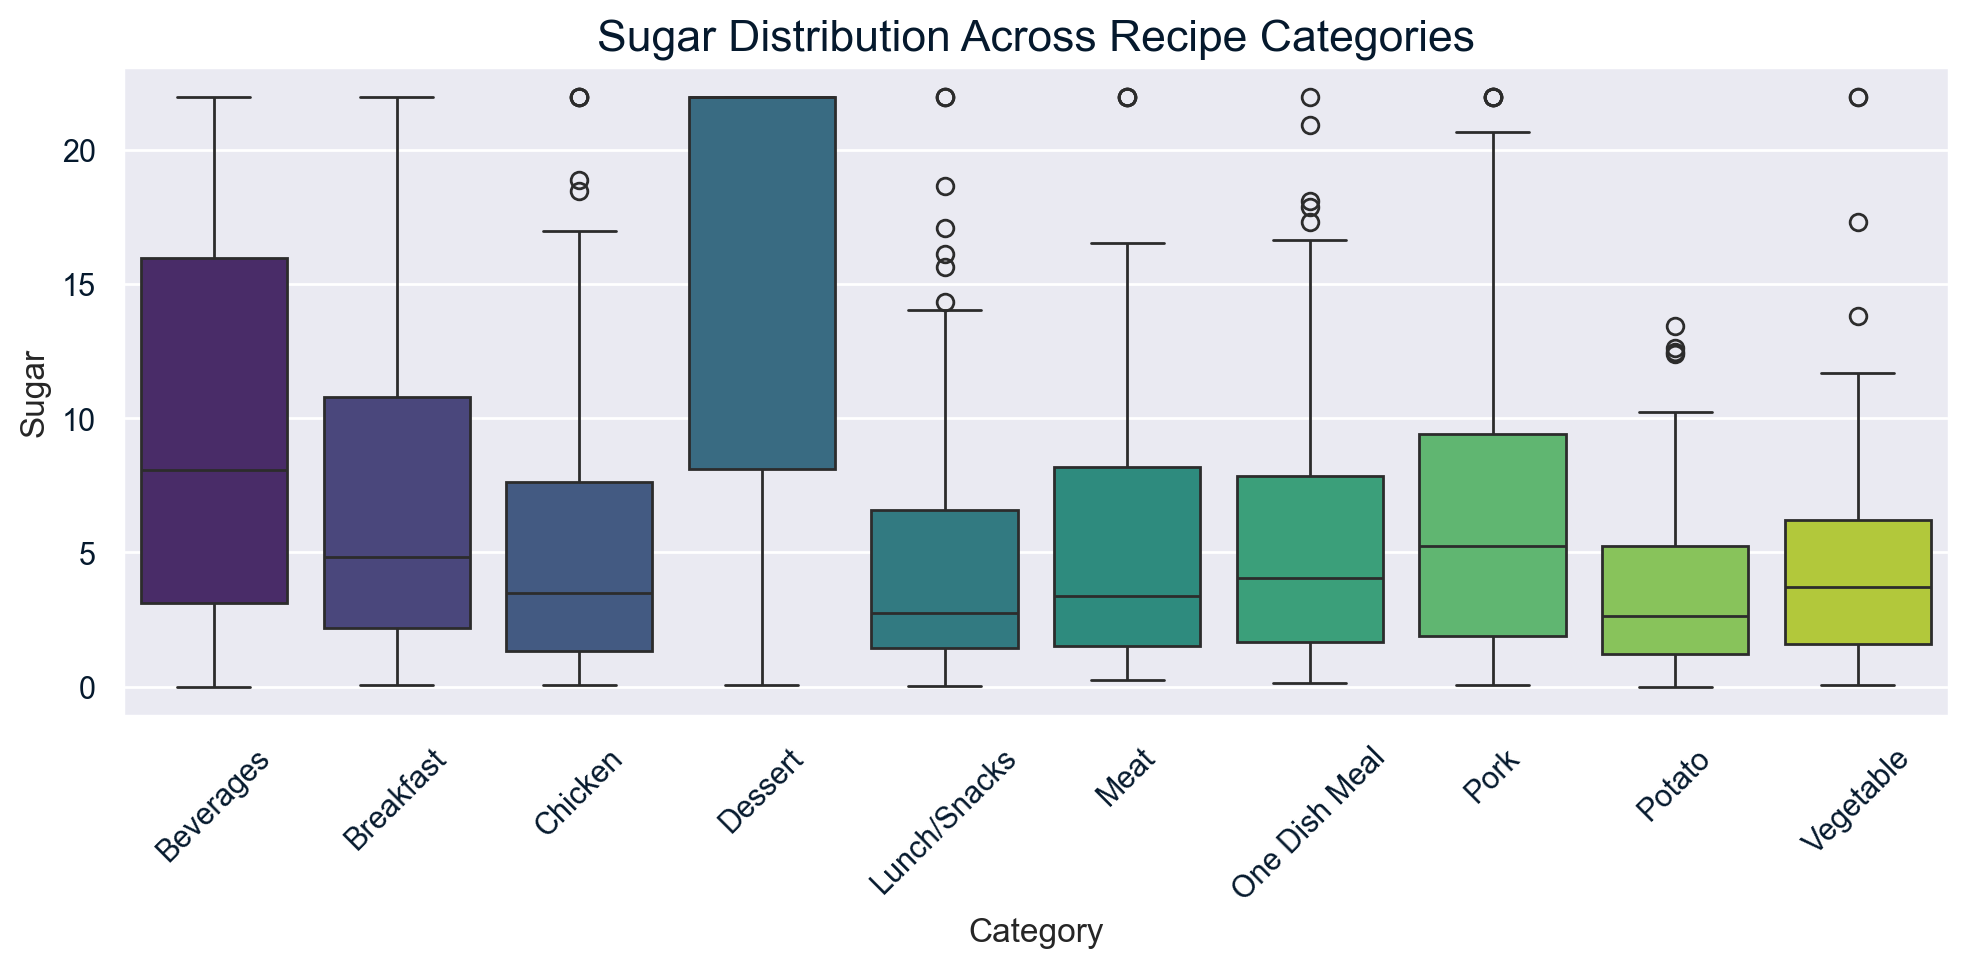

In [38]:
# Loop through the numerical columns and plot each one.
for column in numerical_columns:
    
    # Set the figure size.
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='category', y=column, data=recipe_df, palette='viridis')
    plt.title(f"{column.capitalize()} Distribution Across Recipe Categories", fontsize=16)
    plt.xlabel("Category", fontsize=12)
    plt.ylabel(column.capitalize(), fontsize=12)
    plt.xticks(rotation=45)
    
    # Display the plot.
    plt.tight_layout()
    plt.show()

The plots above show the distribution of calories, carbohydrates, protein, and sugar across all recipe categories. Recipes with higher content of carbohydrates, protein, sugar, and calories tend to exhibit higher distribution values in their respective categories.

# 4. Model Development

The objective of this analysis is to predict which recipes will result in high traffic, with the possible values for traffic level being either 'high' or 'low'. Since there are only two possible values, this is a binary classification task in machine learning.

This study aims to evaluate two machine learning (ML) algorithms: Logistic Regression and Random Forest. Logistic Regression is chosen as the baseline model due to its simplicity and interpretability, and it is well-suited for binary classification problems. The second ML algorithm considered is Random Forest, which excels at detecting, learning, and modeling complex, intricate, and non-linear patterns in data. We opt for Random Forest as a comparative approach, because it's an ensemble learning technique that combines the output of multiple decision trees to reach a single result.


After conducting exploratory data analysis (EDA), I observed discrepancies in the distribution of calories, carbohydrates, protein, and sugar across traffic levels. These features are expected to be important in predicting which recipes will result in high traffic. I also observed the differences in distribution of calories, carbohydrates, protein, and sugar across the categories or types of recipes.

#### Prepare the data for modeling

Data will be separated into features (X) and the target (y).


To prepare the data for modeling, the data will be split into training and testing sets. The training set will be used to train the model and learn patterns in predicting which recipes will result in high traffic, while the testing set will be used to evaluate the generalizability and predictive power of the trained model.

Then, feature scaling will be applied to the numerical columns to ensure they are on the same scale and contribute equally to the model's generalization power. Additionally, encoding will be applied to the categorical variables. The target or outcome variable (y) will also be encoded, with 0 representing low traffic and 1 representing high traffic.


#### Seperate the data into features and target 

In [39]:
# Save the cleaned DataFrame to a CSV file.
recipe_df.to_csv("cleaned_data.csv", index=False)

In [3]:
recipe_df = pd.read_csv("cleaned_data.csv")

recipe_df.head()

recipe  calories  carbohydrate  ...       category  servings traffic_level
0       2     35.48         38.56  ...         Potato         4          High
1       3    914.28         42.68  ...      Breakfast         1           Low
2       4     97.03         30.56  ...      Beverages         4          High
3       5     27.05          1.85  ...      Beverages         4           Low
4       6    691.15          3.46  ...  One Dish Meal         2          High

[5 rows x 8 columns]

In [13]:
# Seperate the data into features(X) and target(y).
# Define the feature variables (all columns except recipe and the target variable).
X = recipe_df.drop(columns=['recipe', 'traffic_level'])

# Define the target variable.
y = recipe_df['traffic_level']

# Encode target variable: low -> 0, high -> 1.
y = recipe_df['traffic_level'].map({'Low': 0, 'High': 1}) 

In [42]:
X.head()

calories  carbohydrate   sugar  protein       category  servings
0     35.48         38.56   0.660     0.92         Potato         4
1    914.28         42.68   3.090     2.88      Breakfast         1
2     97.03         30.56  21.965     0.02      Beverages         4
3     27.05          1.85   0.800     0.53      Beverages         4
4    691.15          3.46   1.650    53.93  One Dish Meal         2

#### Split the data

In [43]:
# Split data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
   X.values, y.values, test_size=0.15, random_state=42, stratify=y, shuffle=True 
)

#### Scale the numerical features and encode the categorical features 

In [44]:
# Ensure X_train and X_test are pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply the preprocessing on the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

#### Fit the data into the model.

In [45]:
# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=66, max_iter=1000, C=5)

# Train the Logistic Regression model
logreg.fit(X_train_preprocessed, y_train)

# Generate predictions
logreg_train_pred = logreg.predict(X_train_preprocessed)
logreg_test_pred = logreg.predict(X_test_preprocessed)

In [46]:
# Define the objective function for Optuna.
def objective(trial):
    
    # Hyperparameters to optimize.
    n_estimators = trial.suggest_int("n_estimators", 100, 200)
    max_depth = trial.suggest_int("max_depth", 4, 9)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_float("max_features", 0.5, 0.9)
    
    # Create the Random Forest model with the trial's parameters.
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    # Perform cross-validation.
    scores = cross_val_score(rf, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

# Create a study and optimize.
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150, timeout=600)

# Print the best parameters.
best_params = study.best_params
print("Best Parameters for Random Forest with Optuna:", best_params)

# Train the final model with the best parameters.
best_rf = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    random_state=40
)

# Fit the model on the training data.
best_rf.fit(X_train_preprocessed, y_train)

[I 2025-03-11 18:52:48,683] A new study created in memory with name: no-name-750f6769-bf8a-4555-bf7c-6f55ecf2ac03
[I 2025-03-11 18:52:50,113] Trial 0 finished with value: 0.7447368421052631 and parameters: {'n_estimators': 164, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 0.5150603436752582}. Best is trial 0 with value: 0.7447368421052631.
[I 2025-03-11 18:52:51,422] Trial 1 finished with value: 0.7421052631578948 and parameters: {'n_estimators': 152, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 0.5265020416185535}. Best is trial 0 with value: 0.7447368421052631.
[I 2025-03-11 18:52:52,472] Trial 2 finished with value: 0.7460526315789473 and parameters: {'n_estimators': 123, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 0.5462883927965704}. Best is trial 2 with value: 0.7460526315789473.
[I 2025-03-11 18:52:53,891] Trial 3 finished with value: 0.7486842105263157 and parameters: {'n_est

Best Parameters for Random Forest with Optuna: {'n_estimators': 186, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 0.8068734229601091}


RandomForestClassifier(max_depth=4, max_features=0.8068734229601091,
                       min_samples_leaf=8, n_estimators=186, random_state=40)

# 5. Evaluate the Model

Given the context of this problem, where the goal is to correctly predict which recipes will lead to high traffic with at least 80% accuracy for high-traffic recipes, the most relevant machine learning metrics are precision, recall, and F1 score.

- Precision measures the proportion of recipes predicted as "high traffic" that are actually "high traffic." This metric is essential because incorrectly predicting low-traffic recipes as high traffic could result in suboptimal homepage displays, lowering website performance.

- Recall measures the proportion of actual "high traffic" recipes that are correctly identified. The stakeholder wants to correctly predict high traffic recipes 80% of the time. Thus, recall is directly aligned with their goal.

- F1 Score balances precision and recall, which is important here since both false positives (predicting low traffic as high) and false negatives (failing to predict high traffic) can have business implications.



**Logistic Regression**

In [47]:
# Evaluate the model the logistic regression model.
print("\nLogistic Regression Training Confusion Matrix:")
print(confusion_matrix(y_train, logreg_train_pred))

print("\nLogistic Regression Training Classification Report:")
print(classification_report(y_train, logreg_train_pred))


print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logreg_test_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_test_pred))


Logistic Regression Training Confusion Matrix:
[[212  94]
 [ 89 365]]

Logistic Regression Training Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       306
           1       0.80      0.80      0.80       454

    accuracy                           0.76       760
   macro avg       0.75      0.75      0.75       760
weighted avg       0.76      0.76      0.76       760


Logistic Regression Confusion Matrix:
[[42 12]
 [18 63]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        54
           1       0.84      0.78      0.81        81

    accuracy                           0.78       135
   macro avg       0.77      0.78      0.77       135
weighted avg       0.78      0.78      0.78       135



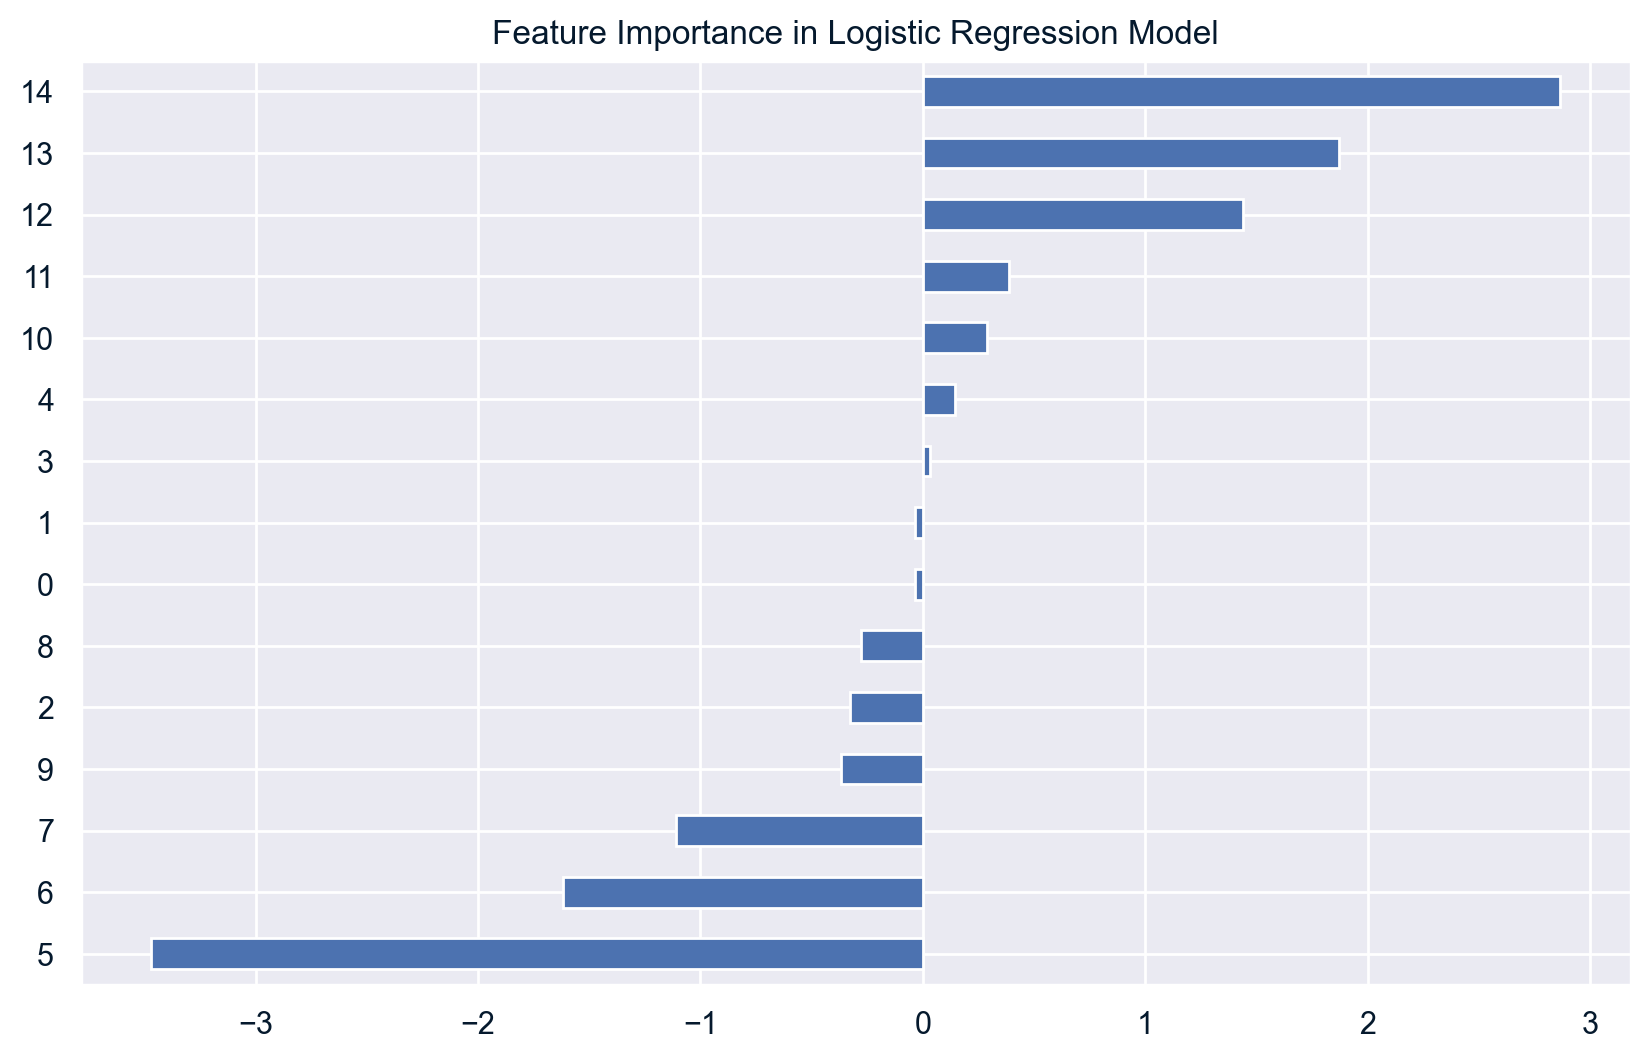

In [48]:
# Feature Importance
importances = pd.Series(logreg.coef_[0])
sorted_importances=importances.sort_values()
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

**Random Forest**

In [49]:
# Generate predictions
train_preds = best_rf.predict(X_train_preprocessed)
test_preds = best_rf.predict(X_test_preprocessed)

# Evaluate the model
print("\nTuned Random Forest Training Confusion Matrix:")
print(confusion_matrix(y_train, train_preds))

print("\nTuned Random Forest Training Classification Report:")
print(classification_report(y_train, train_preds))

print("\nTuned Random Forest Test Confusion Matrix:")
print(confusion_matrix(y_test, test_preds))

print("\nTuned Random Forest Test Classification Report:")
print(classification_report(y_test, test_preds))


Tuned Random Forest Training Confusion Matrix:
[[209  97]
 [ 78 376]]

Tuned Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       306
           1       0.79      0.83      0.81       454

    accuracy                           0.77       760
   macro avg       0.76      0.76      0.76       760
weighted avg       0.77      0.77      0.77       760


Tuned Random Forest Test Confusion Matrix:
[[41 13]
 [18 63]]

Tuned Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.73        54
           1       0.83      0.78      0.80        81

    accuracy                           0.77       135
   macro avg       0.76      0.77      0.76       135
weighted avg       0.78      0.77      0.77       135



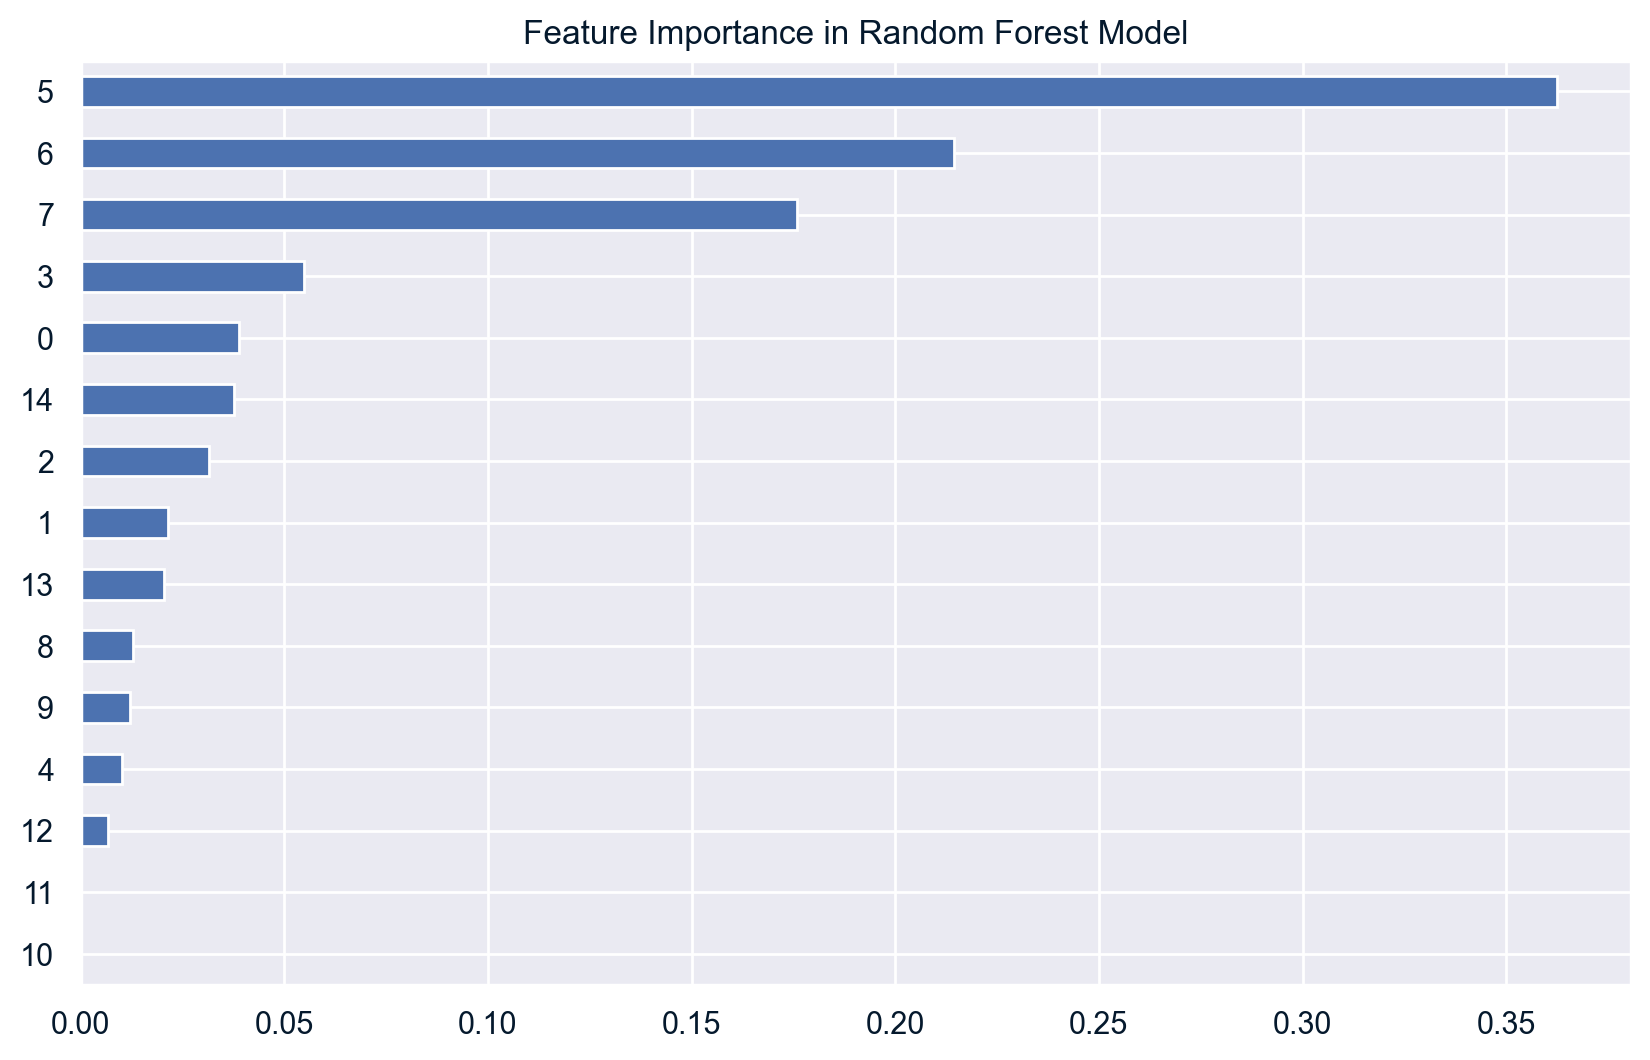

In [50]:
# Feature Importance
importances = pd.Series(best_rf.feature_importances_)
sorted_importances=importances.sort_values()
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Random Forest Model')
plt.show()

**Generate Prediction and Evaluate the Model**

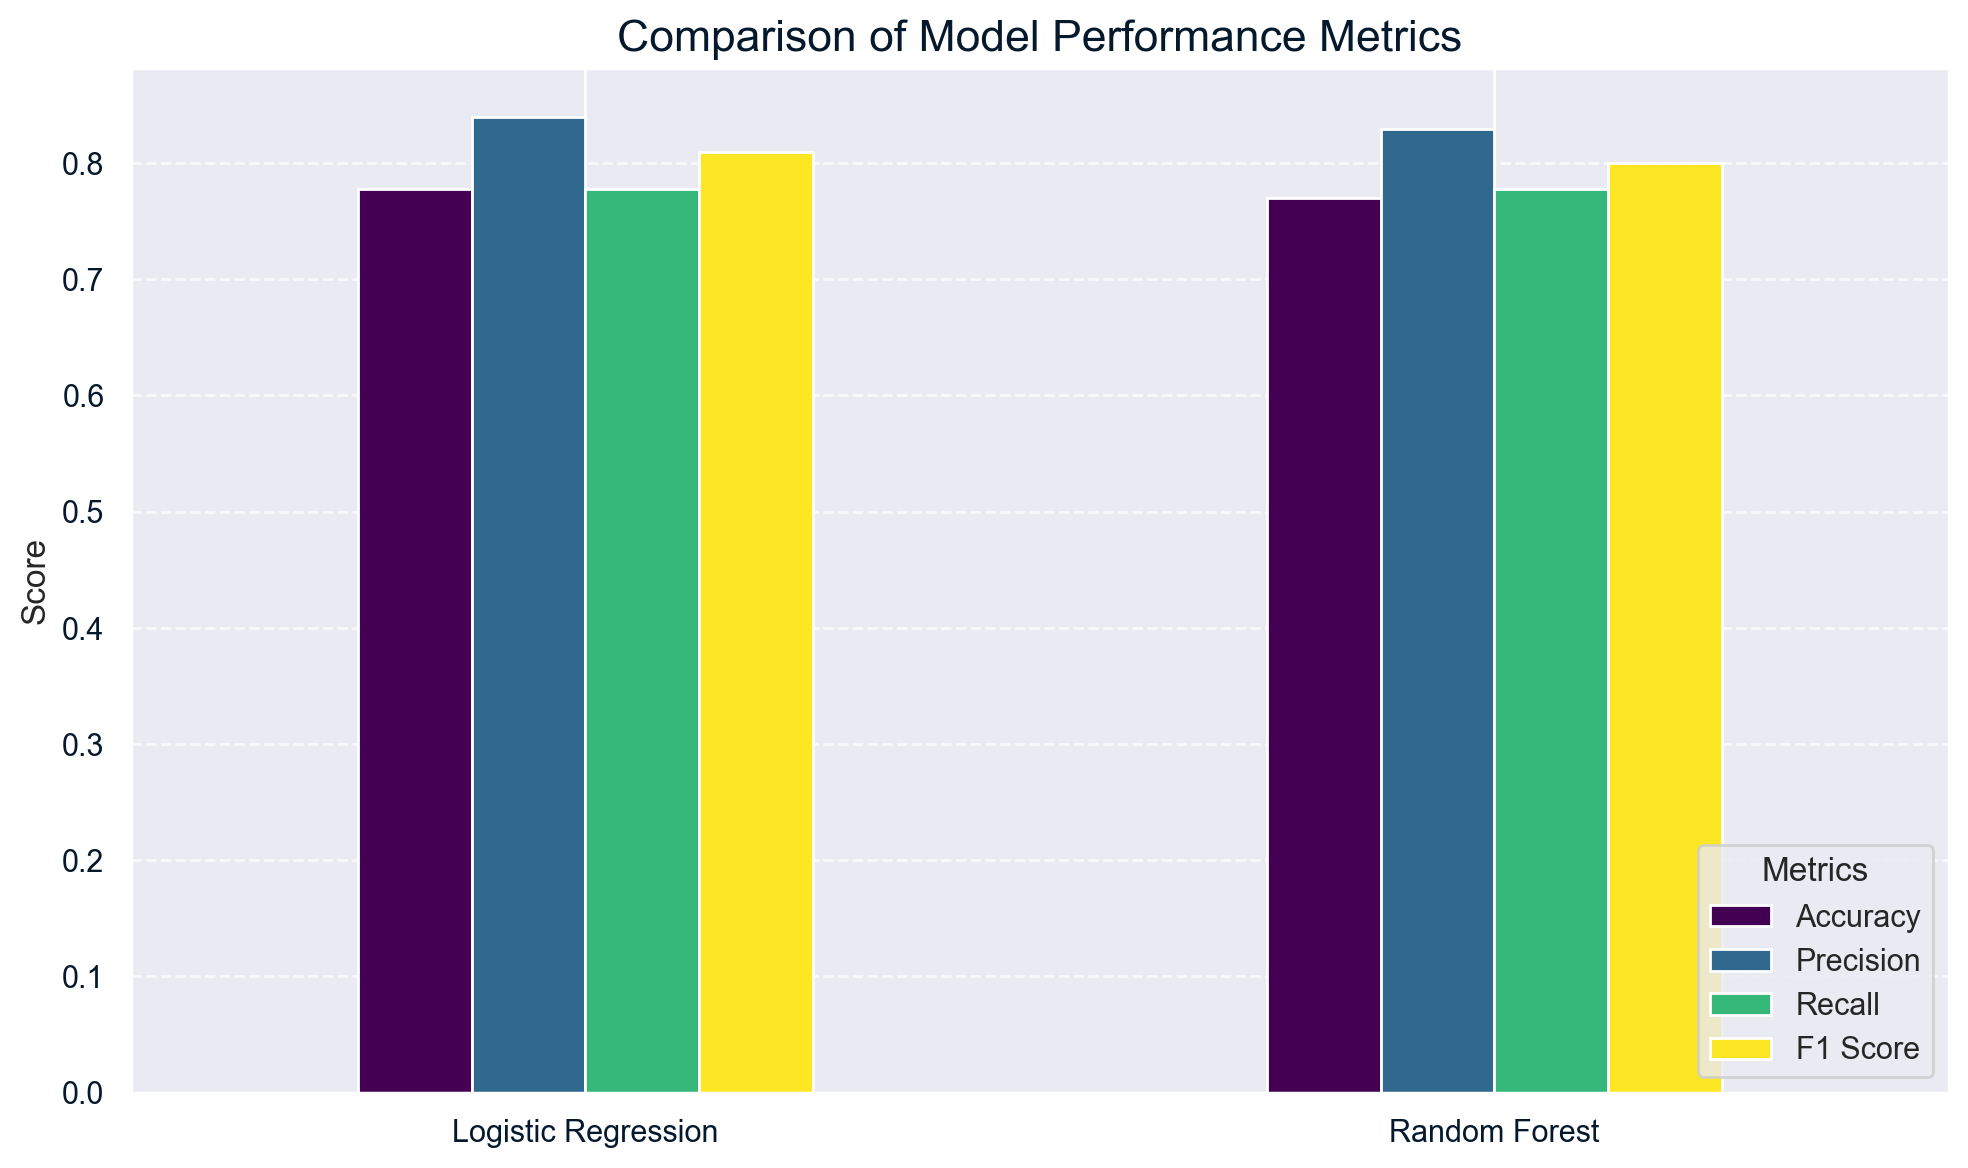

In [51]:
# Generate predictions for Logistic Regression.
logreg_train_pred = logreg.predict(X_train_preprocessed)
logreg_test_pred = logreg.predict(X_test_preprocessed)

# Generate predictions for Random Forest.
rf_train_pred = best_rf.predict(X_train_preprocessed)
rf_test_pred = best_rf.predict(X_test_preprocessed)

# Compute metrics for Logistic Regression.
logreg_metrics = {
    "Accuracy": accuracy_score(y_test, logreg_test_pred),
    "Precision": precision_score(y_test, logreg_test_pred),
    "Recall": recall_score(y_test, logreg_test_pred),
    "F1 Score": 0.81
}

# Compute metrics for Random Forest.
rf_metrics = {
    "Accuracy": accuracy_score(y_test, rf_test_pred),
    "Precision": precision_score(y_test, rf_test_pred),
    "Recall": recall_score(y_test, rf_test_pred),
    "F1 Score": 0.80
}

# Store results in a DataFrame.
metrics_df = pd.DataFrame({
    "Logistic Regression": logreg_metrics,
    "Random Forest": rf_metrics
}).T

# Plot the results as a bar chart.
metrics_df.plot(kind="bar", figsize=(10, 6), colormap='viridis')
plt.title("Comparison of Model Performance Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Metrics", loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Results**

The Logistic Regression performs slightly better overall, with higher accuracy, better recall for high-traffic recipes, and improved F1-scores for both classes than the Tuned Random Forest. It would be the preferred model for this task because of its robust performance and simplicity.

In [27]:
# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=66, max_iter=1000, C=5)


class TastyModel:

    def __init__(self, model=None):
        """
        Initialize the TastyModel.

        This method initializes the TastyModel class with the following attributes:
        - model: The machine learning model to be used for predictions. If no model is provided, 
                 a placeholder message is set indicating that a classifier is needed.
        - preprocessor: A ColumnTransformer object that will be set during the preprocessing step.
        - metrics: A dictionary to store evaluation metrics for the model.

        Args:
            model (optional): A scikit-learn classifier instance. Defaults to None.

        Example:
            >>> from sklearn.ensemble import RandomForestClassifier
            >>> model = RandomForestClassifier()
            >>> tasty_model = TastyModel(model=model)
        """

        # if model is None:
        #     raise ValueError("A scikit-learn classifier model must be provided!")
        
        self.model = model
        self.preprocessor = None  # This will be set during preprocessing!
        self.metrics = {}

        
    def preprocess(self, df: pd.DataFrame, cols_to_drop: List, target_column: str, test_size: int, cv: bool):
        """Apply preprocessing steps to the input DataFrame.
        
        This method performs the following steps:
        1. Drops specified columns from the DataFrame.
        2. Encodes the target column with binary values (Low -> 0, High -> 1).
        3. Splits the data into training and testing sets with stratification.
        4. Identifies numerical and categorical features.
        5. Applies MinMax scaling to numerical features.
        6. Applies OneHot encoding to categorical features.

        Args:
            df (pd.DataFrame): The input DataFrame containing the data to be preprocessed.
            cols_to_drop (List): A list of column names to be dropped from the DataFrame.
            target_column (str): The name of the target column to be encoded and predicted.
            test_size (int): The proportion of the dataset to include in the test split.

        Returns:
            Tuple: A tuple containing the preprocessed training features, training labels,
                preprocessed testing features, and testing labels.
        """
      
        self.target_column = target_column
        X = df.drop(columns=cols_to_drop, axis=1)
        y = df[self.target_column]

        # Encode target variable: low -> 0, high -> 1.
        y = df[self.target_column].map({'Low': 0, 'High': 1}) 

        if cv:
            
            # Ensure X is in pandas DataFrames.
            X = pd.DataFrame(X, columns=X.columns)
    
            # Identify numerical and categorical features.
            numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
            categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()
    
            # Define the ColumnTransformer for preprocessing.
            self.preprocessor = ColumnTransformer(
                transformers=[
                    ('num', MinMaxScaler(), numerical_features),
                    ('cat', OneHotEncoder(), categorical_features)
                    ]
                    )
            
            # Apply the preprocessing on the training and test data.
            X_preprocessed = self.preprocessor.fit_transform(X)

            return X_preprocessed, y

        else:
            # Split data into train and test sets.
            X_train, X_test, y_train, y_test = train_test_split(
                X.values, y.values, test_size=test_size, random_state=42, stratify=y, shuffle=True)
            
            # Ensure X_train and X_test are pandas DataFrames.
            X_train = pd.DataFrame(X_train, columns=X.columns)
            X_test = pd.DataFrame(X_test, columns=X.columns)
    
            # Identify numerical and categorical features.
            numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
            categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()
    
            # Define the ColumnTransformer for preprocessing.
            self.preprocessor = ColumnTransformer(
                transformers=[
                    ('num', MinMaxScaler(), numerical_features),
                    ('cat', OneHotEncoder(), categorical_features)
                    ]
                    )
            
            # Apply the preprocessing on the training and test data.
            X_train_preprocessed = self.preprocessor.fit_transform(X_train)
            X_test_preprocessed = self.preprocessor.transform(X_test)

            return X_train_preprocessed, y_train, X_test_preprocessed, y_test 

    
    def train(self, df: pd.DataFrame, cols_to_drop: List, target_column: str, test_size: int = 0.15):
        """Train the model using the provided DataFrame.

        This method performs the following steps:
        1. Preprocesses the input DataFrame.
        2. Fits the model on the preprocessed training data.
        3. Predicts the labels for both training and testing data.
        4. Calculates and stores evaluation metrics for both training and testing data.

        Args:
            df (pd.DataFrame): The input DataFrame containing the data to be used for training.
            cols_to_drop (List): A list of column names to be dropped from the DataFrame.
            target_column (str): The name of the target column to be predicted.
            test_size (int, optional): The proportion of the dataset to include in the test split. Defaults to 0.15.

        Returns:
            None
        """
        
        # Retrieve the preprocessed data.
        X_train, y_train, X_test, y_test = self.preprocess(df, cols_to_drop, target_column, test_size, cv=False)

        # Fit the model on the training data.
        self.model.fit(X_train, y_train)

        # Predict the labels for the training and testing data.
        train_pred = self.model.predict(X_train)
        test_pred = self.model.predict(X_test)

        # Store training evaluation metrics.
        self.metrics.update({
            "train_accuracy": accuracy_score(y_train, train_pred),
            "train_precision": precision_score(y_train, train_pred),
            "train_recall": recall_score(y_train, train_pred),
            "train_f1_score": f1_score(y_train, train_pred)
        })

        # Store testing evaluation metrics.
        self.metrics.update({
            "test_accuracy": accuracy_score(y_test, test_pred),
            "test_precision": precision_score(y_test, test_pred),
            "test_recall": recall_score(y_test, test_pred),
            "test_f1_score": f1_score(y_test, test_pred)
            })

        # Print the testing accuracy.
        print(f"Model Trained - Accuracy: {self.metrics['test_accuracy']:.4f} ")


    def evaluate(self):
        """
        Print evaluation metrics.
        This method prints the evaluation metrics stored in the `self.metrics` dictionary.
        If no metrics are available, it prompts the user to train or load a model first.

        Returns:
            None
        """
        
        if self.metrics:
            print("Model Performance Metrics!")

            for metric, value in self.metrics.items():
                print(f"{metric.capitalize()}: {value:.4f}")

        else:
            print("No trained model found. Please train or load a model first!")


    def cross_validate(self, df: pd.DataFrame, cols_to_drop: List, target_column: str,  cv: int = 5):
        """
        Perform cross-validation on the model.

        This method performs the following steps:
        1. Preprocesses the input DataFrame.
        2. Performs cross-validation on the preprocessed training data.
        3. Prints the cross-validation scores and their mean.

        Args:
            df (pd.DataFrame): The input DataFrame containing the data to be used for cross-validation.
            cols_to_drop (List): A list of column names to be dropped from the DataFrame.
            target_column (str): The name of the target column to be predicted.
            cv (int, optional): The number of cross-validation folds. Defaults to 5.

        Returns:
            None
        """

        # Retrieve the preprocessed data.
        X, y = self.preprocess(df, cols_to_drop, target_column, test_size=1, cv=True)

        # Perform cross-validation.
        scores = cross_val_score(self.model, X, y, cv=cv)

        # Print cross-validation scores.
        print(f"Cross-validation scores: {scores}")
        print(f"Mean cross-validation score: {np.mean(scores):.4f}")


    def feature_importance(self, ):
        """
        Show feature importance (for tree-based models).

        This method displays a bar chart of feature importances if the model has the attribute `feature_importances_`.
        If the model does not support feature importances, it prints a message indicating that feature importance
        is not available for this model.

        Returns:
            None
        """
        
        if hasattr(self.model, "feature_importances_"):
            importance = self.model.feature_importances_

            # Get feature names from the ColumnTransformer.
            feature_names = []
            for name, transformer, columns in self.preprocessor.transformers_:
                if name == 'num':
                    feature_names.extend(columns)

                elif name == 'cat':
                    # Get the names of the one-hot encoded features.
                    encoder = transformer
                    encoded_feature_names = encoder.get_feature_names_out(columns)
                    feature_names.extend(encoded_feature_names)

            plt.figure(figsize=(10, 5))
            plt.barh(range(len(importance)), importance)
            plt.xlabel("Feature Importance")
            plt.ylabel("Feature Index")
            plt.title("Feature Importance")
            plt.show()

        else:
            print("Feature importance not available for this model!")


    def save_model(self, filename: Union[Path, str]):
        """
        Save the trained model.

        This method saves the trained model to the specified file using joblib.

        Args:
            filename (Union[Path, str]): The file path where the model should be saved.

        Returns:
            None
        """
        
        if self.model and self.preprocessor:

            # Save both the model and the preprocessor as a dictionary.
            joblib.dump({'model': self.model, 'preprocessor': self.preprocessor}, filename)
            print(f"Model and preprocessor saved to {filename}")
    
        else:
            print("Model and/or preprocessor not found. Ensure both are set before saving.")


    def load_model(self, filename: Union[Path, str]):
        """
        Load a saved model.

        This method loads a trained model from the specified file using joblib.

        Args:
            filename (Union[Path, str]): The file path from where the model should be loaded.

        Returns:
            None
        """

        try:

            # Load the dictionary containing the model and preprocessor.
            loaded_data = joblib.load(filename)
            self.model = loaded_data['model']
            self.preprocessor = loaded_data['preprocessor']
            print(f"Model and preprocessor loaded successfully from {filename}")

        except FileNotFoundError:
            print(f"File not found: {filename}")
        
        except KeyError:
            print("The loaded file does not contain both model and preprocessor.")

        except Exception as e:
            print(f"An error occurred while loading the model: {e}")


    def predict_traffic_increase(self, calories: float, carbohydrate: float, sugar: float, 
                                 protein: float, category: str, servings: int) -> Tuple[str, float]:
        """
        Predict the potential increase in website traffic based on recipe features.
        
        This method preprocesses the input data and uses the trained model to predict the traffic category.

        Args:
            calories (float): The number of calories in the recipe.
            carbohydrate (float): The amount of carbohydrates in the recipe.
            sugar (float): The amount of sugar in the recipe.
            protein (float): The amount of protein in the recipe.
            category (str): The category of the recipe.
            servings (int): The number of servings the recipe makes.

        Returns:
            Tuple[str, float]: A tuple containing the predicted traffic category 
                            ('High Traffic' or 'Low Traffic') and the confidence score.
        """

        if self.model is None or self.preprocessor is None:
            raise ValueError("Model must be trained and preprocessor must be set before making predictions.")

        # Create a DataFrame from the input data.
        input_data = pd.DataFrame({
            'calories': [calories],
            'carbohydrate': [carbohydrate],
            'sugar': [sugar],
            'protein': [protein],
            'category': [category],
            'servings': [servings]
        })

        # Apply the preprocessing to the input data.
        input_data_preprocessed = self.preprocessor.transform(input_data)

        # Make predictions.
        prediction = self.model.predict(input_data_preprocessed)[0]
        prediction_probability = self.model.predict_proba(input_data_preprocessed)[0, 1]

        # Categorize the traffic impact.
        traffic_category = "High Traffic" if prediction == 1 else "Low Traffic"

        if traffic_category == "High Traffic":

            return traffic_category, prediction_probability
        
        elif traffic_category == "Low Traffic":
            prediction_probability = 1 - prediction_probability

            return traffic_category, prediction_probability
        

In [28]:
tasty_model = TastyModel(model=logreg)

tasty_model.train(df=recipe_df, cols_to_drop=['recipe', 'traffic_level'], target_column="traffic_level", test_size=0.15)

tasty_model.evaluate()

Model Trained - Accuracy: 0.7778 
Model Performance Metrics!
Train_accuracy: 0.7592
Train_precision: 0.7952
Train_recall: 0.8040
Train_f1_score: 0.7996
Test_accuracy: 0.7778
Test_precision: 0.8400
Test_recall: 0.7778
Test_f1_score: 0.8077


In [29]:
tasty_model.cross_validate(df=recipe_df, cols_to_drop=['recipe', 'traffic_level'], target_column='traffic_level')

Cross-validation scores: [0.73743017 0.72067039 0.77094972 0.80446927 0.77653631]
Mean cross-validation score: 0.7620


Model Trained - Accuracy: 0.7704 
Model Performance Metrics!
Train_accuracy: 0.7697
Train_precision: 0.7949
Train_recall: 0.8282
Train_f1_score: 0.8112
Test_accuracy: 0.7704
Test_precision: 0.8289
Test_recall: 0.7778
Test_f1_score: 0.8025



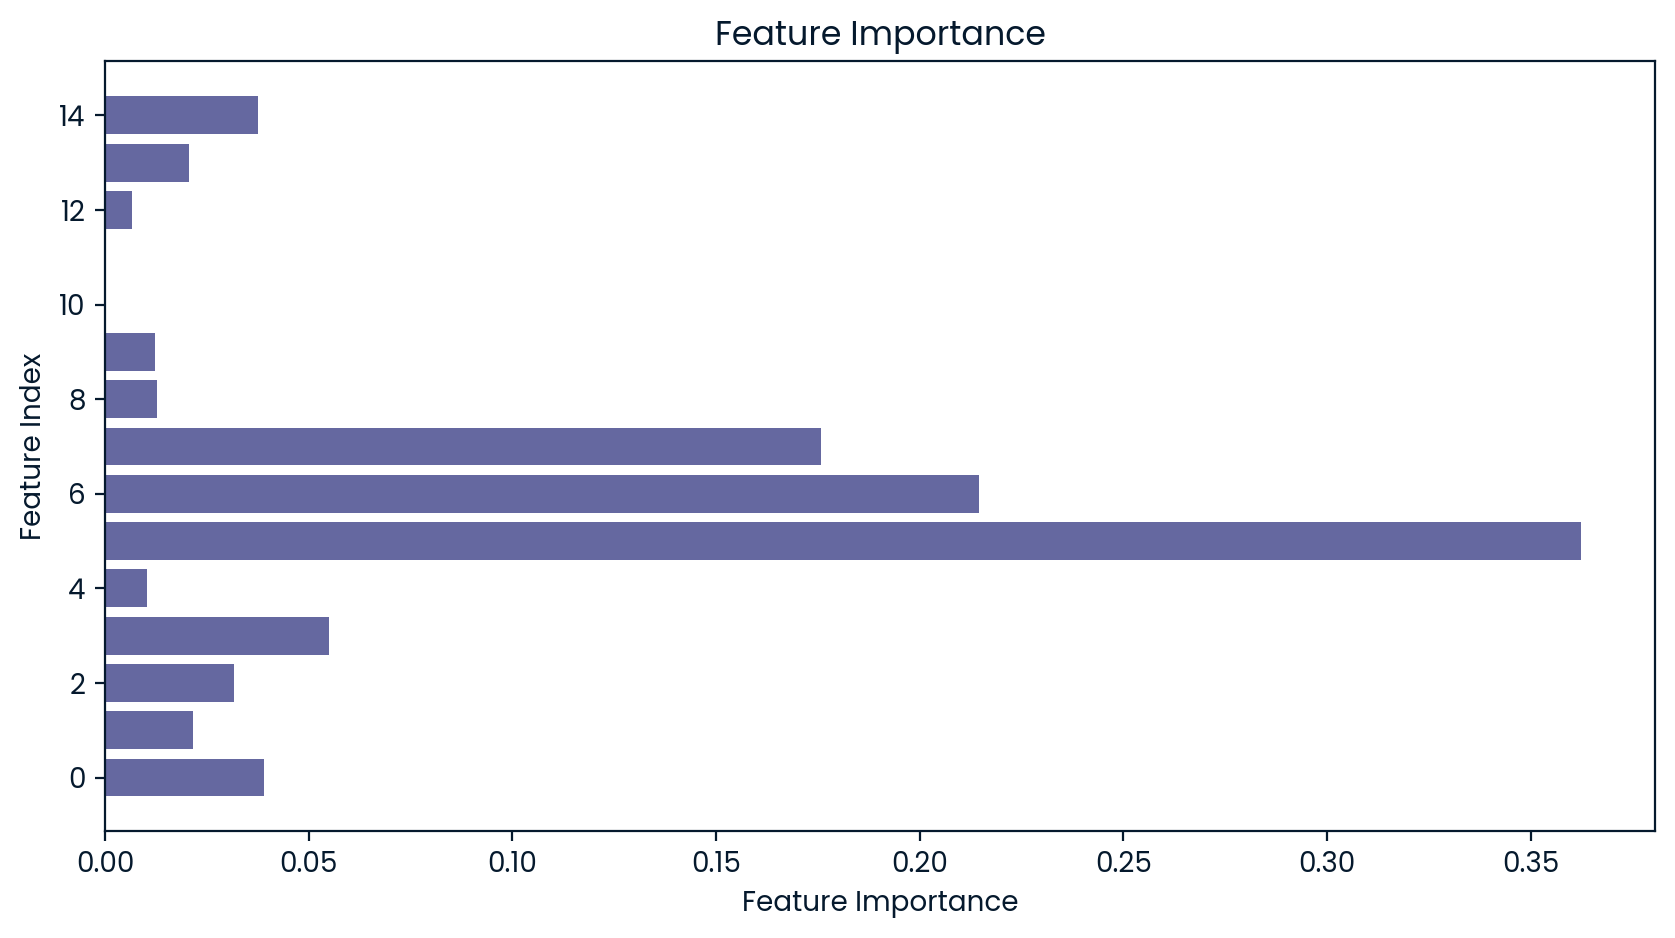

In [30]:
rf = RandomForestClassifier(max_depth=4, max_features=0.8068734229601091,
                       min_samples_leaf=8, n_estimators=186, random_state=40)


tasty_model1 = TastyModel(model=rf)

tasty_model1.train(df=recipe_df, cols_to_drop=['recipe', 'traffic_level'], target_column="traffic_level", test_size=0.15)

tasty_model1.evaluate()
print()

tasty_model1.feature_importance()

In [31]:
tasty_model1.cross_validate(df=recipe_df, cols_to_drop=['recipe', 'traffic_level'], target_column='traffic_level')

Cross-validation scores: [0.72067039 0.72067039 0.76536313 0.79329609 0.75977654]
Mean cross-validation score: 0.7520


#### Save the Model

In [32]:
tasty_model.save_model(filename="tasty_model1")
tasty_model1.save_model(filename="tasty_model2")

Model and preprocessor saved to tasty_model1
Model and preprocessor saved to tasty_model2


#### Load the Model for Inference.

In [33]:
# Initialize Logistic Regression model.
tasty = TastyModel()

# Load the saved model.
tasty.load_model(filename="tasty_model1")

Model and preprocessor loaded successfully from tasty_model1


In [34]:
tasty.predict_traffic_increase(35.48, 38.56,0.66,0.92,"Potato",4,)

('High Traffic', 0.9410071434949491)

In [35]:
tasty.predict_traffic_increase(248.28,48.54,3.99,70.70750000000001,"Chicken",2,)

('Low Traffic', 0.5734000915884174)

# 6. Business Focus & Metrics

The business objective is to develop a machine learning model capable of predicting which recipes will generate high traffic on the website homepage, ultimately driving a significant increase in subscriptions.

The goals of this project are:

1. To predict which recipes will result in high traffic.
2. To achieve at least 80% accuracy in correctly identifying recipes that lead to high traffic.

### Business Metric

In [53]:
total_samples = 895
high_traffic = 535 
low_traffic = total_samples - high_traffic 

# Initial assumptions: All recipes predicted as high-traffic
tp = high_traffic  # True Positives: correctly predicted high-traffic
fp = low_traffic  # False Positives: low-traffic predicted as high-traffic
fn = 0  # False Negatives: no high-traffic missed (since predicting all as high-traffic)
tn = 0  # True Negatives: no low-traffic predicted as low-traffic

# Calculate Precision, Recall, and F1-Score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the results
print(f"Precision (baseline): {(precision * 100):.2f}%")
print(f"Recall (baseline): {(recall * 100):.2f}%")
print(f"F1-Score (baseline): {(f1_score * 100):.2f}%")

Precision (baseline): 59.78%
Recall (baseline): 100.00%
F1-Score (baseline): 74.83%


Since 59% of the recipes are labeled as high-traffic in the dataset (around 535 out of 895 rows), we can estimate baseline performance using the current distribution.

**Initial Metric Estimation**:

   **Precision Estimate**: Initially, without any machine learning model, you might simply predict the most frequent class, which is "high-traffic." In this case, the model would classify all recipes as high-traffic.
   Precision (baseline): If you classify all recipes as high-traffic, you will have 529 true positives (correctly predicted high-traffic recipes) and 366 false positives (incorrectly predicted low-traffic recipes as high-traffic).
   
   This gives a baseline precision of approximately 59.78%.

   **Recall Estimate**: If you predict all recipes as high-traffic, the recall would be 100%, as all high-traffic recipes are correctly predicted, but at the cost of misclassifying all low-traffic recipes as high-traffic.
   
   This gives a baseline recall of 100%.


**F1-Score Estimate**: The F1 score would be the harmonic mean of precision and recall.
   This gives a baseline recall of 74.83%.

Thus, the business should expect initial performance metrics:

Precision: 59.78%
Recall: 100%
F1-Score: 74.83%


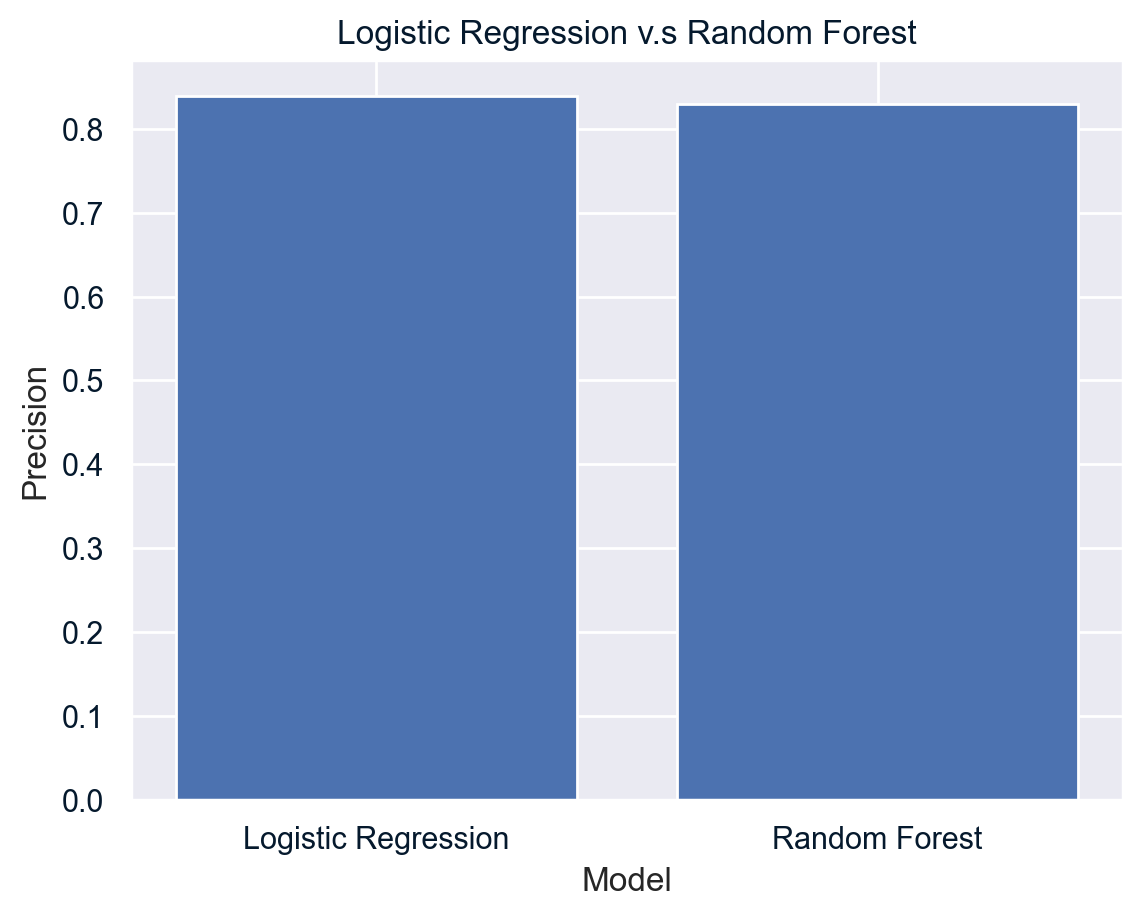

In [54]:
model1_precision =  0.84
model2_precision = 0.83

model_names = ['Logistic Regression', 'Random Forest']
x = range(len(model_names))
precisions = [model1_precision, model2_precision]
plt.bar(x, precisions, tick_label=model_names)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Logistic Regression v.s Random Forest')
plt.show()

Both the **Logistic Regression** and **Random Forest** models met the 80% precision and recall requirement. However, the Logistic Regression algorithm demonstrated superior performance in 
accuracy compared to Random Forest. Therefore, we recommend using the Logistic Regression.

# 7. Recommendations

To assist the product manager in predicting which recipes will result in high traffic and drive more subscriptions, I recommend deploying the machine learning model into production. This will enable accurate predictions and support data-driven decisions, ultimately increasing user subscriptions.

To improve the model, i would recommend the following:
1.  **Implement the Model**: Utilize the trained model to predict high-traffic recipes and display them on the homepage to maximize user engagement.
2.  **Deploy Incrementally**: Begin with A/B testing to compare the model's performance against the current recipe selection method. Deploy the model in a cost-effective and high-performance environment, such as edge devices, to ensure scalability and efficiency.
3.  **Expand Features and Gather More Data**: Collect additional data and incorporate new features, such as:

    - Time of day
    - Cost per serving
    - User activity data (e.g., last visited site, number of visits to the recipe homepage)
    - Seasonality trends
    - User preferences and trending topics.
    

    These enhancements will refine the model's predictions and improve its accuracy.
4.  **Monitor and Maintain the Model**:
Regularly evaluate the model's performance to detect data drift, a phenomenon where user behavior changes over time, leading to discrepancies in model predictions. If data drift occurs, retrain the model or build a new one to maintain performance.
5.  **Address Class Imbalance**:
The dataset revealed an imbalance between high-traffic and low-traffic recipes. Balancing the class distribution through techniques like oversampling, undersampling, or synthetic data generation will help the machine learning algorithm learn the characteristics of each category more effectively.

6.  **Iterative Feedback and Improvement**:
Continuously monitor actual traffic data and use it to iteratively improve the model. Feedback loops will help the model adapt to changing trends and user behavior.

**Additional Recommendation**
I also recommend that Tasty Bytes incorporates Machine Learning Operations (MLOps) into their workflow. MLOps streamlines the management of the machine learning lifecycle, from development to deployment and monitoring. This ensures seamless updates, improved scalability, and enhanced reliability of machine learning systems in production.

# 8. Conclusion

Data Science and Machine Learning provide a systematic and accurate approach to solving complex data-driven problems. Predicting the recipes to display on the website homepage is a significant step toward achieving **Tasty Bytes'** business objectives. By accurately predicting the right recipes, the company can drive higher website traffic, leading to an increase in subscriber numbers and, ultimately, improved profitability.

This approach not only enhances the decision-making process for product managers by enabling data-driven insights but also replaces the inefficiency of random recipe selection. It empowers **Tasty Bytes** to create a more engaging user experience, optimize homepage content, and align business decisions with measurable outcomes.

By leveraging these predictive models and integrating them with the company’s operational strategies, **Tasty Bytes** can maintain a competitive edge, deliver value to its users, and realize sustained growth.